# **PART A: Predicting Signal Quality Using Machine Learning**

## **Domain: Electronics and Telecommunication**

### **Context**
A communications equipment manufacturing company has a product responsible for emitting informative signals. The company wants to build a machine learning model that can predict the equipment’s signal quality based on various measurable parameters.

### **Data Description**
The dataset contains information on multiple signal tests performed, including:
- **Parameters**: Various measurable signal attributes.
- **Signal_Quality**: The final signal strength or quality.

### **Project Objective**
To develop a classification model that can accurately predict signal quality based on the provided signal parameters.

---


In [4]:
!!pip install tensorflow-gpu
!!pip install scikeras
!!pip install --no-cache-dir --force-reinstall scikit-learn==1.5.2


['Collecting scikit-learn==1.5.2',
 '  Downloading scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)',
 'Collecting numpy>=1.19.5 (from scikit-learn==1.5.2)',
 '  Downloading numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/62.0 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b62.0/62.0 kB\x1b \x1b5.7 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting scipy>=1.6.0 (from scikit-learn==1.5.2)',
 '  Downloading scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/62.0 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b62.0/62.0 kB\x1b \x1b112.5 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting joblib>=1.2.0 (

### Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras import optimizers, losses
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import StandardScaler

%matplotlib inline
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
# Preventing scientific notation.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Python Course/neural network'

In [4]:
#  store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

#### Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.


In [54]:
# read dataset
df = pd.read_csv(f'{path}/NN Project Data - Signal.csv')
signal_df=df.copy(deep=True)


In [55]:
# Showing first 5 records
signal_df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0        7.400        0.700        0.000        1.900        0.076   
1        7.800        0.880        0.000        2.600        0.098   
2        7.800        0.760        0.040        2.300        0.092   
3       11.200        0.280        0.560        1.900        0.075   
4        7.400        0.700        0.000        1.900        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0       11.000       34.000        0.998        3.510         0.560   
1       25.000       67.000        0.997        3.200         0.680   
2       15.000       54.000        0.997        3.260         0.650   
3       17.000       60.000        0.998        3.160         0.580   
4       11.000       34.000        0.998        3.510         0.560   

   Parameter 11  Signal_Strength  
0         9.400                5  
1         9.800                5  
2         9.800                5  
3         9.800                6  
4         9.400                5

In [56]:
# Checking Data
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the fileds are of float type except **Signal_Strength**

In [57]:
#Shape of df
signal_df.shape

(1599, 12)

There is around 1599 rows and 12 columns

#### Part A - Q1 B - Check for missing values and print percentage for each attribute.


In [58]:
# Check for missing values
signal_df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [59]:
# Check for missing values percentage
signal_df.isnull().sum()*100/len(signal_df)

Parameter 1       0.000
Parameter 2       0.000
Parameter 3       0.000
Parameter 4       0.000
Parameter 5       0.000
Parameter 6       0.000
Parameter 7       0.000
Parameter 8       0.000
Parameter 9       0.000
Parameter 10      0.000
Parameter 11      0.000
Signal_Strength   0.000
dtype: float64

No missing or null values found

#### Check Unique records across all columns

In [60]:
# Chevk unique values in each columns
columns=signal_df.columns
for col in columns:
  print(col)
  print(signal_df[col].nunique())



Parameter 1
96
Parameter 2
143
Parameter 3
80
Parameter 4
91
Parameter 5
153
Parameter 6
60
Parameter 7
144
Parameter 8
436
Parameter 9
89
Parameter 10
96
Parameter 11
65
Signal_Strength
6


In [61]:
#  Show unique values in target column
signal_df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

There are around 6 unique values in traget variable 3,4,5,6,7,8

#### Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.


In [62]:
# Show duplicate rows in the dataframe
signal_df[signal_df.duplicated()]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4           7.400        0.700        0.000        1.900        0.076   
11          7.500        0.500        0.360        6.100        0.071   
27          7.900        0.430        0.210        1.600        0.106   
40          7.300        0.450        0.360        5.900        0.074   
65          7.200        0.725        0.050        4.650        0.086   
...           ...          ...          ...          ...          ...   
1563        7.200        0.695        0.130        2.000        0.076   
1564        7.200        0.695        0.130        2.000        0.076   
1567        7.200        0.695        0.130        2.000        0.076   
1581        6.200        0.560        0.090        1.700        0.053   
1596        6.300        0.510        0.130        2.300        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4          11.000       34.000        0.998        3.510         0.560   
11         17.000      102.000        0.998        3.350         0.800   
27         10.000       37.000        0.997        3.170         0.910   
40         12.000       87.000        0.998        3.330         0.830   
65          4.000       11.000        0.996        3.410         0.390   
...           ...          ...          ...          ...           ...   
1563       12.000       20.000        0.995        3.290         0.540   
1564       12.000       20.000        0.995        3.290         0.540   
1567       12.000       20.000        0.995        3.290         0.540   
1581       24.000       32.000        0.994        3.540         0.600   
1596       29.000       40.000        0.996        3.420         0.750   

      Parameter 11  Signal_Strength  
4            9.400                5  
11          10.500                5  
27           9.500                5  
40          10.500                5  
65          10.900                5  
...            ...              ...  
1563        10.100                5  
1564        10.100                5  
1567        10.100                5  
1581        11.300                5  
1596        11.000                6  

[240 rows x 12 columns]

In [63]:
# dropping duplicate values .We will keep the first one and drop the redudant
signal_df.drop_duplicates(keep='first',inplace=True)
signal_df[signal_df.duplicated()]

Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []

In [64]:
# After Dropping duplicate values
signal_df.shape

(1359, 12)

### Observations:
After removing duplicates we have around 1359 records

In [65]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = signal_df.quantile(0.25)
Q3 = signal_df.quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each column
outliers_count = ((signal_df < lower_bound) | (signal_df > upper_bound)).sum()

# Display outlier counts as a DataFrame
outliers_df = pd.DataFrame(outliers_count, columns=['Outliers'])
print(outliers_df)

                 Outliers
Parameter 1            41
Parameter 2            19
Parameter 3             1
Parameter 4           126
Parameter 5            87
Parameter 6            26
Parameter 7            45
Parameter 8            35
Parameter 9            28
Parameter 10           55
Parameter 11           12
Signal_Strength        27


###Observations:
- Parameter 4 has highest outliers i.e 126 followed by parameter 5 and parameter 10.
- We donot know id these are real values or some outliers so we cannot treat them without domain knowledge

### Utils

In [5]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [6]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


    return plt

In [12]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [11]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [10]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [9]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [8]:
def fit(model, X_train, y_train, X_test, y_test, NoOfEpochs, batch_size, verbose=1):
    """
    Trains the neural network model and evaluates its performance.

    Parameters:
    - model: Keras model to be trained.
    - X_train: Training features (numpy array or DataFrame).
    - y_train: Training labels (numpy array or DataFrame).
    - X_test: Testing features (numpy array or DataFrame).
    - y_test: Testing labels (numpy array or DataFrame).
    - NoOfEpochs: Number of training epochs (int).
    - batch_size: Batch size for training (int).
    - verbose: Verbosity mode (int, default: 1).

    Returns:
    - history: Training history object containing loss and accuracy metrics.
    - test_accuracy: Final test accuracy after evaluation.
    """

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=NoOfEpochs, batch_size=batch_size, verbose=verbose)

    # Evaluate the model on test data
    test_accuracy = model.evaluate(X_test, y_test, verbose=1)

    # Store the test accuracy inside the model instance
    model.test_accuracy = test_accuracy


    return history


In [7]:
def plot_model_accuracy(history,model):
    """
    Plots the accuracy and loss trends over epochs for a trained neural network.

    Parameters:
    - history: Keras History object containing training metrics.

    Displays:
    - Subplot 1: Training & Validation Accuracy vs. Epochs
    - Subplot 2: Training & Validation Loss vs. Epochs
    """

    h1 = history.history  # Extract training history

    # Get the final values for display in titles
    final_train_acc = h1['accuracy'][-1]
    final_val_acc = h1['val_accuracy'][-1]
    final_train_loss = h1['loss'][-1]
    final_val_loss = h1['val_loss'][-1]

    plt.figure(figsize=(15, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(y=h1['accuracy'], x=range(len(h1['accuracy'])), label="Training Accuracy", color="green")
    sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label="Validation Accuracy", color="blue")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy: Train = {final_train_acc:.4f}, Val = {final_val_acc:.4f}")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    sns.lineplot(y=h1['loss'], x=range(len(h1['loss'])), label="Training Loss", color="orange")
    sns.lineplot(y=h1['val_loss'], x=range(len(h1['val_loss'])), label="Validation Loss", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss: Train = {final_train_loss:.4f}, Val = {final_val_loss:.4f}")
    plt.legend()

    plt.show()


In [13]:
def build_sequential_model(model, inputDimensions, noOfClasses, layerRepeatCount, layerNeuronCount, dropout_rate=0.0, optimizer_type='sgd'):
    """
    Builds a sequential multi-layer neural network model.

    Parameters:
    - model: Keras Sequential model instance to which layers will be added.
    - inputDimensions: Number of input features (int).
    - noOfClasses: Number of output classes (int).
    - layerRepeatCount: Number of hidden layers (int).
    - layerNeuronCount: Number of neurons in each hidden layer (int).
    - dropout_rate: Dropout rate (float, default: 0.0). Set to > 0 to add dropout layers.
    - optimizer_type: Optimizer to use ('adam' or 'sgd', default: 'sgd').

    Returns:
    - Compiled Keras model.
    """

    # Input layer
    model.add(Dense(layerNeuronCount, input_dim=inputDimensions, activation='relu', kernel_initializer='he_uniform'))

    if dropout_rate > 0:  # Add dropout if specified
        model.add(Dropout(dropout_rate))
    # Hidden layers
    for _ in range(1, layerRepeatCount):
        model.add(Dense(layerNeuronCount, activation='relu', kernel_initializer='he_uniform'))
        if dropout_rate > 0:  # Add dropout if specified
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(noOfClasses, activation='softmax'))

    # Compile model using the specified optimizer
    compile_model(model, optimizer_type=optimizer_type)

    # Print model summary
    print(model.summary())

    return model

In [14]:
def compile_model(model, optimizer_type='adam', learning_rate=0.001, momentum=0.66, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
    """
    Compiles the model with the specified optimizer.

    Parameters:
    - model: Keras model to compile.
    - optimizer_type: 'adam' or 'sgd' (default: 'adam').
    - learning_rate: Learning rate for the optimizer (default: 0.01).
    - momentum: Momentum for SGD (default: 0.66).
    - beta_1: Exponential decay rate for Adam’s first moment estimate (default: 0.9).
    - beta_2: Exponential decay rate for Adam’s second moment estimate (default: 0.999).
    - epsilon: Small value to prevent division by zero in Adam (default: 1e-07).

    Returns:
    - Compiled model.
    """

    if optimizer_type.lower() == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    elif optimizer_type.lower() == 'sgd':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Unsupported optimizer. Choose 'adam' or 'sgd'.")

    model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

In [15]:
def create_model_v4(lr=0.01, units_1=16, units_2=6, activation='relu', dropout_rate=0.2, optimizer='adam', num_layers=2):
    model = Sequential()
    model.add(Dense(units_1, activation=activation, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))

    for _ in range(num_layers - 1):
        model.add(Dense(units_2, activation=activation, kernel_initializer='he_uniform'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(6, activation='softmax'))

    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    elif optimizer == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
    elif optimizer == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [16]:
def train_with_different_batches(model_fn, X_train, y_train, X_val, y_val, batch_sizes, epochs=50, learning_rate=0.0001):
    results = {}

    for batch_size in batch_sizes:
        print(f"\nTraining with batch size: {batch_size}")

        # Create a new model instance
        model = model_fn()

        # Compile the model
        compile_model(model, 'adam', learning_rate)

        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=1
        )

        # Evaluate on validation set
        val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
        results[batch_size] = val_acc
        print(f"Validation Accuracy for batch size {batch_size}: {val_acc:.4f}")

    return results

In [17]:
def plot_confusion_matrix(model, testX, testY):
    """
    Plots a confusion matrix heatmap for a given model and test dataset.

    Parameters:
    - model: Trained Keras model
    - testX: Test features
    - testY: True test labels

    Displays:
    - Heatmap of confusion matrix
    """
    # Get model predictions
    y_predicted = model.predict(testX)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    testY_labels = np.argmax(testY, axis=1)

    # Compute confusion matrix
    cm = tf.math.confusion_matrix(labels=testY_labels, predictions=y_predicted_labels)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=pellete)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [18]:
def get_misclassifications(model, testX, testY):
    """
    Computes and prints misclassification counts in descending order.

    Parameters:
    - model: Trained Keras model
    - testX: Test features
    - testY: True test labels (one-hot encoded)

    Returns:
    - A sorted list of misclassified label pairs with their misclassification counts.
    """
    # Get model predictions
    y_predicted = model.predict(testX)
    y_predicted_labels = np.argmax(y_predicted, axis=1)
    testY_labels = np.argmax(testY, axis=1)

    # Compute confusion matrix
    cm = tf.math.confusion_matrix(labels=testY_labels, predictions=y_predicted_labels).numpy()

    # Create a list of misclassifications
    misclassifications = []
    num_classes = cm.shape[0]

    for actual in range(num_classes):
        for predicted in range(num_classes):
            if actual != predicted and cm[actual, predicted] > 0:
                misclassifications.append(((actual, predicted), cm[actual, predicted]))

    # Sort misclassifications in descending order
    misclassifications.sort(key=lambda x: x[1], reverse=True)

    # Print misclassification details
    print("Misclassifications (Actual → Predicted : Count)")
    for (actual, predicted), count in misclassifications:
        print(f"{actual} → {predicted} : {count}")

    return misclassifications

In [69]:
def create_model_v5(lr=0.01, units_1=16, units_2=6, activation='relu', dropout_rate=0.2, optimizer='adam', num_layers=2):
    model = Sequential()
    model.add(Dense(units_1, activation=activation, input_dim=x_svhn_merged.shape[1], kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))

    for _ in range(num_layers - 1):
        model.add(Dense(units_2, activation=activation, kernel_initializer='he_uniform'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    elif optimizer == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
    elif optimizer == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


#### Part A - Q1 D - Visualise distribution of the target variable.


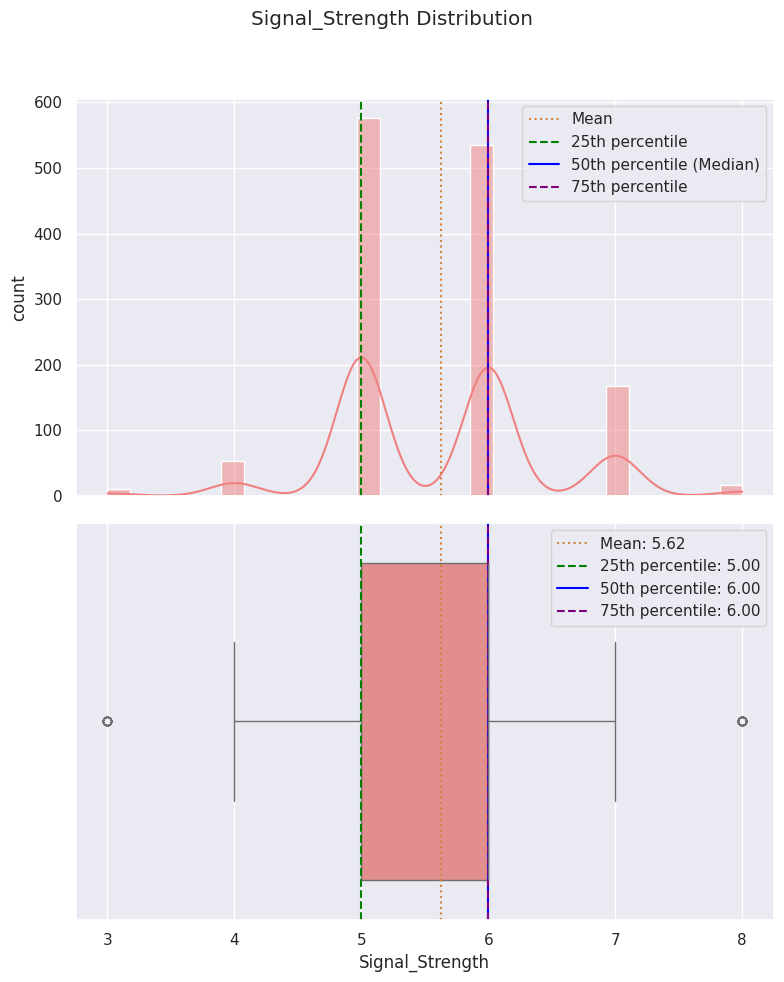

In [78]:
# Check Distribution of traget variable using box and hostogram
plot_histogram_and_boxplot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution')

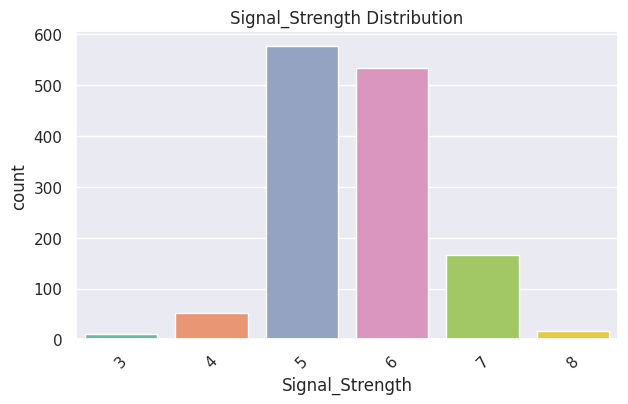

In [79]:
# Show count plot on signal strength
draw_count_plot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution');

In [80]:
# No of values on each signals strength
signal_df['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

### Observations:
- The DataFrame has 11 columns with 10 of them having float data type while 1 with the integer data type.
- No Null values detected in any column
- After removing duplicates the dataset has 1359 observations
- The target variable 'Signal_Strength' having values most concentrated at value 5 (total count 577) followed by 6 (total count 535) follwed by 7 (167)
-  3 has Lowesr concentrated around 10 only

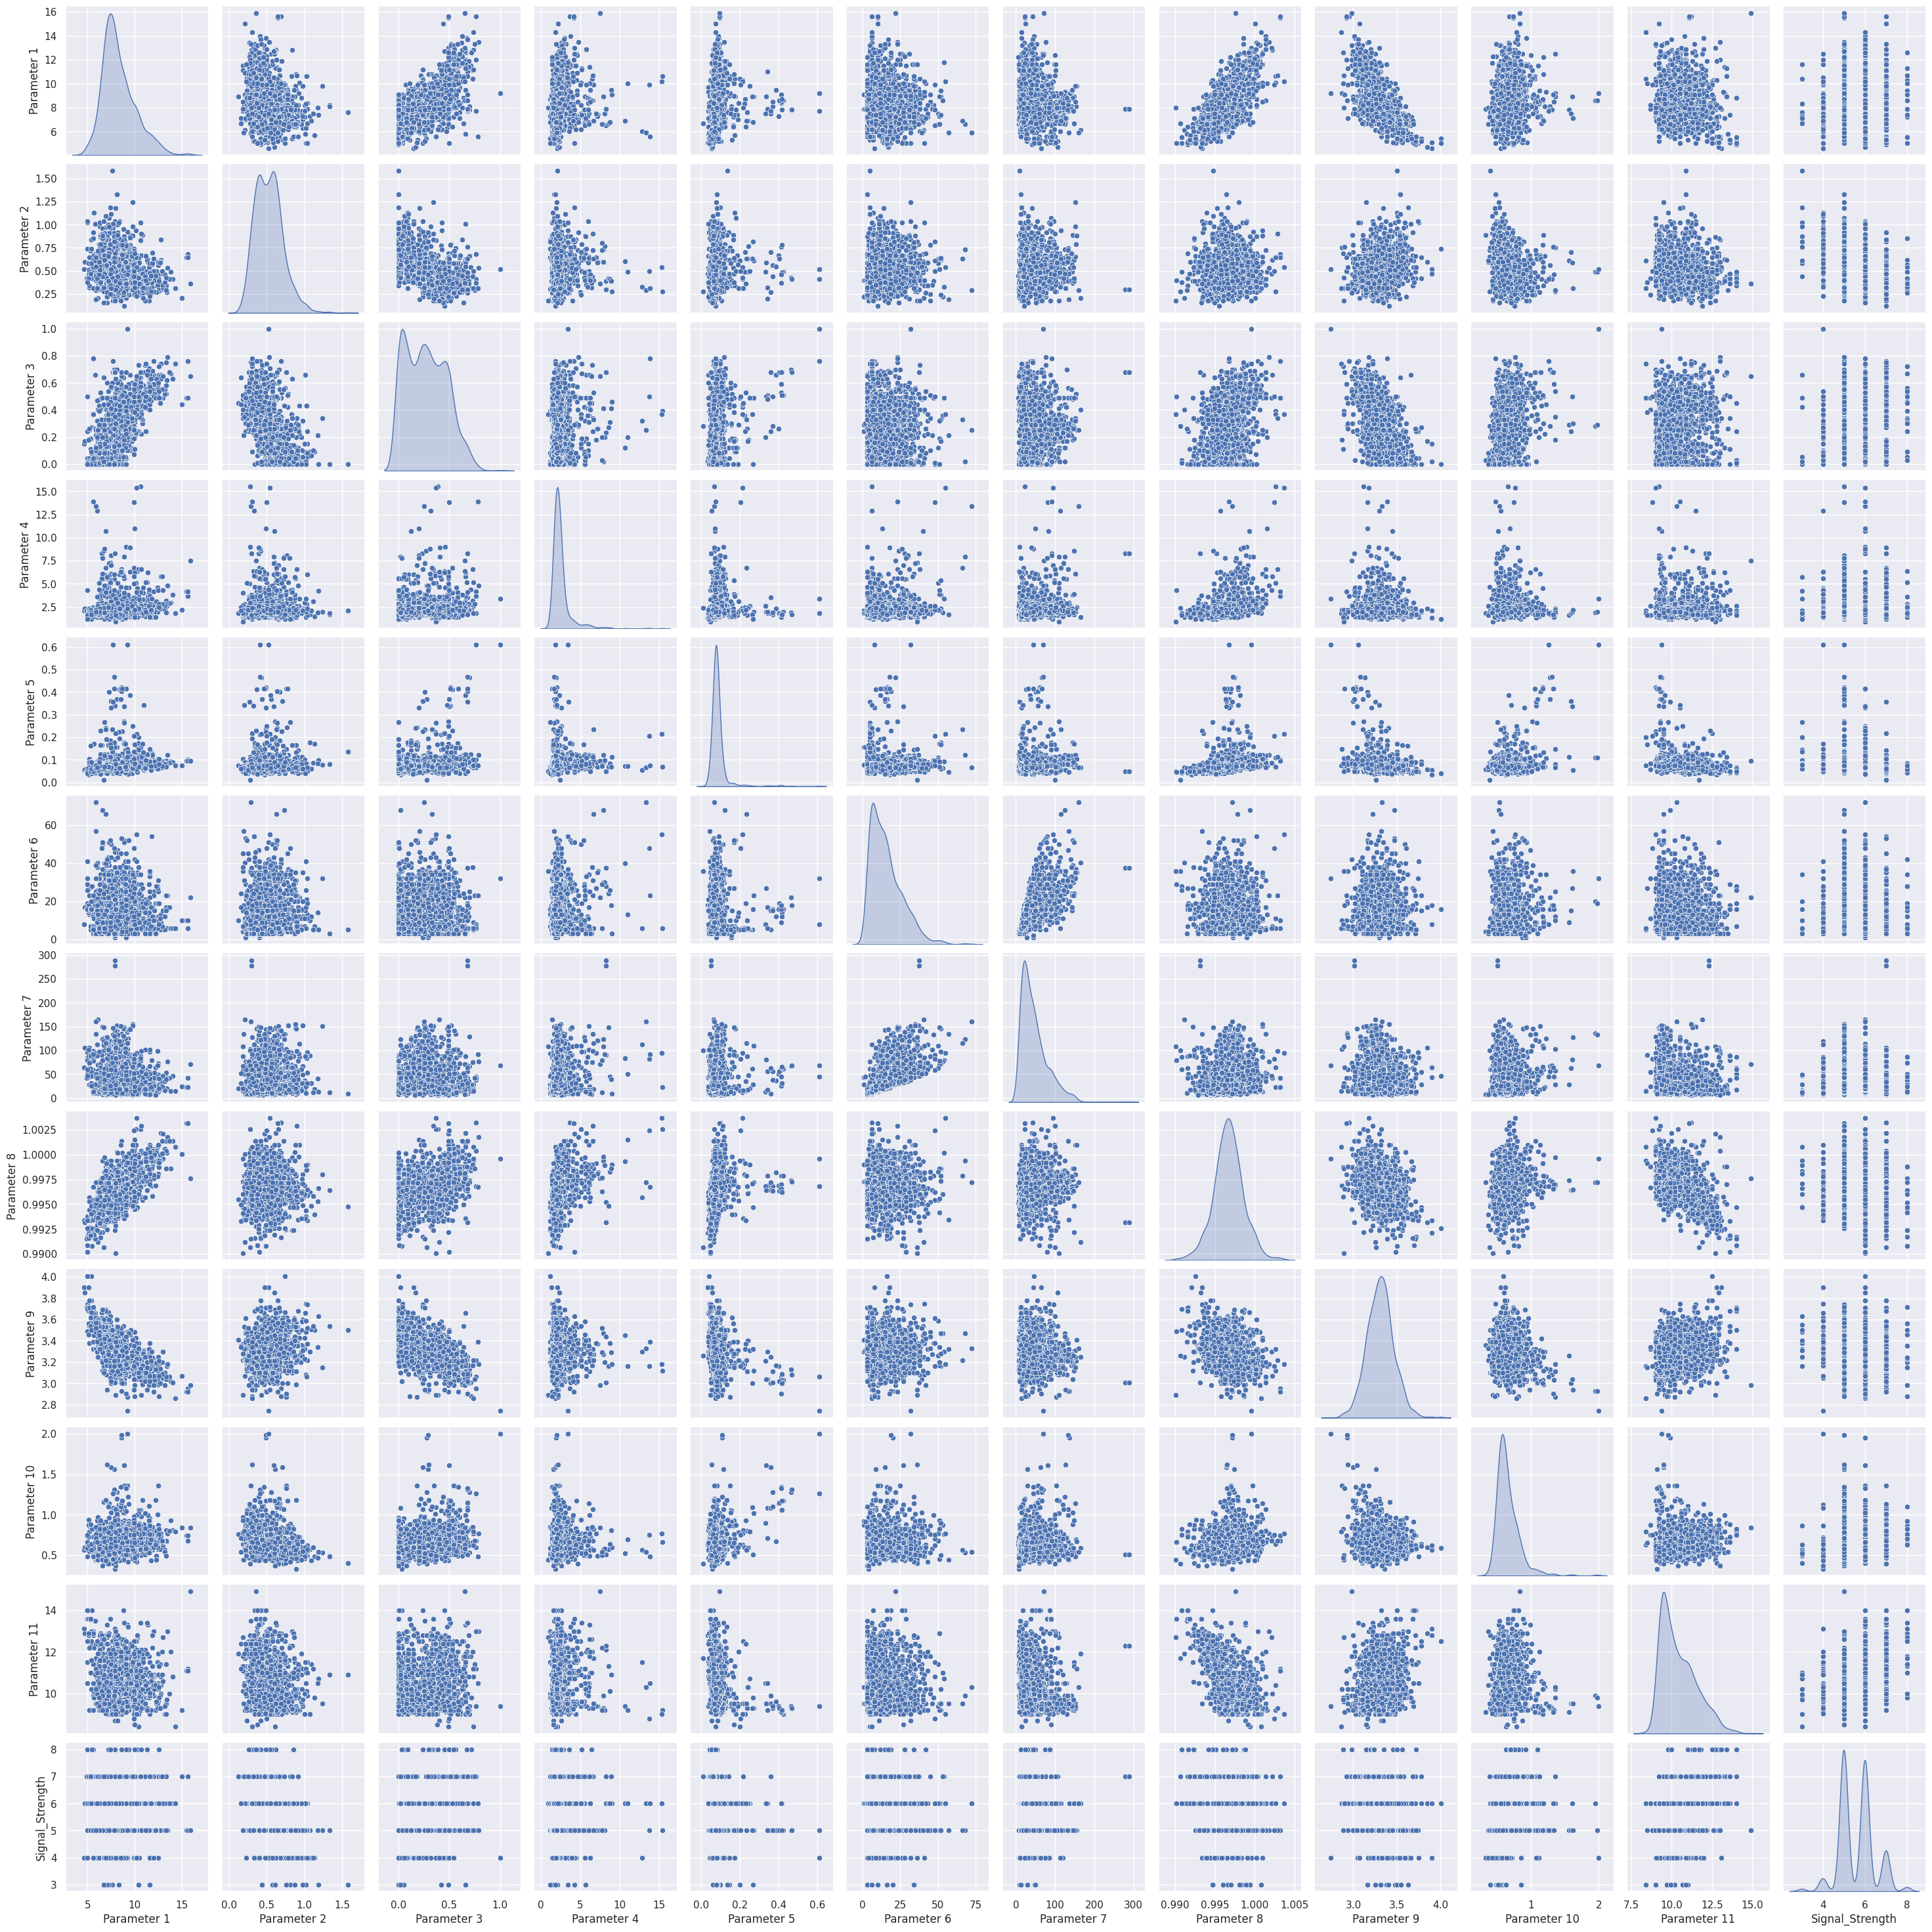

In [81]:
#plt.figure(figsize = (50,50))
sns.pairplot(signal_df,diag_kind='kde')
plt.show()

### Observations:
There seems to be muticolinearity
- Parameter 6 and Parameter 7 are highly correlated with each other.
- Parameter 1 is positively correlated to Parameter 3
- Parameter 8 and negatively correlated to Parameter 2 and 9
- Parameter 4 is has very low correlation with other Parameters.

### Insights from the initial data analysis (at least 2)
- The DataFrame has 11 columns with 10 of them having float data type while 1 with the integer data type.
- No Null values detected in any column
- After removing duplicates the dataset has 1359 observations
- The target variable 'Signal_Strength' having values most concentrated at value 5 (total count 577) followed by 6 (total count 535) follwed by 7 (167)
-  3 has Lowesr concentrated around 10 only
- Parameter 6 and Parameter 7 are highly correlated with each other.
- Parameter 4 has highest outliers i.e 126 followed by parameter 5 and parameter 10.



#### Part A - Q2 A - Split the data into X & Y.


In [82]:
# Define mapping for ordinal encoding
signal_mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
# Apply mapping to the target column
signal_df["Signal_Strength"] = signal_df["Signal_Strength"].map(signal_mapping)

In [83]:

# Dropping traget columns and then assigning to X and Y
X = signal_df.drop(['Signal_Strength'],axis=1)
y = signal_df[['Signal_Strength']]

In [84]:
yc = to_categorical(y, num_classes=6)

#### Part A - Q2 B - Split the data into train & test with 70:30 proportion.


In [85]:
# Splitting the dataset into the Training and Testing set. Test set of 30% and training set if 70%
X_train, X_test, y_train, y_test = train_test_split(X,yc, test_size = 0.30, random_state = 0,stratify = y)

In [86]:
# Printing the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951, 6)
(408, 6)


In [87]:
# Divide test and validation set to make sure test data is unseen
Xv_train, X_val, yv_train, y_val = train_test_split(X_train,y_train, test_size = 0.20, random_state = 0,stratify = y_train)

In [88]:
#Validation Set
print(Xv_train.shape)
print(X_val.shape)
print(yv_train.shape)
print(y_val.shape)

(760, 11)
(191, 11)
(760, 6)
(191, 6)


In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xv_train)  # Fit on training data
X_test_scaled = scaler.transform(X_val)  # Transform using same scaler
X_train_scaled_actual = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled_actual = scaler.transform(X_test)  # Transform using same scaler

In [90]:
no_of_classes=len(y_train[0])
print(f"No of classes {no_of_classes}")

No of classes 6


## **Model Building**

Buidling Model with one layer and relu activation for hidden layers softmax at the end
### Basic Model (SGD Optimiser)

In [130]:
histories = []  # List to store history objects

# no of neurons
noofneurons = [6, 7, 10,11]
for i in noofneurons:
    backend.clear_session()
    random.seed(32)
    tf.random.set_seed(32)
    print(f"Creating model for Single Layer with Neuron Count: {i}")

    # Create sequntial model
    model = Sequential()
    model = build_sequential_model(model, X_train_scaled.shape[1], no_of_classes, 1, layerNeuronCount=i)

    history = fit(model, X_train_scaled, yv_train, X_test_scaled, y_val, 50, 32, 2)

    histories.append((history, model,i))  # Store (history, model) tuple

Creating model for Single Layer with Neuron Count: 6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 101ms/step - accuracy: 0.2829 - loss: 2.1797 - val_accuracy: 0.2618 - val_loss: 2.0043
Epoch 2/50
24/24 - 2s - 68ms/step - accuracy: 0.3000 - loss: 2.1183 - val_accuracy: 0.2775 - val_loss: 1.9515
Epoch 3/50
24/24 - 0s - 18ms/step - accuracy: 0.3171 - loss: 2.0608 - val_accuracy: 0.2827 - val_loss: 1.9030
Epoch 4/50
24/24 - 1s - 26ms/step - accuracy: 0.3303 - loss: 2.0075 - val_accuracy: 0.3194 - val_loss: 1.8585
Epoch 5/50
24/24 - 1s - 24ms/step - accuracy: 0.3553 - loss: 1.9581 - val_accuracy: 0.3455 - val_loss: 1.8176
Epoch 6/50
24/24 - 0s - 12ms/step - accuracy: 0.3816 - loss: 1.9121 - val_accuracy: 0.3403 - val_loss: 1.7800
Epoch 7/50
24/24 - 1s - 30ms/step - accuracy: 0.4026 - loss: 1.8695 - val_accuracy: 0.3665 - val_loss: 1.7453
Epoch 8/50
24/24 - 1s - 44ms/step - accuracy: 0.4184 - loss: 1.8297 - val_accuracy: 0.3927 - val_loss: 1.7132
Epoch 9/50
24/24 - 1s - 23ms/step - accuracy: 0.4276 - loss: 1.7924 - val_accuracy: 0.3979 - val_loss: 1.6834
Epoc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132 (528.00 B)

 Trainable params: 132 (528.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 43ms/step - accuracy: 0.2263 - loss: 2.3249 - val_accuracy: 0.2827 - val_loss: 2.1094
Epoch 2/50
24/24 - 0s - 9ms/step - accuracy: 0.2342 - loss: 2.2553 - val_accuracy: 0.2932 - val_loss: 2.0524
Epoch 3/50
24/24 - 0s - 12ms/step - accuracy: 0.2434 - loss: 2.1898 - val_accuracy: 0.3141 - val_loss: 1.9991
Epoch 4/50
24/24 - 0s - 13ms/step - accuracy: 0.2579 - loss: 2.1285 - val_accuracy: 0.3351 - val_loss: 1.9491
Epoch 5/50
24/24 - 0s - 13ms/step - accuracy: 0.2724 - loss: 2.0712 - val_accuracy: 0.3455 - val_loss: 1.9025
Epoch 6/50
24/24 - 0s - 12ms/step - accuracy: 0.2816 - loss: 2.0176 - val_accuracy: 0.3665 - val_loss: 1.8589
Epoch 7/50
24/24 - 0s - 8ms/step - accuracy: 0.2947 - loss: 1.9673 - val_accuracy: 0.3770 - val_loss: 1.8180
Epoch 8/50
24/24 - 0s - 13ms/step - accuracy: 0.3105 - loss: 1.9203 - val_accuracy: 0.3979 - val_loss: 1.7797
Epoch 9/50
24/24 - 0s - 13ms/step - accuracy: 0.3171 - loss: 1.8763 - val_accuracy: 0.4031 - val_loss: 1.7439
Epoch 1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186 (744.00 B)

 Trainable params: 186 (744.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 38ms/step - accuracy: 0.3039 - loss: 1.9454 - val_accuracy: 0.2042 - val_loss: 2.1287
Epoch 2/50
24/24 - 0s - 19ms/step - accuracy: 0.3158 - loss: 1.9012 - val_accuracy: 0.2147 - val_loss: 2.0839
Epoch 3/50
24/24 - 0s - 11ms/step - accuracy: 0.3276 - loss: 1.8598 - val_accuracy: 0.2304 - val_loss: 2.0423
Epoch 4/50
24/24 - 0s - 5ms/step - accuracy: 0.3368 - loss: 1.8216 - val_accuracy: 0.2461 - val_loss: 2.0036
Epoch 5/50
24/24 - 0s - 7ms/step - accuracy: 0.3434 - loss: 1.7860 - val_accuracy: 0.2618 - val_loss: 1.9674
Epoch 6/50
24/24 - 0s - 5ms/step - accuracy: 0.3592 - loss: 1.7530 - val_accuracy: 0.2670 - val_loss: 1.9337
Epoch 7/50
24/24 - 0s - 6ms/step - accuracy: 0.3724 - loss: 1.7224 - val_accuracy: 0.2723 - val_loss: 1.9022
Epoch 8/50
24/24 - 0s - 7ms/step - accuracy: 0.3855 - loss: 1.6938 - val_accuracy: 0.2880 - val_loss: 1.8728
Epoch 9/50
24/24 - 0s - 11ms/step - accuracy: 0.3855 - loss: 1.6671 - val_accuracy: 0.2984 - val_loss: 1.8453
Epoch 10/5

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204 (816.00 B)

 Trainable params: 204 (816.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 39ms/step - accuracy: 0.3513 - loss: 1.6571 - val_accuracy: 0.3822 - val_loss: 1.5593
Epoch 2/50
24/24 - 0s - 17ms/step - accuracy: 0.3697 - loss: 1.6159 - val_accuracy: 0.3927 - val_loss: 1.5252
Epoch 3/50
24/24 - 0s - 7ms/step - accuracy: 0.3882 - loss: 1.5779 - val_accuracy: 0.4136 - val_loss: 1.4941
Epoch 4/50
24/24 - 0s - 11ms/step - accuracy: 0.4013 - loss: 1.5430 - val_accuracy: 0.4188 - val_loss: 1.4658
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.4158 - loss: 1.5110 - val_accuracy: 0.4346 - val_loss: 1.4399
Epoch 6/50
24/24 - 0s - 5ms/step - accuracy: 0.4197 - loss: 1.4817 - val_accuracy: 0.4607 - val_loss: 1.4163
Epoch 7/50
24/24 - 0s - 5ms/step - accuracy: 0.4237 - loss: 1.4547 - val_accuracy: 0.4764 - val_loss: 1.3948
Epoch 8/50
24/24 - 0s - 7ms/step - accuracy: 0.4329 - loss: 1.4300 - val_accuracy: 0.4817 - val_loss: 1.3752
Epoch 9/50
24/24 - 0s - 12ms/step - accuracy: 0.4434 - loss: 1.4073 - val_accuracy: 0.4764 - val_loss: 1.3573
Epoch 10/5

ploting for single layer with no of neuron 6


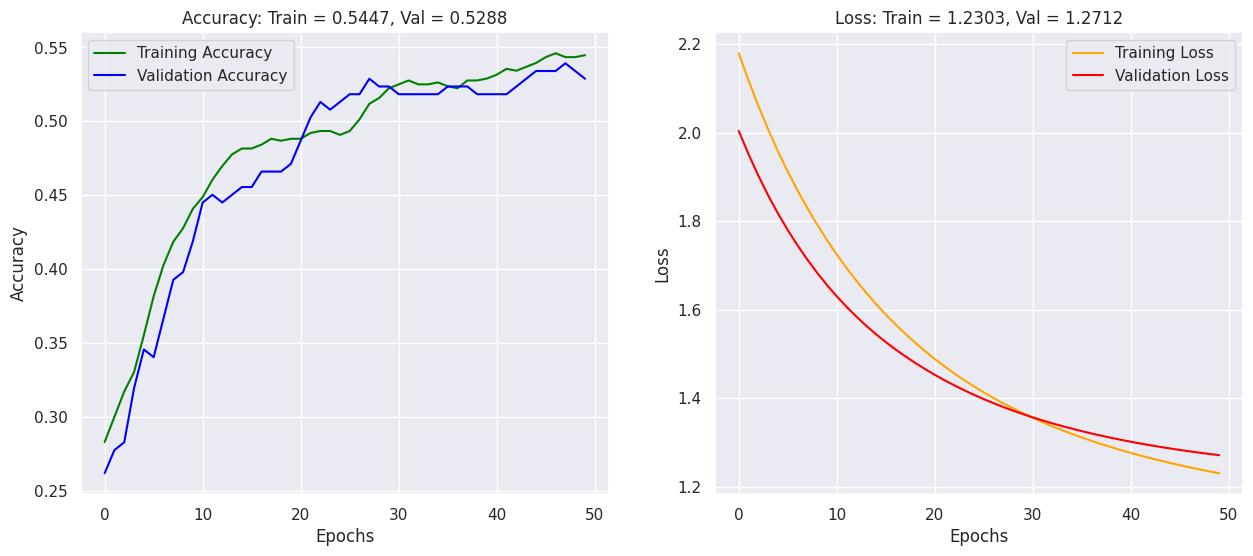

ploting for single layer with no of neuron 7


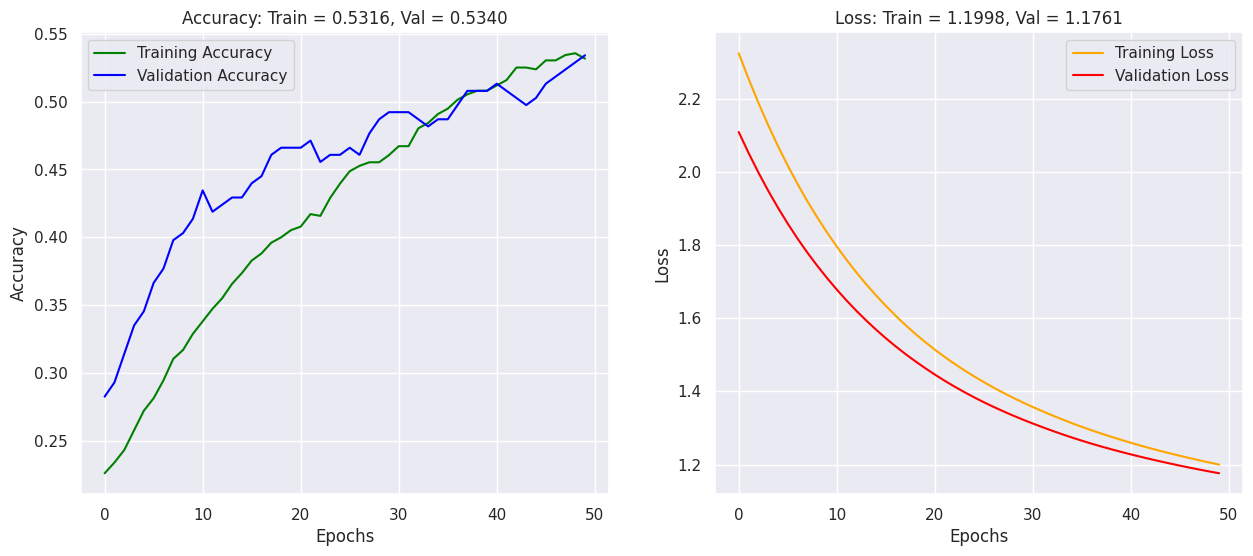

ploting for single layer with no of neuron 10


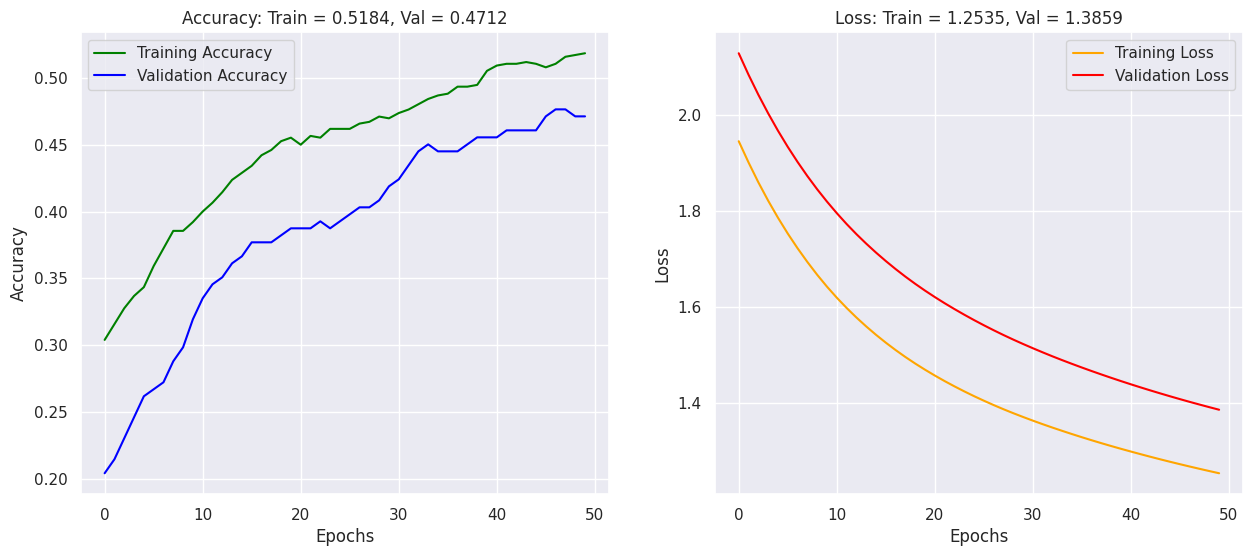

ploting for single layer with no of neuron 11


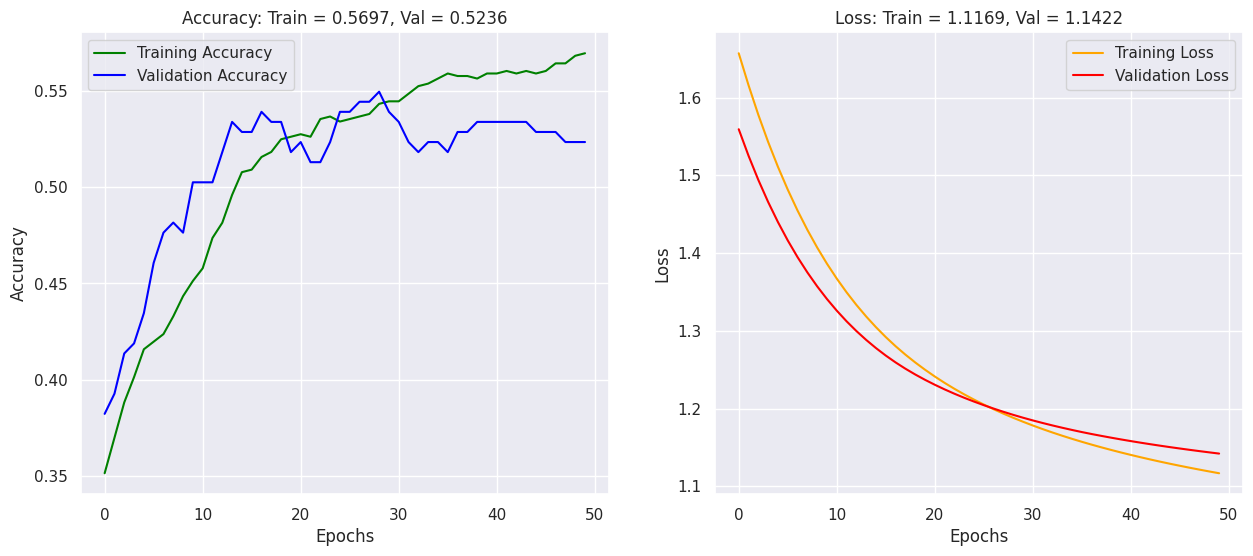

In [131]:
# Now plot all models at once
for history, model, neurons in histories:
    print(f"ploting for single layer with no of neuron {neurons}")
    plot_model_accuracy(history, model)

### Observations:
- From the above plot we can see acuracy is 54% with 7 and 7 neurons and lowest (47%) at 10 neurons .
- Better convergance with nof of neurons 7 and 6 . Accuracy of 52%-53%
- This is a single layer neural network.We will check adding more layers and see if there will be any change
- Some level of Connvergence is seen .
-  Too much of noise in the plot we will add smoothening

Model After Adding some More layers

In [132]:
histories = []  # List to store history objects

layerNeuronCount = [2,4,6,8]
for i in layerNeuronCount:
    backend.clear_session()
    random.seed(32)
    tf.random.set_seed(32)
    print(f"Creating model for Single Layer with Neuron Count: {i}")

    model = Sequential()
    model = build_sequential_model(model, X_train_scaled.shape[1], no_of_classes,layerRepeatCount=i,layerNeuronCount=10)

    history = fit(model, X_train_scaled, yv_train, X_test_scaled, y_val, 50, 32, 2)

    histories.append((history, model,i))  # Store (history, model) tuple

Creating model for Single Layer with Neuron Count: 2


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296 (1.16 KB)

 Trainable params: 296 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 81ms/step - accuracy: 0.0592 - loss: 2.3935 - val_accuracy: 0.0628 - val_loss: 2.2370
Epoch 2/50
24/24 - 0s - 9ms/step - accuracy: 0.0658 - loss: 2.2562 - val_accuracy: 0.0838 - val_loss: 2.1300
Epoch 3/50
24/24 - 0s - 15ms/step - accuracy: 0.0855 - loss: 2.1447 - val_accuracy: 0.1099 - val_loss: 2.0451
Epoch 4/50
24/24 - 1s - 22ms/step - accuracy: 0.1039 - loss: 2.0540 - val_accuracy: 0.1361 - val_loss: 1.9755
Epoch 5/50
24/24 - 0s - 17ms/step - accuracy: 0.1289 - loss: 1.9788 - val_accuracy: 0.1571 - val_loss: 1.9171
Epoch 6/50
24/24 - 1s - 23ms/step - accuracy: 0.1553 - loss: 1.9157 - val_accuracy: 0.1885 - val_loss: 1.8671
Epoch 7/50
24/24 - 0s - 11ms/step - accuracy: 0.1868 - loss: 1.8618 - val_accuracy: 0.2042 - val_loss: 1.8236
Epoch 8/50
24/24 - 0s - 12ms/step - accuracy: 0.2132 - loss: 1.8148 - val_accuracy: 0.2304 - val_loss: 1.7851
Epoch 9/50
24/24 - 0s - 16ms/step - accuracy: 0.2526 - loss: 1.7736 - val_accuracy: 0.2304 - val_loss: 1.7512
Epoch 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 516 (2.02 KB)

 Trainable params: 516 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 54ms/step - accuracy: 0.3592 - loss: 2.0865 - val_accuracy: 0.3508 - val_loss: 2.0617
Epoch 2/50
24/24 - 0s - 17ms/step - accuracy: 0.3553 - loss: 1.9392 - val_accuracy: 0.3455 - val_loss: 1.9400
Epoch 3/50
24/24 - 0s - 6ms/step - accuracy: 0.3605 - loss: 1.8438 - val_accuracy: 0.3508 - val_loss: 1.8572
Epoch 4/50
24/24 - 0s - 5ms/step - accuracy: 0.3724 - loss: 1.7757 - val_accuracy: 0.3508 - val_loss: 1.7949
Epoch 5/50
24/24 - 0s - 5ms/step - accuracy: 0.3842 - loss: 1.7227 - val_accuracy: 0.3508 - val_loss: 1.7454
Epoch 6/50
24/24 - 0s - 6ms/step - accuracy: 0.3934 - loss: 1.6791 - val_accuracy: 0.3560 - val_loss: 1.7038
Epoch 7/50
24/24 - 0s - 6ms/step - accuracy: 0.4079 - loss: 1.6416 - val_accuracy: 0.3665 - val_loss: 1.6678
Epoch 8/50
24/24 - 0s - 5ms/step - accuracy: 0.4211 - loss: 1.6085 - val_accuracy: 0.3770 - val_loss: 1.6360
Epoch 9/50
24/24 - 0s - 6ms/step - accuracy: 0.4368 - loss: 1.5786 - val_accuracy: 0.3927 - val_loss: 1.6067
Epoch 10/50


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 736 (2.88 KB)

 Trainable params: 736 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 64ms/step - accuracy: 0.4250 - loss: 2.3838 - val_accuracy: 0.4188 - val_loss: 1.8588
Epoch 2/50
24/24 - 0s - 5ms/step - accuracy: 0.4211 - loss: 1.7860 - val_accuracy: 0.4136 - val_loss: 1.6628
Epoch 3/50
24/24 - 0s - 5ms/step - accuracy: 0.4145 - loss: 1.6399 - val_accuracy: 0.4136 - val_loss: 1.5780
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.4197 - loss: 1.5612 - val_accuracy: 0.4188 - val_loss: 1.5200
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.4224 - loss: 1.5043 - val_accuracy: 0.4241 - val_loss: 1.4751
Epoch 6/50
24/24 - 0s - 6ms/step - accuracy: 0.4276 - loss: 1.4588 - val_accuracy: 0.4241 - val_loss: 1.4387
Epoch 7/50
24/24 - 0s - 7ms/step - accuracy: 0.4224 - loss: 1.4210 - val_accuracy: 0.4241 - val_loss: 1.4082
Epoch 8/50
24/24 - 0s - 11ms/step - accuracy: 0.4092 - loss: 1.3886 - val_accuracy: 0.4398 - val_loss: 1.3819
Epoch 9/50
24/24 - 0s - 6ms/step - accuracy: 0.4158 - loss: 1.3612 - val_accuracy: 0.4503 - val_loss: 1.3596
Epoch 10/50


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956 (3.73 KB)

 Trainable params: 956 (3.73 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 75ms/step - accuracy: 0.3276 - loss: 1.5035 - val_accuracy: 0.3455 - val_loss: 1.4814
Epoch 2/50
24/24 - 0s - 15ms/step - accuracy: 0.3329 - loss: 1.4210 - val_accuracy: 0.3351 - val_loss: 1.4425
Epoch 3/50
24/24 - 0s - 6ms/step - accuracy: 0.3237 - loss: 1.3892 - val_accuracy: 0.3351 - val_loss: 1.4143
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.3250 - loss: 1.3650 - val_accuracy: 0.3403 - val_loss: 1.3925
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.3237 - loss: 1.3449 - val_accuracy: 0.3298 - val_loss: 1.3747
Epoch 6/50
24/24 - 0s - 6ms/step - accuracy: 0.3316 - loss: 1.3278 - val_accuracy: 0.3298 - val_loss: 1.3598
Epoch 7/50
24/24 - 0s - 5ms/step - accuracy: 0.3329 - loss: 1.3125 - val_accuracy: 0.3194 - val_loss: 1.3466
Epoch 8/50
24/24 - 0s - 6ms/step - accuracy: 0.3276 - loss: 1.2988 - val_accuracy: 0.3298 - val_loss: 1.3350
Epoch 9/50
24/24 - 0s - 12ms/step - accuracy: 0.3263 - loss: 1.2867 - val_accuracy: 0.3298 - val_loss: 1.3243
Epoch 10/50

ploting for 2 layers with no of neuron 10


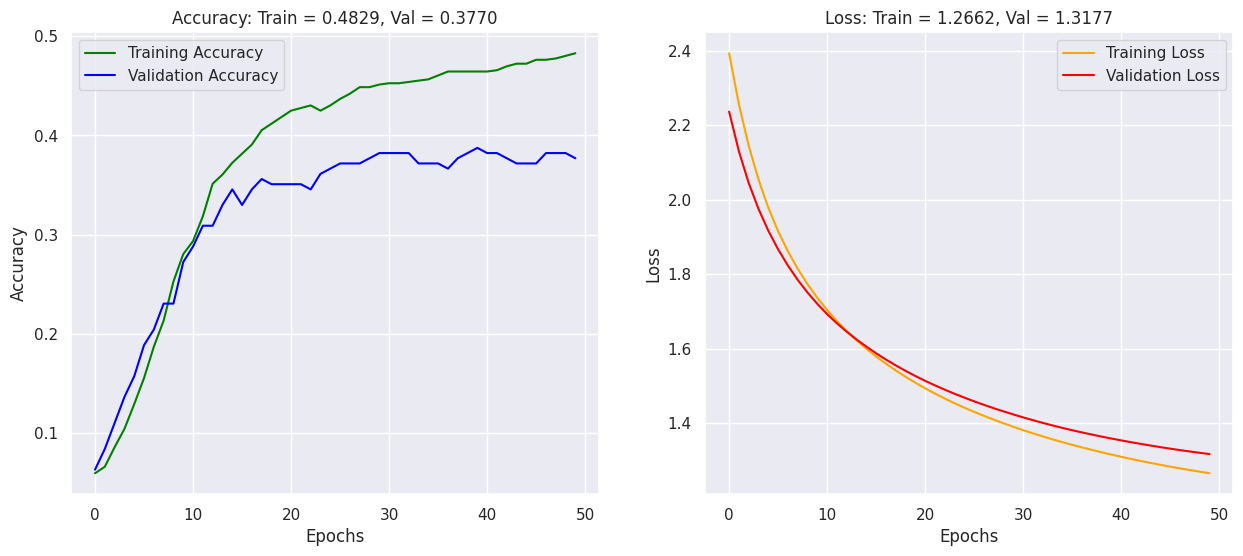

ploting for 4 layers with no of neuron 10


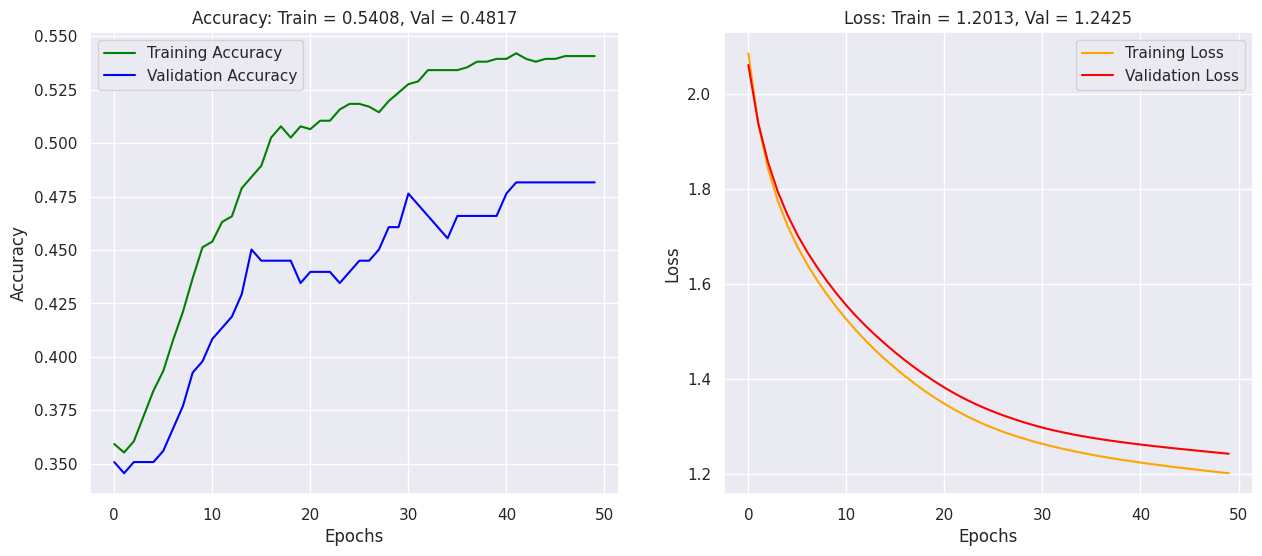

ploting for 6 layers with no of neuron 10


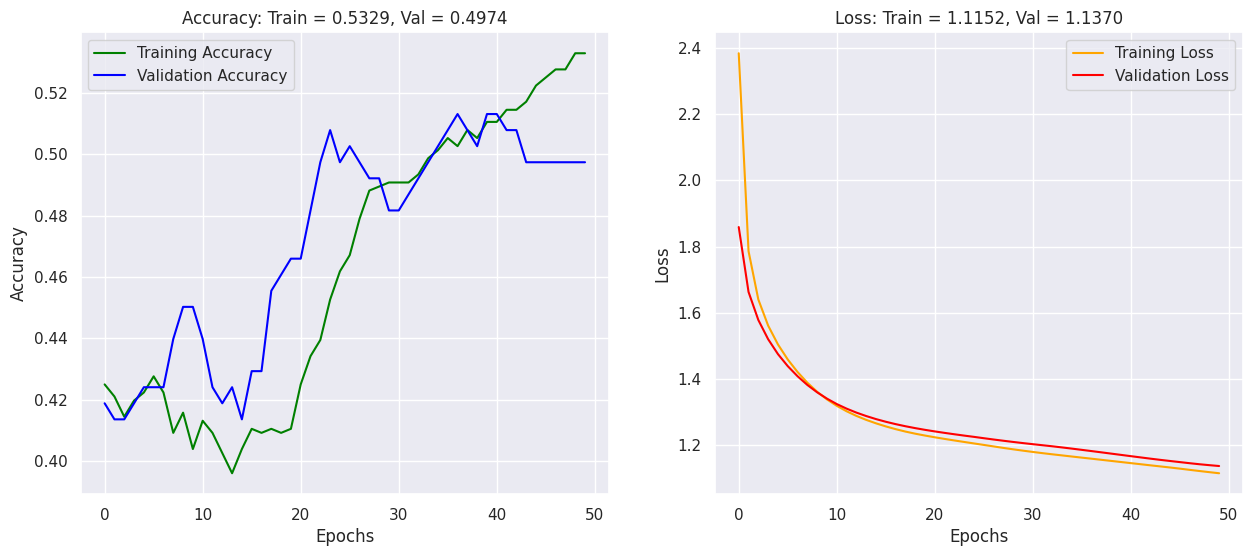

ploting for 8 layers with no of neuron 10


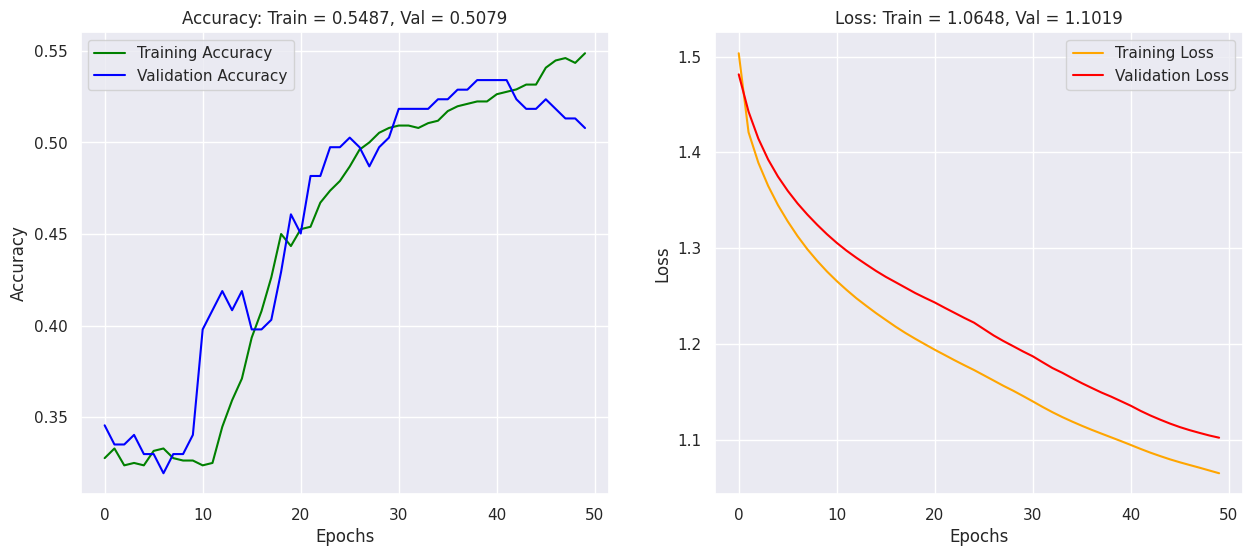

In [133]:
# Now plot all models at once
for history, model, layers in histories:
    print(f"ploting for {layers} layers with no of neuron 10")
    plot_model_accuracy(history, model)

### Observations:
- Highest accuracy is with 8 layers around 50%
-  The accurcay curve is not smooth so much of variation
- From plot we can see the curves are not smooth and it has lots of up and downs .There are some cases of overfitting as well.

### Model-2 With DropOut

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/120
6/6 - 5s - 871ms/step - accuracy: 0.1566 - loss: 2.1229 - val_accuracy: 0.1414 - val_loss: 2.0612
Epoch 2/120
6/6 - 0s - 39ms/step - accuracy: 0.1539 - loss: 2.1337 - val_accuracy: 0.1466 - val_loss: 2.0387
Epoch 3/120
6/6 - 1s - 84ms/step - accuracy: 0.1592 - loss: 2.0402 - val_accuracy: 0.1518 - val_loss: 2.0165
Epoch 4/120
6/6 - 1s - 90ms/step - accuracy: 0.1461 - loss: 2.0518 - val_accuracy: 0.1571 - val_loss: 1.9954
Epoch 5/120
6/6 - 0s - 48ms/step - accuracy: 0.1579 - loss: 2.0558 - val_accuracy: 0.1623 - val_loss: 1.9759
Epoch 6/120
6/6 - 0s - 37ms/step - accuracy: 0.1711 - loss: 2.0091 - val_accuracy: 0.1675 - val_loss: 1.9573
Epoch 7/120
6/6 - 0s - 49ms/step - accuracy: 0.1750 - loss: 2.0125 - val_accuracy: 0.1728 - val_loss: 1.9390
Epoch 8/120
6/6 - 0s - 29ms/step - accuracy: 0.1566 - loss: 2.0192 - val_accuracy: 0.1728 - val_loss: 1.9216
Epoch 9/120
6/6 - 0s - 65ms/step - accuracy: 0.1750 - loss: 1.9867 - val_accuracy: 0.1832 - val_loss: 1.9047
Epoch 10/120


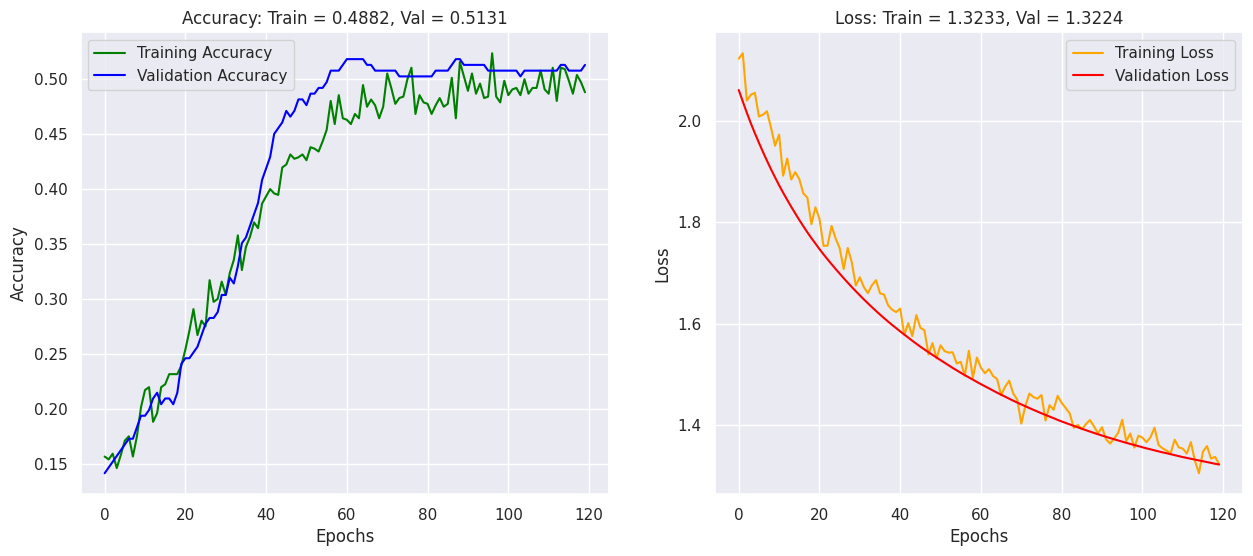

In [134]:
# Try SGD Optimizer  with 120 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model2 = Sequential()
model2.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation = 'softmax'))

compile_model(model2,optimizer_type='sgd',momentum=.66)

print(model2.summary())

history = model2.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=120, batch_size=128, verbose=2)
model2.test_accuracy = model.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model2)

In [96]:
test_results = model2.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4589 - loss: 1.4794 
[1.515993356704712, 0.44117647409439087]


### Observations:
- We can see the curve with training set is jumping up and down as we have introduced dropout
- Not much improvement with drop out .(.51)
- This is better then the basic model we had obsreved in Basic model.
- **Test accuracy is around .57**

##### Model 2.1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/120
6/6 - 2s - 355ms/step - accuracy: 0.1566 - loss: 2.1040 - val_accuracy: 0.1518 - val_loss: 2.0268
Epoch 2/120
6/6 - 0s - 16ms/step - accuracy: 0.1579 - loss: 2.0803 - val_accuracy: 0.1571 - val_loss: 1.9797
Epoch 3/120
6/6 - 0s - 24ms/step - accuracy: 0.1697 - loss: 1.9572 - val_accuracy: 0.1675 - val_loss: 1.9366
Epoch 4/120
6/6 - 0s - 22ms/step - accuracy: 0.1697 - loss: 1.9508 - val_accuracy: 0.1728 - val_loss: 1.8974
Epoch 5/120
6/6 - 0s - 23ms/step - accuracy: 0.1895 - loss: 1.9263 - val_accuracy: 0.1937 - val_loss: 1.8618
Epoch 6/120
6/6 - 0s - 43ms/step - accuracy: 0.2039 - loss: 1.8646 - val_accuracy: 0.2042 - val_loss: 1.8273
Epoch 7/120
6/6 - 0s - 16ms/step - accuracy: 0.2303 - loss: 1.8399 - val_accuracy: 0.2147 - val_loss: 1.7948
Epoch 8/120
6/6 - 0s - 23ms/step - accuracy: 0.2421 - loss: 1.8279 - val_accuracy: 0.2461 - val_loss: 1.7680
Epoch 9/120
6/6 - 0s - 16ms/step - accuracy: 0.2684 - loss: 1.7780 - val_accuracy: 0.2618 - val_loss: 1.7409
Epoch 10/120


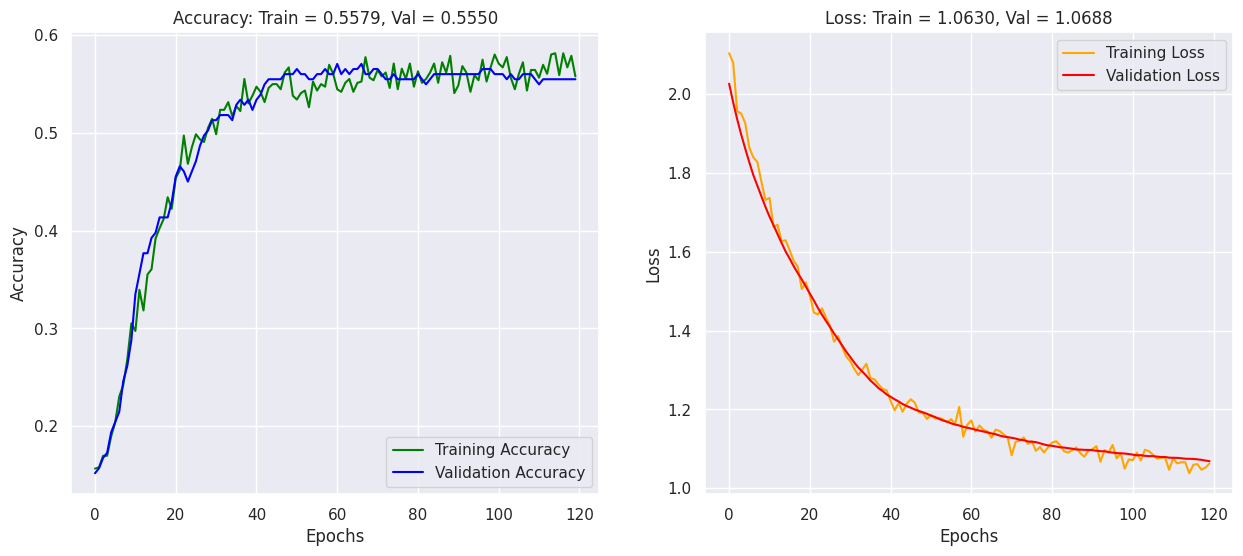

In [97]:
# Try adam Optimizer instead with 120 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam= Sequential()
model_adam.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(6, activation = 'softmax'))

compile_model(model_adam,optimizer_type='adam')

print(model_adam.summary())

history = model_adam.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=120, batch_size=128, verbose=2)
model_adam.test_accuracy = model_adam.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_adam)

In [98]:
test_results = model_adam.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6166 - loss: 0.9651 
[1.0003948211669922, 0.5906862616539001]


### Obsevations:
- Both loss and accurcay graph does not show any sign of overfitting.
- With adam the accuracy is bit better around 55% (highest Till Now)
- There is some fluctuation, especially in the accuracy and loss curves
- Accuracy is increasing, and loss is decreasing as expected.
- **Accurcay with Test or unseen data is around 61**%

#### Model 2.2

### Drop out with 350 epoch and higher batch size of 180

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/350
5/5 - 2s - 310ms/step - accuracy: 0.1447 - loss: 2.1177 - val_accuracy: 0.1466 - val_loss: 2.0346
Epoch 2/350
5/5 - 0s - 20ms/step - accuracy: 0.1368 - loss: 2.1285 - val_accuracy: 0.1518 - val_loss: 1.9948
Epoch 3/350
5/5 - 0s - 20ms/step - accuracy: 0.1618 - loss: 2.0604 - val_accuracy: 0.1623 - val_loss: 1.9558
Epoch 4/350
5/5 - 0s - 28ms/step - accuracy: 0.1737 - loss: 1.9857 - val_accuracy: 0.1675 - val_loss: 1.9204
Epoch 5/350
5/5 - 0s - 20ms/step - accuracy: 0.1803 - loss: 1.9533 - val_accuracy: 0.1780 - val_loss: 1.8890
Epoch 6/350
5/5 - 0s - 19ms/step - accuracy: 0.1684 - loss: 1.9440 - val_accuracy: 0.1937 - val_loss: 1.8575
Epoch 7/350
5/5 - 0s - 18ms/step - accuracy: 0.2053 - loss: 1.8807 - val_accuracy: 0.1990 - val_loss: 1.8316
Epoch 8/350
5/5 - 0s - 29ms/step - accuracy: 0.2118 - loss: 1.8521 - val_accuracy: 0.2094 - val_loss: 1.8030
Epoch 9/350
5/5 - 0s - 28ms/step - accuracy: 0.2395 - loss: 1.7961 - val_accuracy: 0.2251 - val_loss: 1.7771
Epoch 10/350


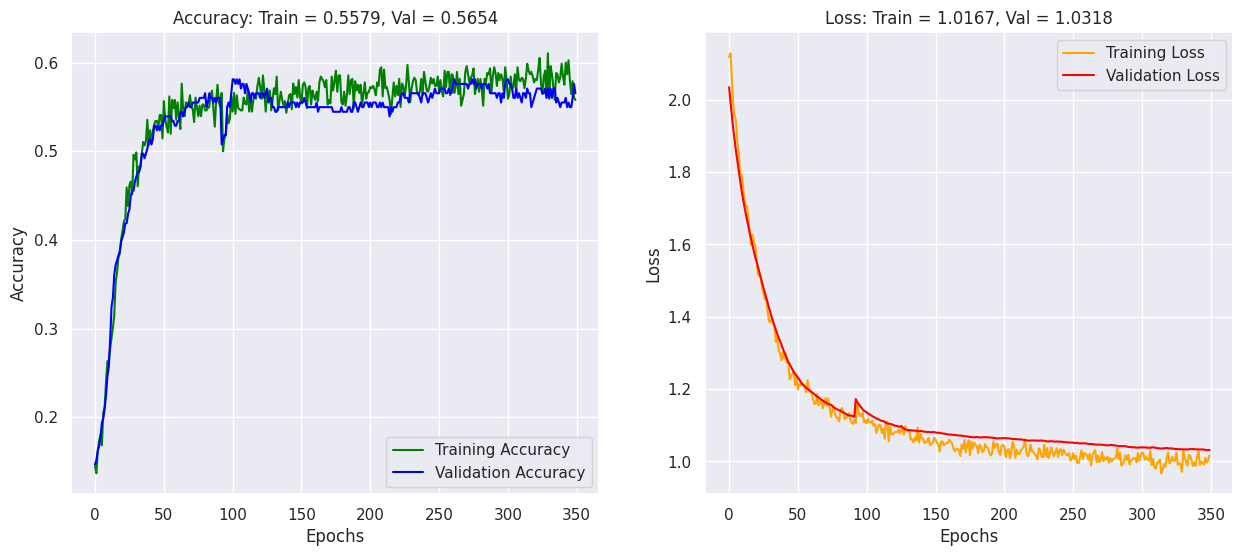

In [99]:
# Try adam Optimizer instead with 350 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam2= Sequential()
model_adam2.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam2.add(Dropout(0.2))
model_adam2.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam2.add(Dropout(0.2))
model_adam2.add(Dense(6, activation = 'softmax'))

compile_model(model_adam2,optimizer_type='adam')

print(model_adam2.summary())

history = model_adam2.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=350, batch_size=180, verbose=2)
model_adam2.test_accuracy = model_adam2.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_adam2)

In [100]:
test_results = model_adam2.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 0.9407 
[0.9755494594573975, 0.5980392098426819]


### Observation:
- Both plot are converging pretty well.
- Training and validation accuracy curves follow a similar trend.
- No significant gap between them, suggesting minimal overfitting.
- Accuracy stabilizes around 0.57, indicating room for improvement.

**Loss Plot:**
- Both training and validation loss decrease steadily.
- No sudden spikes, which means training is stable.
- Validation loss is not diverging, indicating no severe overfitting.
- Slight increase in accurcay by 2 % (57%)
---
- **Test data(Unseen Data) accuracy is around 62%(Best Till now)**

### Infernce with respect Model 2.1
- Compare to Model 2.1 with 120 epoch this is a better model in terms of test score .Even the convergnace with training seems to better.
- We can see the loss curve has less flactuation compared Model 2.1
- There is some fluctuation, especially in the accuracy .


### Model 3 Batch normalization

##### Model 3.1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336 (1.31 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 36 (144.00 B)

None
Epoch 1/200
5/5 - 1s - 227ms/step - accuracy: 0.1447 - loss: 2.2642 - val_accuracy: 0.0471 - val_loss: 2.8825
Epoch 2/200
5/5 - 0s - 20ms/step - accuracy: 0.1461 - loss: 2.2587 - val_accuracy: 0.0524 - val_loss: 2.8405
Epoch 3/200
5/5 - 0s - 26ms/step - accuracy: 0.1461 - loss: 2.2532 - val_accuracy: 0.0524 - val_loss: 2.8014
Epoch 4/200
5/5 - 0s - 20ms/step - accuracy: 0.1474 - loss: 2.2477 - val_accuracy: 0.0628 - val_loss: 2.7649
Epoch 5/200
5/5 - 0s - 19ms/step - accuracy: 0.1487 - loss: 2.2423 - val_accuracy: 0.0628 - val_loss: 2.7307
Epoch 6/200
5/5 - 0s - 28ms/step - accuracy: 0.1513 - loss: 2.2370 - val_accuracy: 0.0838 - val_loss: 2.6989
Epoch 7/200
5/5 - 0s - 19ms/step - accuracy: 0.1553 - loss: 2.2316 - val_accuracy: 0.0995 - val_loss: 2.6686
Epoch 8/200
5/5 - 0s - 33ms/step - accuracy: 0.1553 - loss: 2.2263 - val_accuracy: 0.0995 - val_loss: 2.6402
Epoch 9/200
5/5 - 0s - 31ms/step - accuracy: 0.1566 - loss: 2.2210 - val_accuracy: 0.1099 - val_loss: 2.6136
Epoch 10/200


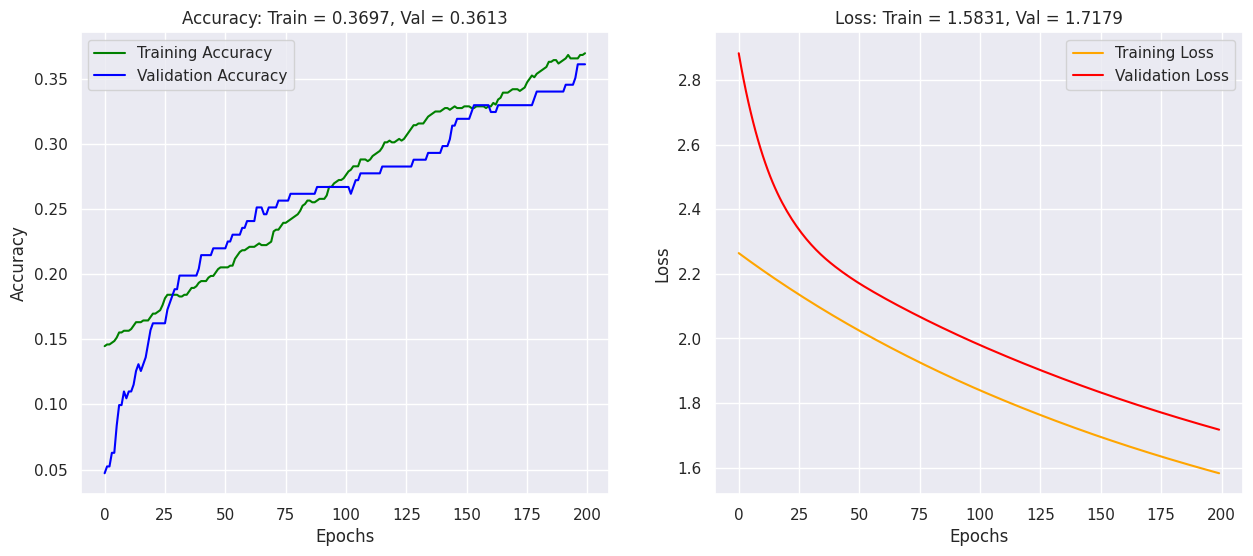

In [101]:
# Batch Normalization along  with the 200 epoch and  drop out best batch_size values

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
random.seed(42)
tf.random.set_seed(42)

model_batch_norm = Sequential()
model_batch_norm.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(6, activation = 'softmax'))

compile_model(model_batch_norm,'sgd')

print(model_batch_norm.summary())
history = model_batch_norm.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=200, batch_size=180, verbose=2)
model_batch_norm.test_accuracy = model_batch_norm.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_batch_norm)

### Observation:
- **Accuracy Plot Green Line (Training Accuracy):**
- Gradually increases and plateaus near 37%.
- Suggests the model is not learning patterns from training data.
- **Blue Line (Validation Accuracy)** Follows training accuracy initially.
Stalls around the same
- Loss graph is smooth but the the validarion loss seems to be wider as we went down so possible overfiiting


##### Model 3.2

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336 (1.31 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 36 (144.00 B)

None
Epoch 1/200
5/5 - 3s - 547ms/step - accuracy: 0.1500 - loss: 2.2528 - val_accuracy: 0.0471 - val_loss: 2.8368
Epoch 2/200
5/5 - 0s - 29ms/step - accuracy: 0.1618 - loss: 2.2109 - val_accuracy: 0.0524 - val_loss: 2.7492
Epoch 3/200
5/5 - 0s - 34ms/step - accuracy: 0.1671 - loss: 2.1697 - val_accuracy: 0.0576 - val_loss: 2.6659
Epoch 4/200
5/5 - 0s - 37ms/step - accuracy: 0.1763 - loss: 2.1297 - val_accuracy: 0.0785 - val_loss: 2.5860
Epoch 5/200
5/5 - 0s - 51ms/step - accuracy: 0.1868 - loss: 2.0915 - val_accuracy: 0.0942 - val_loss: 2.5140
Epoch 6/200
5/5 - 0s - 28ms/step - accuracy: 0.2000 - loss: 2.0539 - val_accuracy: 0.1047 - val_loss: 2.4467
Epoch 7/200
5/5 - 0s - 28ms/step - accuracy: 0.2158 - loss: 2.0175 - val_accuracy: 0.1152 - val_loss: 2.3858
Epoch 8/200
5/5 - 0s - 68ms/step - accuracy: 0.2289 - loss: 1.9822 - val_accuracy: 0.1152 - val_loss: 2.3303
Epoch 9/200
5/5 - 0s - 35ms/step - accuracy: 0.2487 - loss: 1.9484 - val_accuracy: 0.1309 - val_loss: 2.2783
Epoch 10/200


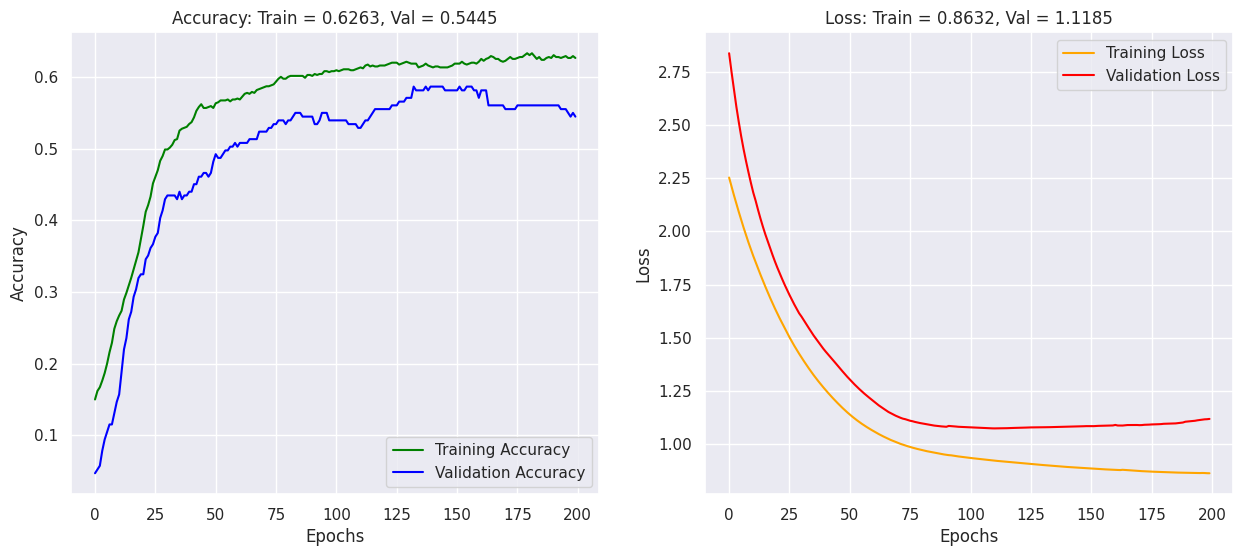

In [102]:
# Batch Normalization along  with the 200 epoch and  drop out best batch_size values

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
random.seed(42)
tf.random.set_seed(42)

model_batch_norm = Sequential()
model_batch_norm.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(6, activation = 'softmax'))

compile_model(model_batch_norm,'adam')

print(model_batch_norm.summary())
history = model_batch_norm.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=200, batch_size=180, verbose=2)
model_batch_norm.test_accuracy = model_batch_norm.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_batch_norm)

### Observations:
There is slight Improvement with adam but not much difference as we see clear diverging in loss graph and there is clear sign of overfitting.

- **Accuracy Plot Green Line (Training Accuracy):**
- Gradually increases and plateaus near 62%.
- Suggests the model is learning patterns from training data.
- **Blue Line (Validation Accuracy)** Follows training accuracy initially.
Stalls around 55% after 100+ epochs → Possible overfitting.
The gap between training and validation accuracy is increasing, suggesting the model is memorizing rather than generalizing.
- Loss graph is smooth but the the validarion loss seems to be wider as we went down so possible overfiiting


### Model 2.2 vs Model 3
- Model 2.2 is best model till now with 62% test accuracy and convergence but with noise.
- Model 3 has high devergence compared to Model 2.2 we can see both loss and accuracy is diverging and it seems Model 3 is overfitting and trying to learn the dataset

### Model 4 Funnel Design (Reduce the no of neurons as we go)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324 (1.27 KB)

 Trainable params: 324 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
5/5 - 2s - 323ms/step - accuracy: 0.0197 - loss: 2.0501 - val_accuracy: 0.0366 - val_loss: 2.0095
Epoch 2/200
5/5 - 0s - 83ms/step - accuracy: 0.0289 - loss: 2.0036 - val_accuracy: 0.0576 - val_loss: 1.9740
Epoch 3/200
5/5 - 0s - 20ms/step - accuracy: 0.0382 - loss: 1.9615 - val_accuracy: 0.0890 - val_loss: 1.9427
Epoch 4/200
5/5 - 0s - 22ms/step - accuracy: 0.0829 - loss: 1.9236 - val_accuracy: 0.1414 - val_loss: 1.9140
Epoch 5/200
5/5 - 0s - 25ms/step - accuracy: 0.1408 - loss: 1.8895 - val_accuracy: 0.1990 - val_loss: 1.8885
Epoch 6/200
5/5 - 0s - 19ms/step - accuracy: 0.1842 - loss: 1.8582 - val_accuracy: 0.2251 - val_loss: 1.8659
Epoch 7/200
5/5 - 0s - 19ms/step - accuracy: 0.2197 - loss: 1.8300 - val_accuracy: 0.2565 - val_loss: 1.8451
Epoch 8/200
5/5 - 0s - 20ms/step - accuracy: 0.2605 - loss: 1.8049 - val_accuracy: 0.2827 - val_loss: 1.8261
Epoch 9/200
5/5 - 0s - 19ms/step - accuracy: 0.3184 - loss: 1.7819 - val_accuracy: 0.3246 - val_loss: 1.8086
Epoch 10/200


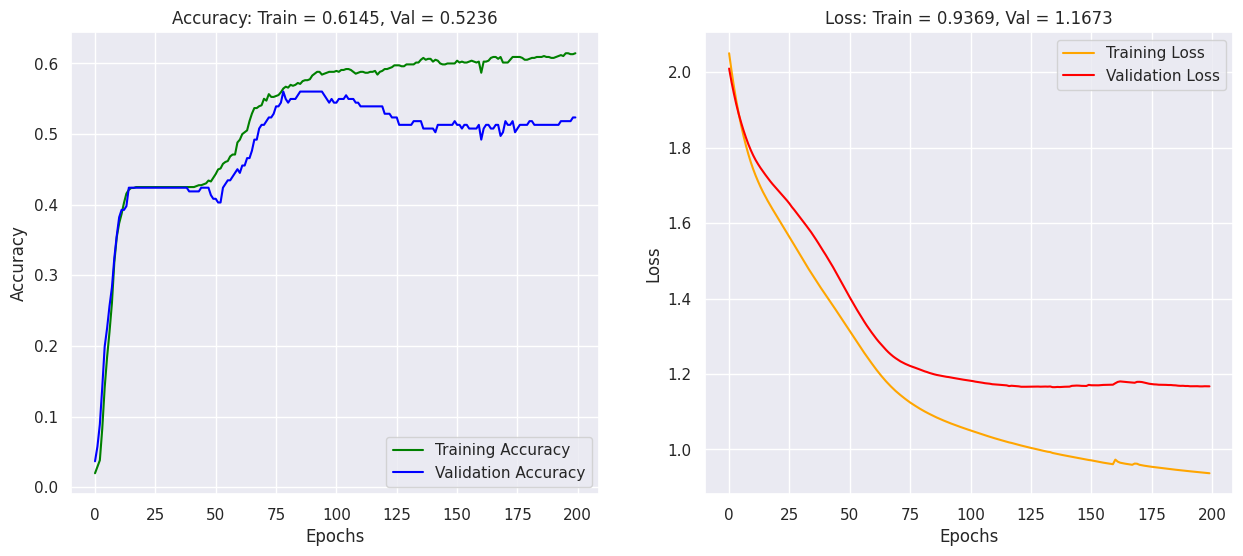

In [103]:
# Stochastic Gradient Optimizer

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime

random.seed(42)
tf.random.set_seed(42)

# Define funnel model starting with 11 neurons (input features)
funnel_model = Sequential([
    Dense(11, activation='relu', input_shape=(11,)),  # Input layer (equal to feature count)
    Dense(8, activation='relu'),   # Reduced neurons
    Dense(6, activation='relu'),   # Further reduction
    Dense(6, activation='softmax')  # Output layer for 6 classes
])

compile_model(funnel_model)
print(funnel_model.summary())

history = funnel_model.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=200, batch_size=180, verbose=2)
funnel_model.test_accuracy = funnel_model.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, funnel_model)

### Observations:
-  We can see both accuracy and losses are deverging after initial steadiness .
- Training acuracy is higher around .61 but lower in validation .53. Similar chart we can see for loss as well (validation loss at 1.21 where as training loss is around .91)
- It seems like the model is trying to learn specific to dataset not in general.

### Model 5 ( With checkpoint and Early Stopping)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/350
5/5 - 2s - 311ms/step - accuracy: 0.1447 - loss: 2.1177 - val_accuracy: 0.1466 - val_loss: 2.0346
Epoch 2/350
5/5 - 0s - 25ms/step - accuracy: 0.1368 - loss: 2.1285 - val_accuracy: 0.1518 - val_loss: 1.9948
Epoch 3/350
5/5 - 0s - 25ms/step - accuracy: 0.1618 - loss: 2.0604 - val_accuracy: 0.1623 - val_loss: 1.9558
Epoch 4/350
5/5 - 0s - 27ms/step - accuracy: 0.1737 - loss: 1.9857 - val_accuracy: 0.1675 - val_loss: 1.9204
Epoch 5/350
5/5 - 0s - 29ms/step - accuracy: 0.1803 - loss: 1.9533 - val_accuracy: 0.1780 - val_loss: 1.8890
Epoch 6/350
5/5 - 0s - 25ms/step - accuracy: 0.1684 - loss: 1.9440 - val_accuracy: 0.1937 - val_loss: 1.8575
Epoch 7/350
5/5 - 0s - 25ms/step - accuracy: 0.2053 - loss: 1.8807 - val_accuracy: 0.1990 - val_loss: 1.8316
Epoch 8/350
5/5 - 0s - 24ms/step - accuracy: 0.2118 - loss: 1.8521 - val_accuracy: 0.2094 - val_loss: 1.8030
Epoch 9/350
5/5 - 0s - 23ms/step - accuracy: 0.2395 - loss: 1.7961 - val_accuracy: 0.2251 - val_loss: 1.7771
Epoch 10/350


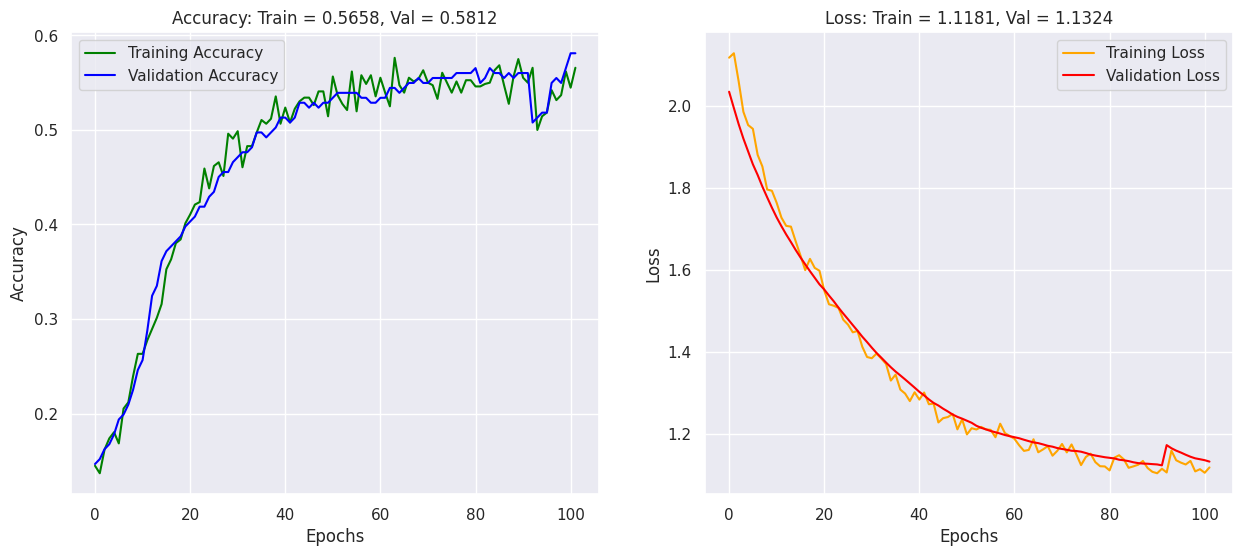

In [104]:
backend.clear_session()

# Fixing the seed for reproducibility
random.seed(42)
tf.random.set_seed(42)

# Define model
model_adam_with_es = Sequential([
    Dense(11, activation='relu', input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(8, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

# Compile the model (assuming you have a function compile_model)
compile_model(model_adam_with_es, optimizer_type='adam')

# Print model summary
print(model_adam_with_es.summary())

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model_adam_with_es.fit(
    X_train_scaled, yv_train,
    validation_data=(X_test_scaled, y_val),
    epochs=350,
    batch_size=180,
    verbose=2,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the best model
model_adam_with_es.test_accuracy = model_adam_with_es.evaluate(X_test_scaled, y_val, verbose=1)

# Plot accuracy and loss
plot_model_accuracy(history, model_adam_with_es)

In [105]:
test_results = model_adam_with_es.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5844 - loss: 1.0236 
[1.0623250007629395, 0.5759803652763367]


### Observations:
- We can see both loss and accuracy are converging well for training and validation
- The Test accuracy is around .60 which is almost similar to Model 2.2
- Earlystopping can help to avoid overfitting

### Model 2.2 vs Model 5
- Both are almost same model and plot looks mirrior image of each other
- Only difference we have used eraly stopping to avoid overfitting so in plot of accuracy we can see that miniute difference in the accuracy plot.

### Model 6

#### Taking the whole dataset as we have less records in signal dataset i.e around 1300 .So may be we need a bigger sample .
-  We will do validation on y-test instaed of having seperate sample to learn .

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/350
8/8 - 2s - 192ms/step - accuracy: 0.1462 - loss: 2.1145 - val_accuracy: 0.1176 - val_loss: 1.9226
Epoch 2/350
8/8 - 0s - 13ms/step - accuracy: 0.1630 - loss: 2.0679 - val_accuracy: 0.1176 - val_loss: 1.8670
Epoch 3/350
8/8 - 0s - 15ms/step - accuracy: 0.1504 - loss: 1.9961 - val_accuracy: 0.1446 - val_loss: 1.8171
Epoch 4/350
8/8 - 0s - 16ms/step - accuracy: 0.1945 - loss: 1.9423 - val_accuracy: 0.1765 - val_loss: 1.7734
Epoch 5/350
8/8 - 0s - 13ms/step - accuracy: 0.2482 - loss: 1.8905 - val_accuracy: 0.2010 - val_loss: 1.7339
Epoch 6/350
8/8 - 0s - 18ms/step - accuracy: 0.2292 - loss: 1.8466 - val_accuracy: 0.2451 - val_loss: 1.6974
Epoch 7/350
8/8 - 0s - 13ms/step - accuracy: 0.2503 - loss: 1.7738 - val_accuracy: 0.2794 - val_loss: 1.6653
Epoch 8/350
8/8 - 0s - 17ms/step - accuracy: 0.2744 - loss: 1.7613 - val_accuracy: 0.3186 - val_loss: 1.6392
Epoch 9/350
8/8 - 0s - 13ms/step - accuracy: 0.3165 - loss: 1.6995 - val_accuracy: 0.3480 - val_loss: 1.6103
Epoch 10/350


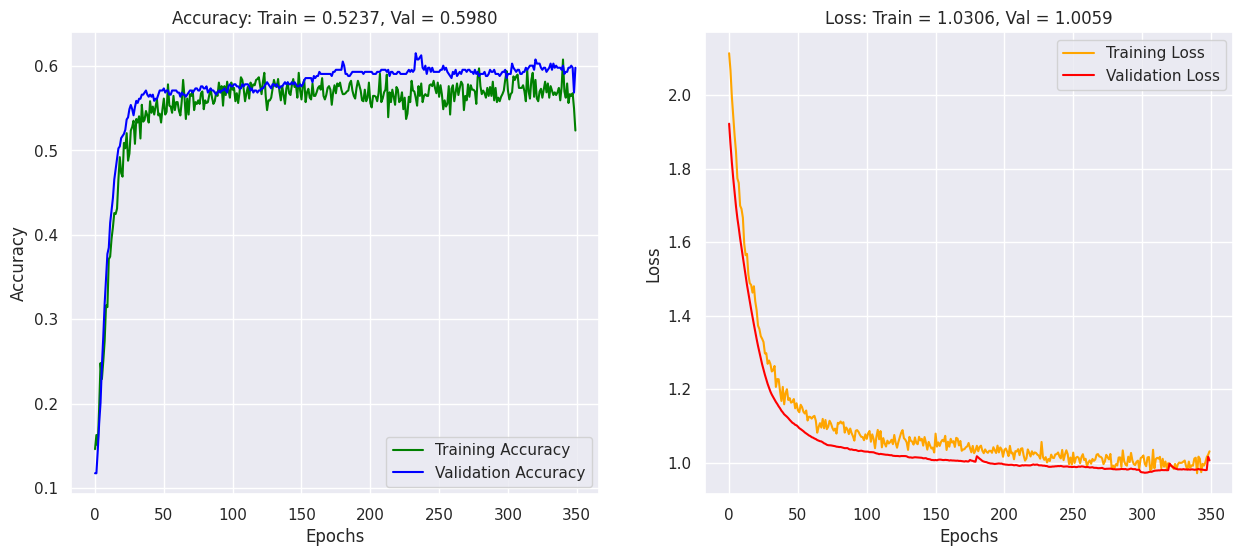

In [106]:
backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam_all= Sequential()
model_adam_all.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam_all.add(Dropout(0.2))
model_adam_all.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam_all.add(Dropout(0.2))
model_adam_all.add(Dense(6, activation = 'softmax'))

compile_model(model_adam_all,optimizer_type='adam')

print(model_adam_all.summary())

history = model_adam_all.fit(X_train_scaled_actual, y_train, validation_data= [X_test_scaled_actual, y_test], epochs=350, batch_size=128, verbose=2)
model_adam_all.test_accuracy = model_adam_all.evaluate(X_test_scaled_actual, y_test, verbose = 1)
plot_model_accuracy(history, model_adam_all)

### Observation:
- Here we tried the training with 70% sample and test data is used as validation set .We could able to achieve 60% accuracy
-  There are some up and downs and curve is not smooth may be due to drop out .
- This might be better in terms of validatiin score if we compare with Model 2.2 Drop out witrh 350 epoch but then we donot have unseen data as we have used everything .

### Model Optimzation Random Search CV

In [107]:
keras_estimator = KerasClassifier(
    build_fn=create_model_v4,
    lr=0.01,
    batch_size=32,
    units_1=16,
    units_2=6,
    activation="relu",
    dropout_rate=0.2,
    optimizer="adam",
    num_layers=2,
    verbose=1
)# define the grid search parameters
param_random = {
    'batch_size':[16,32, 64, 128],
    "lr":[0.01,0.1,0.001],
    "units_1": [8, 16, 32, 64],
    "units_2": [4, 6, 12, 24],
    "activation": ["relu", "tanh", "swish", "leaky_relu"],
    "dropout_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
    "optimizer": ["adam", "sgd", "rmsprop", "nadam"],
    "num_layers": [1, 2, 3, 4]
    }

kfold_splits = 3
random_search= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    n_iter=10,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [108]:
random_result = random_search.fit(X_train_scaled_actual, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2765 - loss: 2.2953 - val_accuracy: 0.3455 - val_loss: 1.4822
Best: 0.484753 using {'units_2': 4, 'units_1': 64, 'optimizer': 'nadam', 'num_layers': 3, 'lr': 0.01, 'dropout_rate': 0.1, 'batch_size': 16, 'activation': 'relu'}


In [109]:
random_result.best_params_

{'units_2': 4,
 'units_1': 64,
 'optimizer': 'nadam',
 'num_layers': 3,
 'lr': 0.01,
 'dropout_rate': 0.1,
 'batch_size': 16,
 'activation': 'relu'}

Best Hyperparameters: {'units_2': 4, 'units_1': 64, 'optimizer': 'nadam', 'num_layers': 3, 'lr': 0.01, 'dropout_rate': 0.1, 'batch_size': 16, 'activation': 'relu'}
Epoch 1/350
8/8 - 3s - 381ms/step - accuracy: 0.2776 - loss: 1.7795 - val_accuracy: 0.4559 - val_loss: 1.6987
Epoch 2/350
8/8 - 0s - 20ms/step - accuracy: 0.4048 - loss: 1.6584 - val_accuracy: 0.4804 - val_loss: 1.5902
Epoch 3/350
8/8 - 0s - 31ms/step - accuracy: 0.3891 - loss: 1.5537 - val_accuracy: 0.4461 - val_loss: 1.4780
Epoch 4/350
8/8 - 0s - 17ms/step - accuracy: 0.4122 - loss: 1.4468 - val_accuracy: 0.3995 - val_loss: 1.3922
Epoch 5/350
8/8 - 0s - 13ms/step - accuracy: 0.4805 - loss: 1.3702 - val_accuracy: 0.5368 - val_loss: 1.3238
Epoch 6/350
8/8 - 0s - 18ms/step - accuracy: 0.5005 - loss: 1.3163 - val_accuracy: 0.5000 - val_loss: 1.2713
Epoch 7/350
8/8 - 0s - 17ms/step - accuracy: 0.4616 - loss: 1.2763 - val_accuracy: 0.5025 - val_loss: 1.2353
Epoch 8/350
8/8 - 0s - 20ms/step - accuracy: 0.4784 - loss: 1.2360 - val

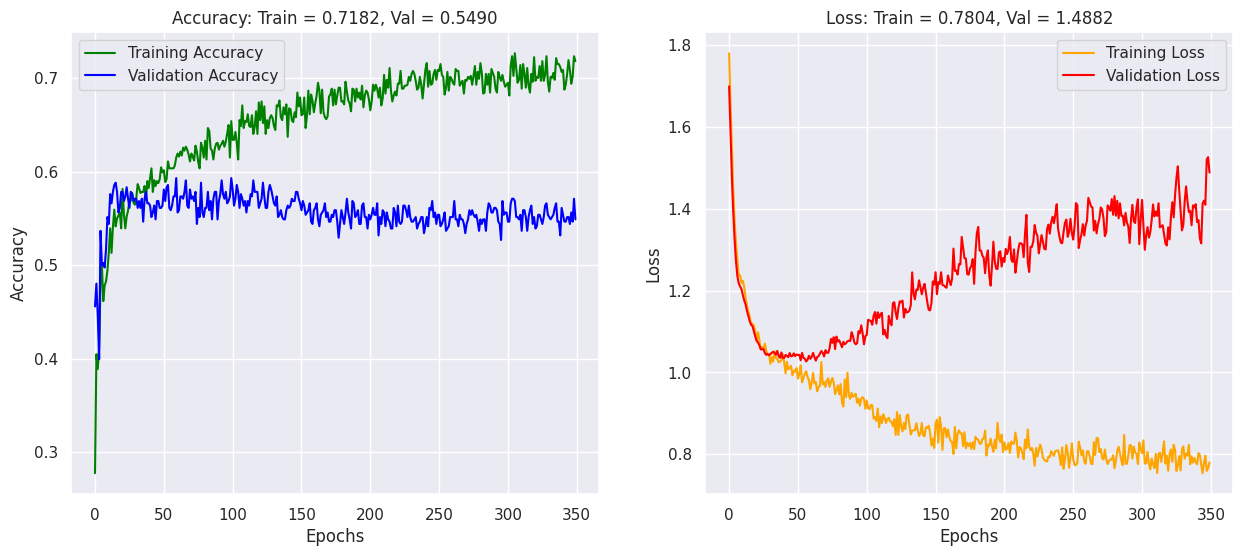

In [110]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a final model using the best parameters
final_model = create_model_v4(
    lr=best_params["lr"],
    units_1=best_params["units_1"],
    units_2=best_params["units_2"],
    activation=best_params["activation"],
    dropout_rate=best_params["dropout_rate"],
    optimizer=best_params["optimizer"],
    num_layers=best_params["num_layers"]
)
# Train the final model on the entire dataset
history = final_model.fit(X_train_scaled_actual, y_train, validation_data= [X_test_scaled_actual, y_test], epochs=350, batch_size=128, verbose=2)
final_model.test_accuracy = final_model.evaluate(X_test_scaled_actual, y_test, verbose = 1)
plot_model_accuracy(history, final_model)




### Observations:
 - No improvement with Ramdom search CV as accuracy is quite less
 - There is no convergence and even the plots are not smooth and full of noise.
 - There is some hint of overfitting as well.
 - Both the plot show high divergence

**Models 2.2,5 and 6 were found to be the best performing models with good  convergence with training & validation Loss & Accuracy curves with their respective highest found Validation Accuracies as 58% Test score as 60.29, Validation score 56 % and Test score 60.59, Validation score 60.04 %** .

**Part B**

- Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides.

**Dataset:**
- SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

- Build a digit Classifier on SVHN (Street View Housing number)

### Import additional lib required for part B

In [19]:
import h5py


## Read h5 file

Part B - Q1 A - Read the .h5 file and assign to a variable.


In [20]:
# Read h5 file from google drive
svhn = h5py.File(f'{path}//Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')


Part B - Q1 B - Print all the keys from the .h5 file.

In [21]:
# print all the keys inside h5
for i in svhn.keys():
  print(i)

X_test
X_train
X_val
y_test
y_train
y_val


#### Observation:
We have 6 keys in Autonomous_Vehicles_SVHN_single_grey1.h5 file .
**X_test,X_train,X_val,y_test,y_train,y_val**


Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test


In [22]:
# Read data into variables:
X_svhn_train = svhn['X_train'][:]
y_svhn_train = svhn['y_train'][:]
X_svhn_test = svhn['X_test'][:]
y_svhn_test = svhn['y_test'][:]
X_svhn_val = svhn['X_val'][:]
y_svhn_val = svhn['y_val'][:]
# Closing the file:
svhn.close()

## Print training validation and test set

Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.


In [23]:
print(f"Training Sample--> {X_svhn_train.shape}")
print(f"y_train.shape--> {y_svhn_train.shape}")
print(f"Testing Sample--> {X_svhn_test.shape}")
print(f"y_test.shape--> {y_svhn_test.shape}")
print(f"Validation Sample--> {X_svhn_val.shape}")
print(f"y_val.shape--> {y_svhn_val.shape}")

Training Sample--> (42000, 32, 32)
y_train.shape--> (42000,)
Testing Sample--> (18000, 32, 32)
y_test.shape--> (18000,)
Validation Sample--> (60000, 32, 32)
y_val.shape--> (60000,)


#### Observation:
- Train sample has 42000 records.
- Test sample has around 18000 records.
- Validation sample has 60000 records
- We can see both x and y are in same shape so in sync

In [24]:
print(f"Total Images {X_svhn_train.shape[0]+X_svhn_test.shape[0]+X_svhn_val.shape[0]}")

Total Images 120000


#### Observation:
We have around .12 million images

In [25]:
# Unique classes
set(y_svhn_train.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Observation:
There are 10 unique classes starting from 0 to 9

Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.


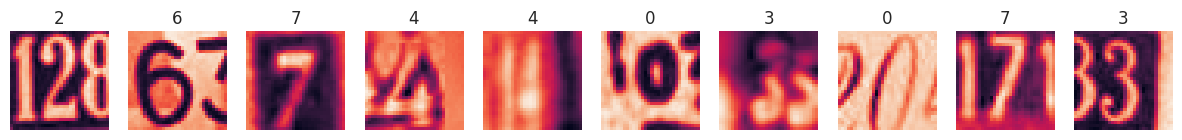

In [26]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))  # 1 row, 10 columns

for i in range(10):
    axes[i].imshow(X_svhn_train[i])  # Display each image
    axes[i].set_title(y_svhn_train[i])  # Set label as title
    axes[i].axis("off")  # Hide axes for better visualization
plt.show()

## Shaping the Variable For Neural Network Model

Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.


In [27]:
X_svhn_train = X_svhn_train.reshape(len(X_svhn_train), 32*32)
X_svhn_test = X_svhn_test.reshape(len(X_svhn_test), 32*32)
X_svhn_val = X_svhn_val.reshape(len(X_svhn_val), 32*32)


In [28]:
# Printing the shape of Training, Test and Validation Dataset:
print('Resized Training set feature shape = ', X_svhn_train.shape, y_svhn_train.shape)
print('Resized Test set feature shape = ', X_svhn_test.shape, y_svhn_test.shape)
print('Resized Validation set feature shape = ', X_svhn_val.shape, y_svhn_val.shape)

Resized Training set feature shape =  (42000, 1024) (42000,)
Resized Test set feature shape =  (18000, 1024) (18000,)
Resized Validation set feature shape =  (60000, 1024) (60000,)


#### Observations:
- We have created a 1D vector.
- After reshape we see same no of records or rows but we have

Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [29]:
X_svhn_train = X_svhn_train / 255
X_svhn_test = X_svhn_test / 255
X_svhn_val = X_svhn_val / 255

#### Observations:
we have normalised the value for neural networks by dividing by 255

Part B - Q2 E - Transform Labels into format acceptable by Neural Network

In [30]:
y_svhn_train = to_categorical(y_svhn_train)
y_svhn_test = to_categorical(y_svhn_test)
y_svhn_val = to_categorical(y_svhn_val)

In [31]:
print(f"Training firsr 5 values after apply catogoricak {y_svhn_train[0:5]}")
print(f"Testing firsr 5 values after apply catogoricak {y_svhn_test[0:5]}")
print(f"Validation firsr 5 values after apply catogoricak {y_svhn_val[0:5]}")

Training firsr 5 values after apply catogoricak [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Testing firsr 5 values after apply catogoricak [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Validation firsr 5 values after apply catogoricak [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Observations:
Transformed lables with to_catgorical so that we can use in neural network


Part B - Q2 F - Print total Number of classes in the Dataset.


In [32]:
y_svhn_train_transform=np.argmax(y_svhn_train,axis=1)
print(f"Unique Values{np.unique(y_svhn_train_transform)}")

Unique Values[0 1 2 3 4 5 6 7 8 9]


#### Observations:
We can see there are 10 classes ranging from 0 to 9

## Model Building

###Model 1 (Basic Model SGD optimiser 1 hiddedn layer without any initialization)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1015 - loss: 2.3080 - val_accuracy: 0.1178 - val_loss: 2.2971
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1198 - loss: 2.2963 - val_accuracy: 0.1332 - val_loss: 2.2911
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1342 - loss: 2.2901 - val_accuracy: 0.1494 - val_loss: 2.2848
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1483 - loss: 2.2836 - val_accuracy: 0.1653 - val_loss: 2.2783
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1632 - loss: 2.2768 - val_accuracy: 0.1878 - val_loss: 2.2706
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.1822 - loss: 2.2689 - val_accuracy: 0.2104 - val_loss: 2.2622
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2010 - loss: 2.2602 - val_accuracy: 0.2339 - val_loss: 2.2524
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2227 - loss: 2.2

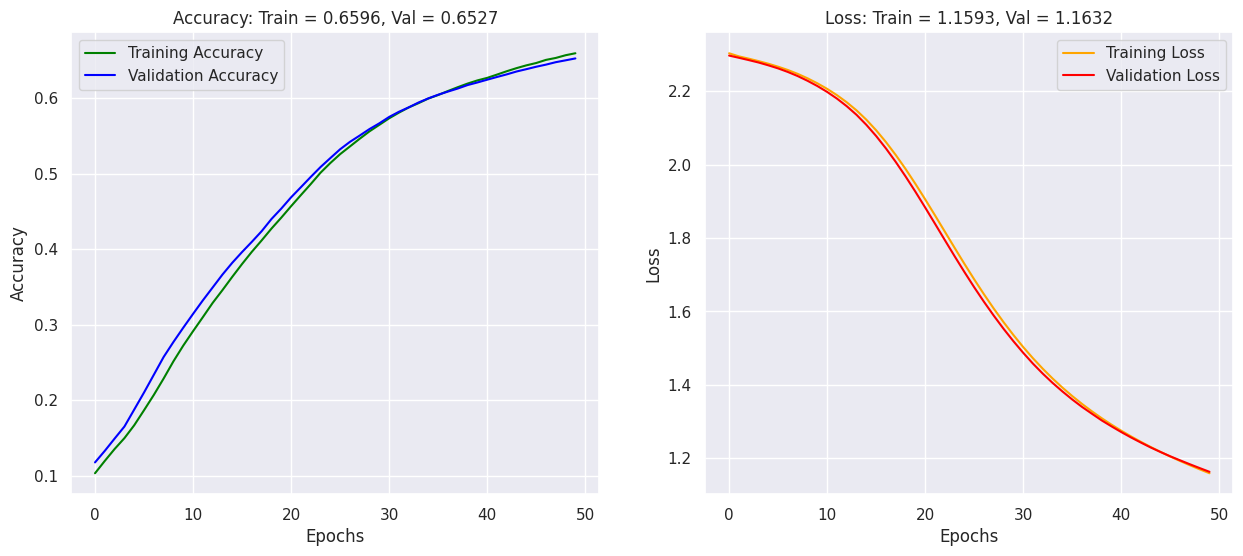

In [150]:
# Create basic model with SGD
backend.clear_session()
svhn_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(1024,)),  # First hidden layer
    Dense(64, activation='relu'),  # second hidden layer
    Dense(10, activation='softmax') # Output layer (10 classes)
])

compile_model(svhn_model_1,'sgd',momentum=0.0)

# fit the model
history_svhn=svhn_model_1.fit(X_svhn_train, y_svhn_train,validation_data=[X_svhn_val,y_svhn_val], epochs=50)
svhn_model_1.test_accuracy = svhn_model_1.evaluate(X_svhn_val, y_svhn_val, verbose = 2)
# plot the accuracy
plot_model_accuracy(history_svhn, svhn_model_1)

In [153]:
# Test results
test_results = svhn_model_1.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6561 - loss: 1.1457
[1.1667382717132568, 0.6501111388206482]


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


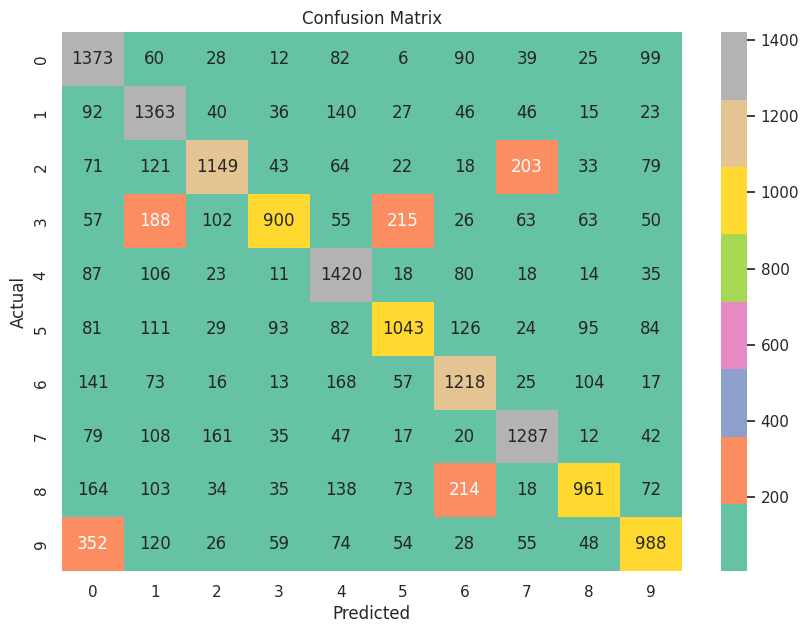

In [161]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_1,X_svhn_test,y_svhn_test )

In [162]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_1,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Misclassifications (Actual → Predicted : Count)
9 → 0 : 352
3 → 5 : 215
8 → 6 : 214
2 → 7 : 203
3 → 1 : 188
6 → 4 : 168
8 → 0 : 164
7 → 2 : 161
6 → 0 : 141
1 → 4 : 140
8 → 4 : 138
5 → 6 : 126
2 → 1 : 121
9 → 1 : 120
5 → 1 : 111
7 → 1 : 108
4 → 1 : 106
6 → 8 : 104
8 → 1 : 103
3 → 2 : 102
0 → 9 : 99
5 → 8 : 95
5 → 3 : 93
1 → 0 : 92
0 → 6 : 90
4 → 0 : 87
5 → 9 : 84
0 → 4 : 82
5 → 4 : 82
5 → 0 : 81
4 → 6 : 80
2 → 9 : 79
7 → 0 : 79
9 → 4 : 74
6 → 1 : 73
8 → 5 : 73
8 → 9 : 72
2 → 0 : 71
2 → 4 : 64
3 → 7 : 63
3 → 8 : 63
0 → 1 : 60
9 → 3 : 59
3 → 0 : 57
6 → 5 : 57
3 → 4 : 55
9 → 7 : 55
9 → 5 : 54
3 → 9 : 50
9 → 8 : 48
7 → 4 : 47
1 → 6 : 46
1 → 7 : 46
2 → 3 : 43
7 → 9 : 42
1 → 2 : 40
0 → 7 : 39
1 → 3 : 36
4 → 9 : 35
7 → 3 : 35
8 → 3 : 35
8 → 2 : 34
2 → 8 : 33
5 → 2 : 29
0 → 2 : 28
9 → 6 : 28
1 → 5 : 27
3 → 6 : 26
9 → 2 : 26
0 → 8 : 25
6 → 7 : 25
5 → 7 : 24
1 → 9 : 23
4 → 2 : 23
2 → 5 : 22
7 → 6 : 20
2 → 6 : 18
4 → 5 : 18
4 → 7 : 18
8 → 7 : 18
6 → 9 : 17


[((9, 0), np.int32(352)),
 ((3, 5), np.int32(215)),
 ((8, 6), np.int32(214)),
 ((2, 7), np.int32(203)),
 ((3, 1), np.int32(188)),
 ((6, 4), np.int32(168)),
 ((8, 0), np.int32(164)),
 ((7, 2), np.int32(161)),
 ((6, 0), np.int32(141)),
 ((1, 4), np.int32(140)),
 ((8, 4), np.int32(138)),
 ((5, 6), np.int32(126)),
 ((2, 1), np.int32(121)),
 ((9, 1), np.int32(120)),
 ((5, 1), np.int32(111)),
 ((7, 1), np.int32(108)),
 ((4, 1), np.int32(106)),
 ((6, 8), np.int32(104)),
 ((8, 1), np.int32(103)),
 ((3, 2), np.int32(102)),
 ((0, 9), np.int32(99)),
 ((5, 8), np.int32(95)),
 ((5, 3), np.int32(93)),
 ((1, 0), np.int32(92)),
 ((0, 6), np.int32(90)),
 ((4, 0), np.int32(87)),
 ((5, 9), np.int32(84)),
 ((0, 4), np.int32(82)),
 ((5, 4), np.int32(82)),
 ((5, 0), np.int32(81)),
 ((4, 6), np.int32(80)),
 ((2, 9), np.int32(79)),
 ((7, 0), np.int32(79)),
 ((9, 4), np.int32(74)),
 ((6, 1), np.int32(73)),
 ((8, 5), np.int32(73)),
 ((8, 9), np.int32(72)),
 ((2, 0), np.int32(71)),
 ((2, 4), np.int32(64)),
 ((3,

we can see many(around 352) 9 are predicted as 0 similarly many 3 are predicted as 5. We will check if this improves .

#### Observations:
-  Basic model is not bad with 65% val accuracy and 1.15 loss
- Both curves are closely following each other, which is a good sign (no major overfitting).
-  plot are smoothened so  not much noise while training
- Test accurcay with unseen data is 66%



### Model 2:(SGD) (3 hidden Layer)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1036 - loss: 2.3177 - val_accuracy: 0.1215 - val_loss: 2.2953
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1302 - loss: 2.2935 - val_accuracy: 0.1414 - val_loss: 2.2863
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1513 - loss: 2.2845 - val_accuracy: 0.1578 - val_loss: 2.2761
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1707 - loss: 2.2739 - val_accuracy: 0.1822 - val_loss: 2.2645
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1961 - loss: 2.2619 - val_accuracy: 0.2016 - val_loss: 2.2505
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2187 - loss: 2.2468 - val_accuracy: 0.2275 - val_loss: 2.2319
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2430 - loss: 2.2269 - val_accuracy: 0.2537 - val_loss: 2.2082
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2694 - loss: 2.2

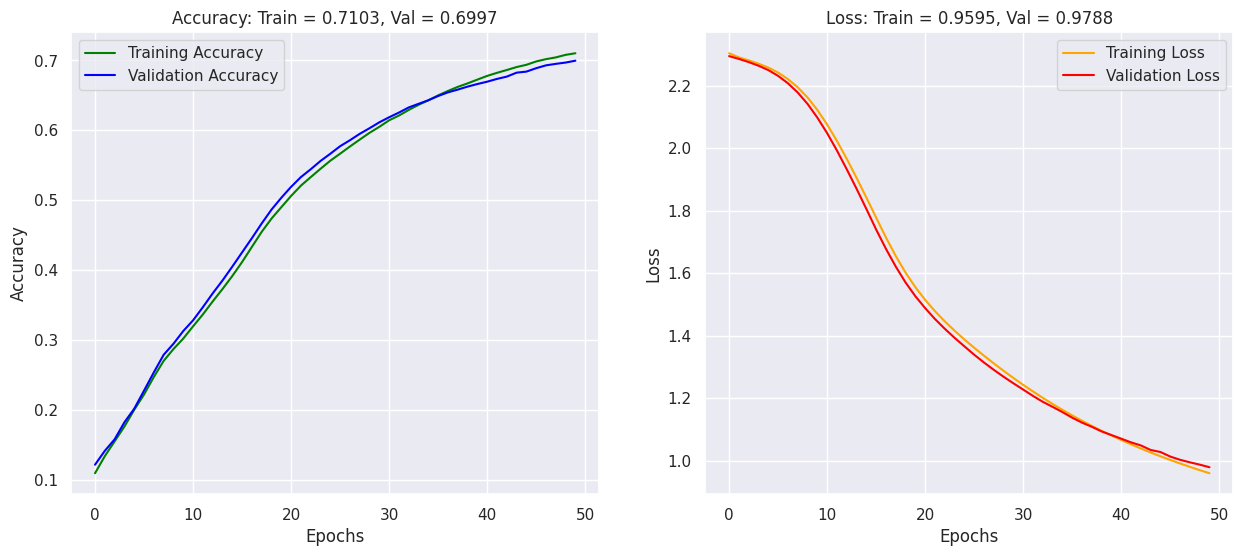

In [157]:
# Create basic model with SGD
backend.clear_session()
svhn_model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),  # Init  layer
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),  # second hidden layer
    Dense(64, activation='relu'),   # third hidden layer
    Dense(10, activation='softmax') # Output layer (10 classes)
])

compile_model(svhn_model_2,'sgd',momentum=0.0)

# fit thye model
history_svhn_2=svhn_model_2.fit(X_svhn_train, y_svhn_train,validation_data=[X_svhn_val,y_svhn_val], epochs=50)
svhn_model_2.test_accuracy = svhn_model_2.evaluate(X_svhn_val, y_svhn_val, verbose = 2)
# plot the accuracy
plot_model_accuracy(history_svhn_2, svhn_model_2)

In [163]:
test_results = svhn_model_2.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7027 - loss: 0.9827
[1.0001888275146484, 0.694944441318512]


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


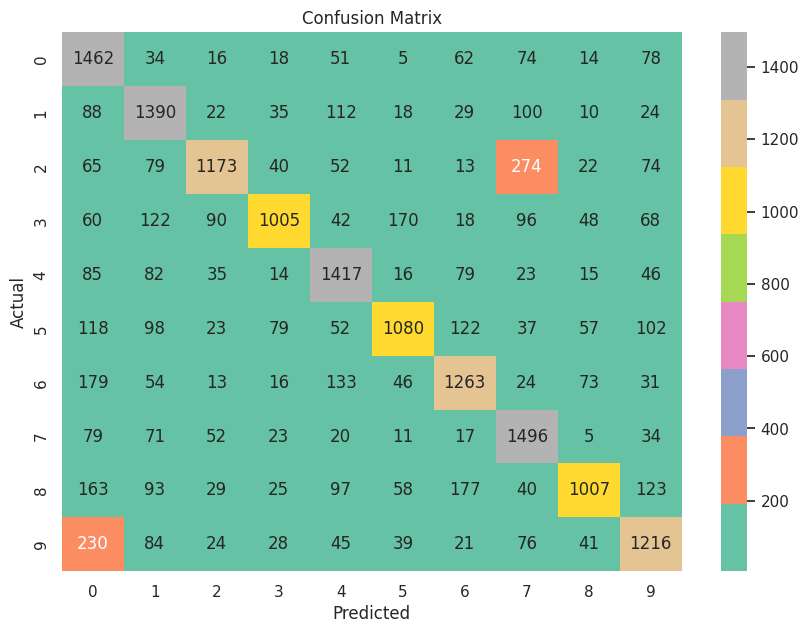

In [165]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_2,X_svhn_test,y_svhn_test )

In [167]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_2,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Misclassifications (Actual → Predicted : Count)
2 → 7 : 274
9 → 0 : 230
6 → 0 : 179
8 → 6 : 177
3 → 5 : 170
8 → 0 : 163
6 → 4 : 133
8 → 9 : 123
3 → 1 : 122
5 → 6 : 122
5 → 0 : 118
1 → 4 : 112
5 → 9 : 102
1 → 7 : 100
5 → 1 : 98
8 → 4 : 97
3 → 7 : 96
8 → 1 : 93
3 → 2 : 90
1 → 0 : 88
4 → 0 : 85
9 → 1 : 84
4 → 1 : 82
2 → 1 : 79
4 → 6 : 79
5 → 3 : 79
7 → 0 : 79
0 → 9 : 78
9 → 7 : 76
0 → 7 : 74
2 → 9 : 74
6 → 8 : 73
7 → 1 : 71
3 → 9 : 68
2 → 0 : 65
0 → 6 : 62
3 → 0 : 60
8 → 5 : 58
5 → 8 : 57
6 → 1 : 54
2 → 4 : 52
5 → 4 : 52
7 → 2 : 52
0 → 4 : 51
3 → 8 : 48
4 → 9 : 46
6 → 5 : 46
9 → 4 : 45
3 → 4 : 42
9 → 8 : 41
2 → 3 : 40
8 → 7 : 40
9 → 5 : 39
5 → 7 : 37
1 → 3 : 35
4 → 2 : 35
0 → 1 : 34
7 → 9 : 34
6 → 9 : 31
1 → 6 : 29
8 → 2 : 29
9 → 3 : 28
8 → 3 : 25
1 → 9 : 24
6 → 7 : 24
9 → 2 : 24
4 → 7 : 23
5 → 2 : 23
7 → 3 : 23
1 → 2 : 22
2 → 8 : 22
9 → 6 : 21
7 → 4 : 20
0 → 3 : 18
1 → 5 : 18
3 → 6 : 18
7 → 6 : 17
0 → 2 : 16
4 → 5 : 16
6 → 3 : 16
4 → 8 : 15
0 → 8 

[((2, 7), np.int32(274)),
 ((9, 0), np.int32(230)),
 ((6, 0), np.int32(179)),
 ((8, 6), np.int32(177)),
 ((3, 5), np.int32(170)),
 ((8, 0), np.int32(163)),
 ((6, 4), np.int32(133)),
 ((8, 9), np.int32(123)),
 ((3, 1), np.int32(122)),
 ((5, 6), np.int32(122)),
 ((5, 0), np.int32(118)),
 ((1, 4), np.int32(112)),
 ((5, 9), np.int32(102)),
 ((1, 7), np.int32(100)),
 ((5, 1), np.int32(98)),
 ((8, 4), np.int32(97)),
 ((3, 7), np.int32(96)),
 ((8, 1), np.int32(93)),
 ((3, 2), np.int32(90)),
 ((1, 0), np.int32(88)),
 ((4, 0), np.int32(85)),
 ((9, 1), np.int32(84)),
 ((4, 1), np.int32(82)),
 ((2, 1), np.int32(79)),
 ((4, 6), np.int32(79)),
 ((5, 3), np.int32(79)),
 ((7, 0), np.int32(79)),
 ((0, 9), np.int32(78)),
 ((9, 7), np.int32(76)),
 ((0, 7), np.int32(74)),
 ((2, 9), np.int32(74)),
 ((6, 8), np.int32(73)),
 ((7, 1), np.int32(71)),
 ((3, 9), np.int32(68)),
 ((2, 0), np.int32(65)),
 ((0, 6), np.int32(62)),
 ((3, 0), np.int32(60)),
 ((8, 5), np.int32(58)),
 ((5, 8), np.int32(57)),
 ((6, 1), n

There is bit improvement now no of miss classification 9 as 0 is reduced as model acuracy is now at 70%

#### Observation:
- Training accuracy (green) and validation accuracy (blue) are very close to each other, which is a good sign (no severe overfitting).
- Accuracy is improving steadily with epochs.
- Both training loss (orange) and validation loss (red) are decreasing, indicating proper learning.
- The validation loss has small fluctuations but follows the trend of the training loss, meaning the model is generalizing well.

We might have to add some smoothening effect by sgd with momentum and adam optimiser.

Model acuracy is at 70% on test data


### Model 2.1:(SGD with Momentum)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.1086 - loss: 2.3031 - val_accuracy: 0.1411 - val_loss: 2.2887
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1542 - loss: 2.2852 - val_accuracy: 0.1794 - val_loss: 2.2707
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.1951 - loss: 2.2651 - val_accuracy: 0.2206 - val_loss: 2.2393
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2387 - loss: 2.2267 - val_accuracy: 0.2812 - val_loss: 2.1735
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2968 - loss: 2.1461 - val_accuracy: 0.3466 - val_loss: 2.0307
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3569 - loss: 1.9811 - val_accuracy: 0.4108 - val_loss: 1.8168
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4230 - loss: 1.7692 - val_accuracy: 0.4632 - val_loss: 1.6413
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4829 - loss

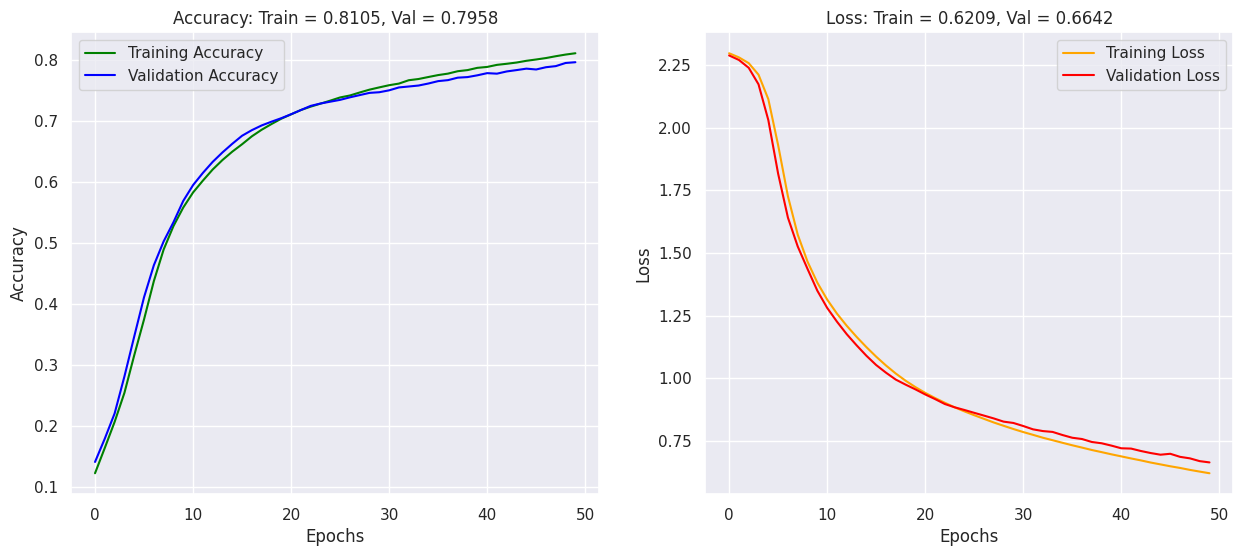

In [168]:
# Create basic model with SGD
backend.clear_session()
svhn_model_2_1 = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),  # Init  layer
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),  # second hidden layer
    Dense(64, activation='relu'),   # third hidden layer
    Dense(10, activation='softmax') # Output layer (10 classes)
])

compile_model(svhn_model_2_1,'sgd',momentum=0.66)

# fit thye model
history_svhn=svhn_model_2_1.fit(X_svhn_train, y_svhn_train,validation_data=[X_svhn_val,y_svhn_val], epochs=50)
svhn_model_2_1.test_accuracy = svhn_model_2_1.evaluate(X_svhn_val, y_svhn_val, verbose = 2)
# plot the accuracy
plot_model_accuracy(history_svhn, svhn_model_2_1)

In [169]:
# test results
test_results = svhn_model_2_1.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7791 - loss: 0.7271
[0.744592010974884, 0.7763333320617676]


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


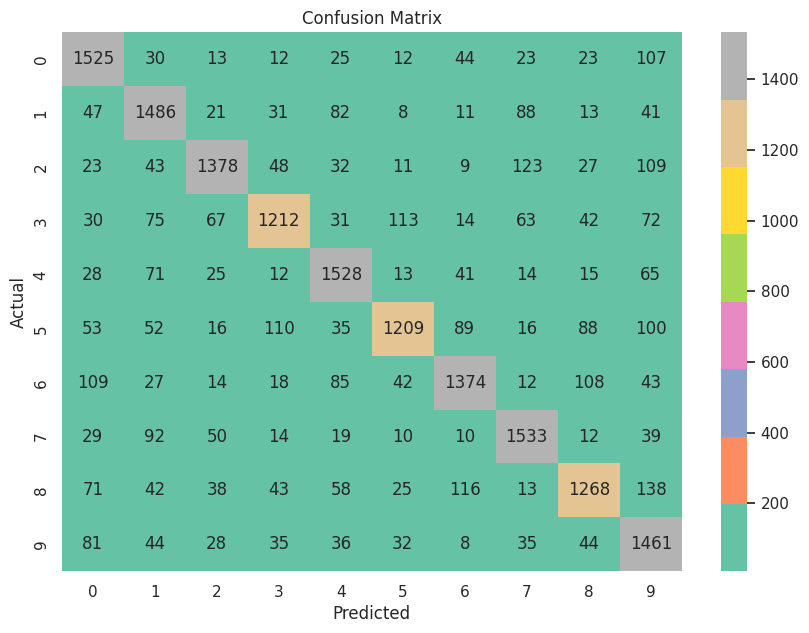

In [170]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_2_1,X_svhn_test,y_svhn_test )

In [171]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_2_1,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Misclassifications (Actual → Predicted : Count)
8 → 9 : 138
2 → 7 : 123
8 → 6 : 116
3 → 5 : 113
5 → 3 : 110
2 → 9 : 109
6 → 0 : 109
6 → 8 : 108
0 → 9 : 107
5 → 9 : 100
7 → 1 : 92
5 → 6 : 89
1 → 7 : 88
5 → 8 : 88
6 → 4 : 85
1 → 4 : 82
9 → 0 : 81
3 → 1 : 75
3 → 9 : 72
4 → 1 : 71
8 → 0 : 71
3 → 2 : 67
4 → 9 : 65
3 → 7 : 63
8 → 4 : 58
5 → 0 : 53
5 → 1 : 52
7 → 2 : 50
2 → 3 : 48
1 → 0 : 47
0 → 6 : 44
9 → 1 : 44
9 → 8 : 44
2 → 1 : 43
6 → 9 : 43
8 → 3 : 43
3 → 8 : 42
6 → 5 : 42
8 → 1 : 42
1 → 9 : 41
4 → 6 : 41
7 → 9 : 39
8 → 2 : 38
9 → 4 : 36
5 → 4 : 35
9 → 3 : 35
9 → 7 : 35
2 → 4 : 32
9 → 5 : 32
1 → 3 : 31
3 → 4 : 31
0 → 1 : 30
3 → 0 : 30
7 → 0 : 29
4 → 0 : 28
9 → 2 : 28
2 → 8 : 27
6 → 1 : 27
0 → 4 : 25
4 → 2 : 25
8 → 5 : 25
0 → 7 : 23
0 → 8 : 23
2 → 0 : 23
1 → 2 : 21
7 → 4 : 19
6 → 3 : 18
5 → 2 : 16
5 → 7 : 16
4 → 8 : 15
3 → 6 : 14
4 → 7 : 14
6 → 2 : 14
7 → 3 : 14
0 → 2 : 13
1 → 8 : 13
4 → 5 : 13
8 → 7 : 13
0 → 3 : 12
0 → 5 : 12
4 → 3 : 12
6 → 7 : 12

[((8, 9), np.int32(138)),
 ((2, 7), np.int32(123)),
 ((8, 6), np.int32(116)),
 ((3, 5), np.int32(113)),
 ((5, 3), np.int32(110)),
 ((2, 9), np.int32(109)),
 ((6, 0), np.int32(109)),
 ((6, 8), np.int32(108)),
 ((0, 9), np.int32(107)),
 ((5, 9), np.int32(100)),
 ((7, 1), np.int32(92)),
 ((5, 6), np.int32(89)),
 ((1, 7), np.int32(88)),
 ((5, 8), np.int32(88)),
 ((6, 4), np.int32(85)),
 ((1, 4), np.int32(82)),
 ((9, 0), np.int32(81)),
 ((3, 1), np.int32(75)),
 ((3, 9), np.int32(72)),
 ((4, 1), np.int32(71)),
 ((8, 0), np.int32(71)),
 ((3, 2), np.int32(67)),
 ((4, 9), np.int32(65)),
 ((3, 7), np.int32(63)),
 ((8, 4), np.int32(58)),
 ((5, 0), np.int32(53)),
 ((5, 1), np.int32(52)),
 ((7, 2), np.int32(50)),
 ((2, 3), np.int32(48)),
 ((1, 0), np.int32(47)),
 ((0, 6), np.int32(44)),
 ((9, 1), np.int32(44)),
 ((9, 8), np.int32(44)),
 ((2, 1), np.int32(43)),
 ((6, 9), np.int32(43)),
 ((8, 3), np.int32(43)),
 ((3, 8), np.int32(42)),
 ((6, 5), np.int32(42)),
 ((8, 1), np.int32(42)),
 ((1, 9), np.in

#### Observation:

- Training Accuracy Increases steadily, reaching around 0.81.
Validation Accuracy Closely follows training accuracy and stabilizes around 0.80.
- There's no  gap between training and validation accuracy so convergence is good and free from noise .
- Continues to decrease, reaching around 0.6.
- Follows training loss closely but stays slightly higher.
Observation: No drastic divergence between training and validation loss.
- Both the plots seems to be smooth without noise.

---
- We can see highest number of misclassification is 8 treated as 9.

**- Test accuracy is at .78 and loss is at .72 (Best Model Till now)**

### Model 3  (3 hidden layers) (Adam Without specfic Weight Intializer)

Continuing with 3 hidden layers as it gives better output

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1040 - loss: 2.3088 - val_accuracy: 0.1150 - val_loss: 2.3236
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1650 - loss: 2.1444 - val_accuracy: 0.3110 - val_loss: 1.8418
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3182 - loss: 1.8168 - val_accuracy: 0.3461 - val_loss: 1.7694
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3443 - loss: 1.7681 - val_accuracy: 0.3510 - val_loss: 1.7551
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.3523 - loss: 1.7509 - val_accuracy: 0.3539 - val_loss: 1.7491
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3563 - loss: 1.7406 - val_accuracy: 0.3627 - val_loss: 1.7312
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3612 - loss: 1.7301 - val_accuracy: 0.4172 - val_loss: 1.6263
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4650 - los

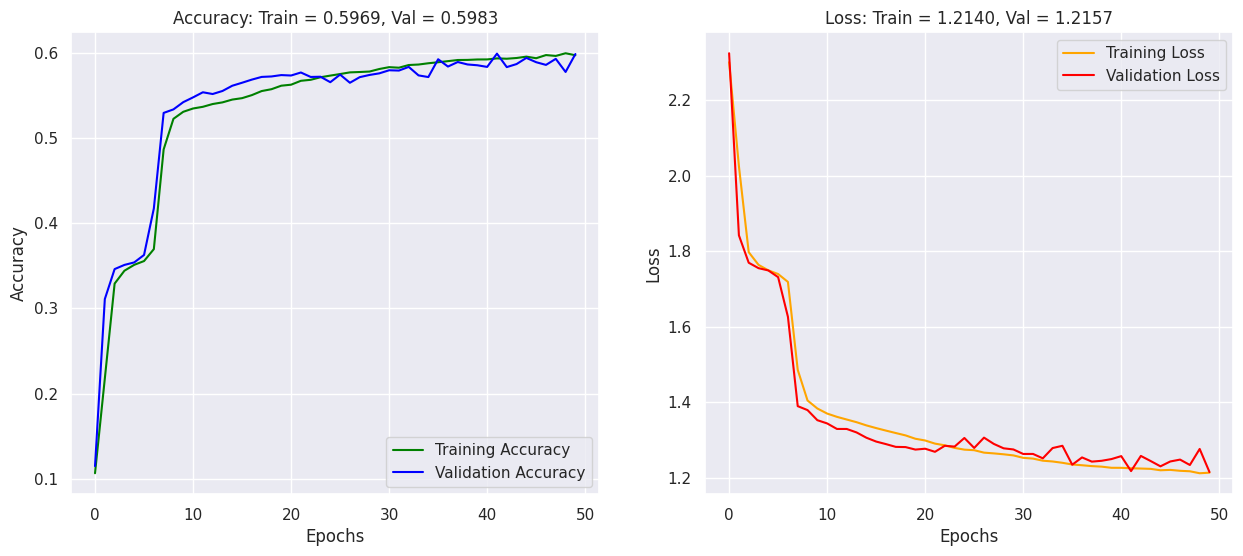

In [176]:
backend.clear_session()
svhn_model_3 = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),  # init layer
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),  # second hidden layer
    Dense(64, activation='relu'),   # third hidden layer
    Dense(10, activation='softmax') # Output layer (10 classes)
])

compile_model(svhn_model_3,'adam')

# fit thye model
history_svhn_3=svhn_model_3.fit(X_svhn_train, y_svhn_train,validation_data=[X_svhn_val,y_svhn_val], epochs=50)
svhn_model_3.test_accuracy = svhn_model_3.evaluate(X_svhn_val, y_svhn_val, verbose = 2)
# plot the accuracy
plot_model_accuracy(history_svhn_3, svhn_model_3)

#### Observations:
-  With out initializer adam optimiser performed poorly.
- There is so much noise for both loss and accuracy curve .
- This seems to be case of underfitting as training is stuck at 59% which less then other models.
-  Both acuracy and loss plot is having too much jump with sporadic repeated jumps which seems to be problem with gradient clipping and high learning rate
-  We will try to initialise the weight and may be the learning rate which is
.001 with **compile_model** function creating issue like stuck with wrong or local minima.
- We will reduce the  learning rate and use he_uniform initializer and check if we can further improve the accuracy

### Model 3.2 ( Adam  initializer with he_uniform , learning rate to .0001)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1583 - loss: 2.2476 - val_accuracy: 0.4571 - val_loss: 1.6959
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.4851 - loss: 1.5964 - val_accuracy: 0.5672 - val_loss: 1.3759
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5884 - loss: 1.3267 - val_accuracy: 0.6380 - val_loss: 1.1842
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6363 - loss: 1.1713 - val_accuracy: 0.6546 - val_loss: 1.1138
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.6603 - loss: 1.1021 - val_accuracy: 0.6846 - val_loss: 1.0429
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6874 - loss: 1.0285 - val_accuracy: 0.7009 - val_loss: 0.9885
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.6975 - loss: 0.9898 - val_accuracy: 0.7035 - val_loss: 0.9586
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.7123 -

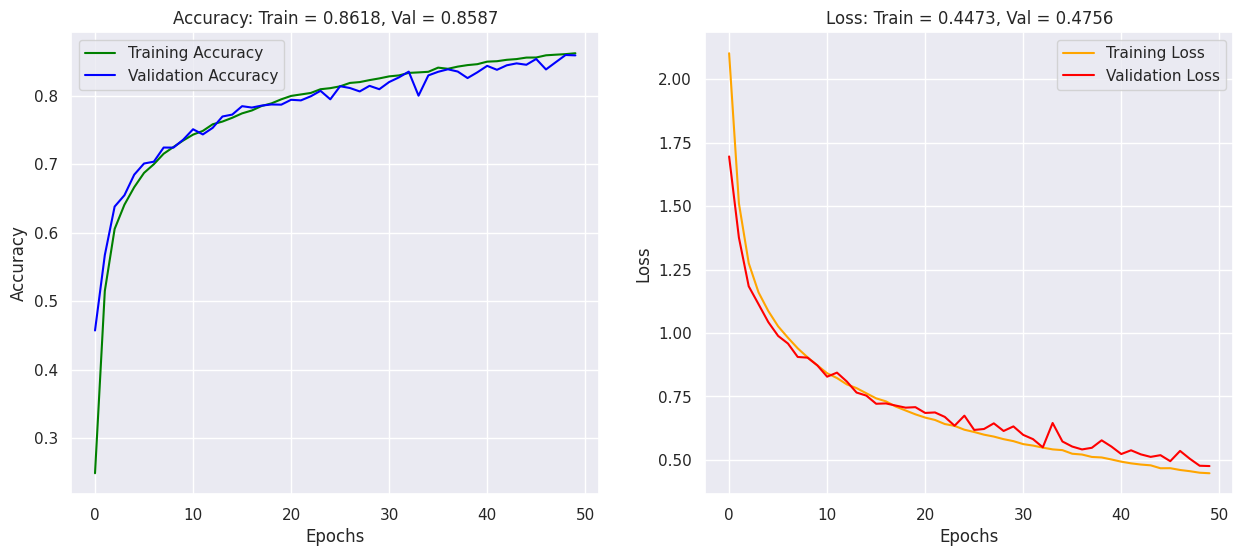

In [36]:
backend.clear_session()
# We will reduce the learning rate for better convergnec
svhn_model_3_2 = Sequential([
    Dense(256, activation='relu', input_shape=(1024,), kernel_initializer='he_uniform'),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dense(10, activation='softmax') # Output layer
])

compile_model(svhn_model_3_2, 'adam', learning_rate=0.0001)

# fit the model
history_svhn_3_2=svhn_model_3_2.fit(X_svhn_train, y_svhn_train,validation_data=[X_svhn_val,y_svhn_val], epochs=50)
svhn_model_3_2.test_accuracy = svhn_model_3_2.evaluate(X_svhn_val, y_svhn_val, verbose = 2)
# plot the accuracy
plot_model_accuracy(history_svhn_3_2, svhn_model_3_2)

In [37]:
# test accuracy

test_results = svhn_model_3_2.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8245 - loss: 0.6135
[0.6249979138374329, 0.824388861656189]


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


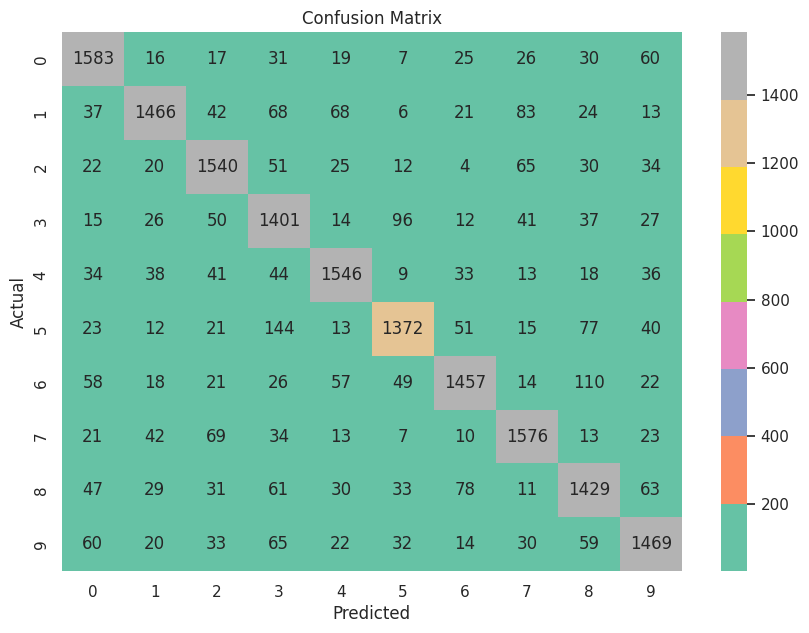

In [38]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_3_2,X_svhn_test,y_svhn_test )

In [39]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_3_2,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Misclassifications (Actual → Predicted : Count)
5 → 3 : 144
6 → 8 : 110
3 → 5 : 96
1 → 7 : 83
8 → 6 : 78
5 → 8 : 77
7 → 2 : 69
1 → 3 : 68
1 → 4 : 68
2 → 7 : 65
9 → 3 : 65
8 → 9 : 63
8 → 3 : 61
0 → 9 : 60
9 → 0 : 60
9 → 8 : 59
6 → 0 : 58
6 → 4 : 57
2 → 3 : 51
5 → 6 : 51
3 → 2 : 50
6 → 5 : 49
8 → 0 : 47
4 → 3 : 44
1 → 2 : 42
7 → 1 : 42
3 → 7 : 41
4 → 2 : 41
5 → 9 : 40
4 → 1 : 38
1 → 0 : 37
3 → 8 : 37
4 → 9 : 36
2 → 9 : 34
4 → 0 : 34
7 → 3 : 34
4 → 6 : 33
8 → 5 : 33
9 → 2 : 33
9 → 5 : 32
0 → 3 : 31
8 → 2 : 31
0 → 8 : 30
2 → 8 : 30
8 → 4 : 30
9 → 7 : 30
8 → 1 : 29
3 → 9 : 27
0 → 7 : 26
3 → 1 : 26
6 → 3 : 26
0 → 6 : 25
2 → 4 : 25
1 → 8 : 24
5 → 0 : 23
7 → 9 : 23
2 → 0 : 22
6 → 9 : 22
9 → 4 : 22
1 → 6 : 21
5 → 2 : 21
6 → 2 : 21
7 → 0 : 21
2 → 1 : 20
9 → 1 : 20
0 → 4 : 19
4 → 8 : 18
6 → 1 : 18
0 → 2 : 17
0 → 1 : 16
3 → 0 : 15
5 → 7 : 15
3 → 4 : 14
6 → 7 : 14
9 → 6 : 14
1 → 9 : 13
4 → 7 : 13
5 → 4 : 13
7 → 4 : 13
7 → 8 : 13
2 → 5 : 12
3 → 6 : 12
5 → 1 :

[((5, 3), np.int32(144)),
 ((6, 8), np.int32(110)),
 ((3, 5), np.int32(96)),
 ((1, 7), np.int32(83)),
 ((8, 6), np.int32(78)),
 ((5, 8), np.int32(77)),
 ((7, 2), np.int32(69)),
 ((1, 3), np.int32(68)),
 ((1, 4), np.int32(68)),
 ((2, 7), np.int32(65)),
 ((9, 3), np.int32(65)),
 ((8, 9), np.int32(63)),
 ((8, 3), np.int32(61)),
 ((0, 9), np.int32(60)),
 ((9, 0), np.int32(60)),
 ((9, 8), np.int32(59)),
 ((6, 0), np.int32(58)),
 ((6, 4), np.int32(57)),
 ((2, 3), np.int32(51)),
 ((5, 6), np.int32(51)),
 ((3, 2), np.int32(50)),
 ((6, 5), np.int32(49)),
 ((8, 0), np.int32(47)),
 ((4, 3), np.int32(44)),
 ((1, 2), np.int32(42)),
 ((7, 1), np.int32(42)),
 ((3, 7), np.int32(41)),
 ((4, 2), np.int32(41)),
 ((5, 9), np.int32(40)),
 ((4, 1), np.int32(38)),
 ((1, 0), np.int32(37)),
 ((3, 8), np.int32(37)),
 ((4, 9), np.int32(36)),
 ((2, 9), np.int32(34)),
 ((4, 0), np.int32(34)),
 ((7, 3), np.int32(34)),
 ((4, 6), np.int32(33)),
 ((8, 5), np.int32(33)),
 ((9, 2), np.int32(33)),
 ((9, 5), np.int32(32))

#### Observations:
- Validation accuracy at 86% and loss at .47
-  Though the training accurcay is bit better then validation but this is the best model so far
-  Convergnce of training (Loss+accuracy)looks better then others as well .


---
-  Highest mis classfication is 5 preducted as 3 for 144 times

- This is best model so far with test accuracy of 83%

### Model 3.3: (With batch)

In [33]:
# start with 64 as 32 seems to be default selected by keras
batch_sizes = [64, 128,256]
results = train_with_different_batches(
    lambda: Sequential([
        Dense(256, activation='relu', input_shape=(1024,), kernel_initializer='he_uniform'),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        Dense(64, activation='relu', kernel_initializer='he_uniform'),
        Dense(64, activation='relu', kernel_initializer='he_uniform'),
        Dense(10, activation='softmax')
    ]),
    X_svhn_train, y_svhn_train, X_svhn_val, y_svhn_val,
    batch_sizes
)

# Find the best batch size
best_batch_size = max(results, key=results.get)
print(f"\nBest batch size: {best_batch_size} with accuracy {results[best_batch_size]:.4f}")


Training with batch size: 64
Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.1548 - loss: 2.2603 - val_accuracy: 0.3530 - val_loss: 1.9285
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4126 - loss: 1.7920 - val_accuracy: 0.5347 - val_loss: 1.5042
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5367 - loss: 1.4661 - val_accuracy: 0.5674 - val_loss: 1.3664
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5992 - loss: 1.2997 - val_accuracy: 0.6280 - val_loss: 1.2172
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6312 - loss: 1.1944 - val_accuracy: 0.6545 - val_loss: 1.1320
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6531 - loss: 1.1278 - val_accuracy: 0.6641 - val_loss: 1.0948
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6653 - loss: 1.0964 - val_accuracy: 0.6663 - val_loss: 1.0731
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy:

#### Observations:
 - Best perfomance  seems to be with **adam and 64 batch size and hu_uniform *** initializer

### Model 3.3 (64 as batch size optimiser=adam ,lr=.0001 and initializer='he_uniform'

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1603 - loss: 2.2561 - val_accuracy: 0.4272 - val_loss: 1.7590
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4775 - loss: 1.6204 - val_accuracy: 0.5855 - val_loss: 1.3367
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5930 - loss: 1.3083 - val_accuracy: 0.6184 - val_loss: 1.2232
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6353 - loss: 1.1905 - val_accuracy: 0.6453 - val_loss: 1.1488
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6569 - loss: 1.1046 - val_accuracy: 0.6711 - val_loss: 1.0709
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6767 - loss: 1.0593 - val_accuracy: 0.6864 - val_loss: 1.0176
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6918 - loss: 1.0028 - val_accuracy: 0.6968 - val_loss: 0.9855
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7046 -

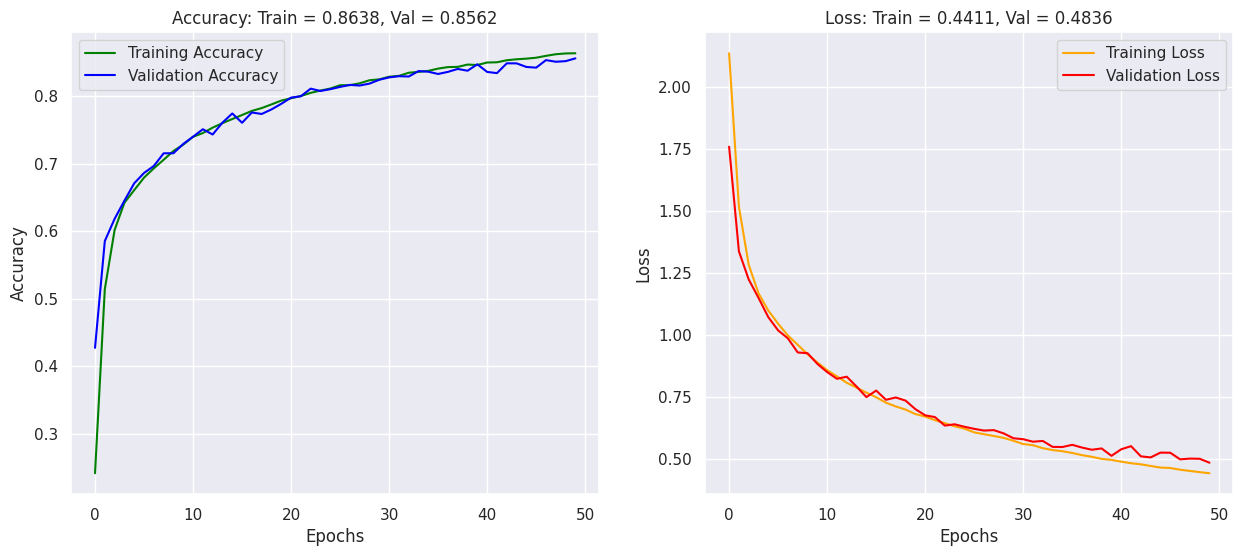

In [35]:
backend.clear_session()
# We will reduce the learning rate for better convergnec
svhn_model_3_3 = Sequential([
    Dense(256, activation='relu', input_shape=(1024,), kernel_initializer='he_uniform'),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dense(10, activation='softmax') # Output layer
])

compile_model(svhn_model_3_3, 'adam', learning_rate=0.0001)

# fit the model
history_svhn_3_3=svhn_model_3_3.fit(X_svhn_train, y_svhn_train,validation_data=[X_svhn_val,y_svhn_val], epochs=50)
svhn_model_3_3.test_accuracy = svhn_model_3_3.evaluate(X_svhn_val, y_svhn_val, verbose = 2)
# plot the accuracy
plot_model_accuracy(history_svhn_3_3, svhn_model_3_3)

In [40]:
# test accuracy
test_results = svhn_model_3_3.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8212 - loss: 0.6170
[0.6344834566116333, 0.820555567741394]


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


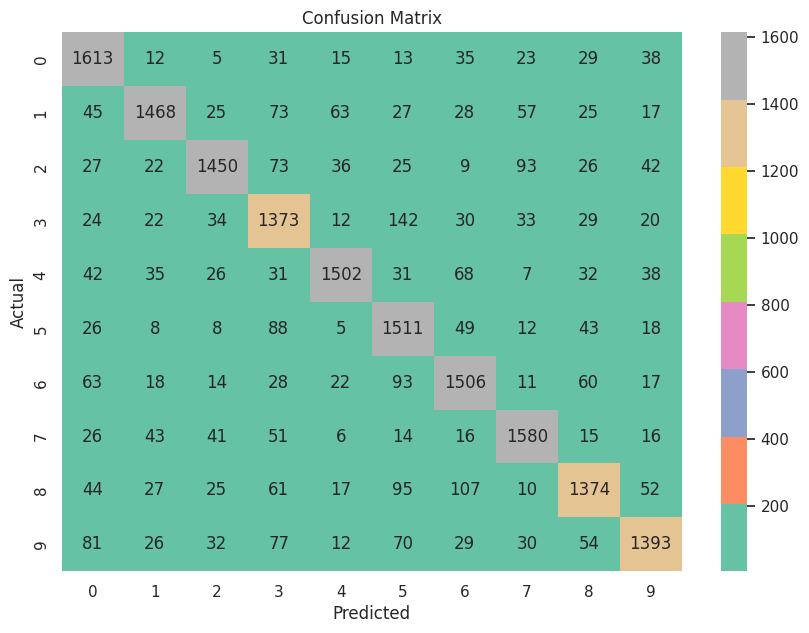

In [41]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_3_3,X_svhn_test,y_svhn_test )

In [42]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_3_3,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Misclassifications (Actual → Predicted : Count)
3 → 5 : 142
8 → 6 : 107
8 → 5 : 95
2 → 7 : 93
6 → 5 : 93
5 → 3 : 88
9 → 0 : 81
9 → 3 : 77
1 → 3 : 73
2 → 3 : 73
9 → 5 : 70
4 → 6 : 68
1 → 4 : 63
6 → 0 : 63
8 → 3 : 61
6 → 8 : 60
1 → 7 : 57
9 → 8 : 54
8 → 9 : 52
7 → 3 : 51
5 → 6 : 49
1 → 0 : 45
8 → 0 : 44
5 → 8 : 43
7 → 1 : 43
2 → 9 : 42
4 → 0 : 42
7 → 2 : 41
0 → 9 : 38
4 → 9 : 38
2 → 4 : 36
0 → 6 : 35
4 → 1 : 35
3 → 2 : 34
3 → 7 : 33
4 → 8 : 32
9 → 2 : 32
0 → 3 : 31
4 → 3 : 31
4 → 5 : 31
3 → 6 : 30
9 → 7 : 30
0 → 8 : 29
3 → 8 : 29
9 → 6 : 29
1 → 6 : 28
6 → 3 : 28
1 → 5 : 27
2 → 0 : 27
8 → 1 : 27
2 → 8 : 26
4 → 2 : 26
5 → 0 : 26
7 → 0 : 26
9 → 1 : 26
1 → 2 : 25
1 → 8 : 25
2 → 5 : 25
8 → 2 : 25
3 → 0 : 24
0 → 7 : 23
2 → 1 : 22
3 → 1 : 22
6 → 4 : 22
3 → 9 : 20
5 → 9 : 18
6 → 1 : 18
1 → 9 : 17
6 → 9 : 17
8 → 4 : 17
7 → 6 : 16
7 → 9 : 16
0 → 4 : 15
7 → 8 : 15
6 → 2 : 14
7 → 5 : 14
0 → 5 : 13
0 → 1 : 12
3 → 4 : 12
5 → 7 : 12
9 → 4 : 12
6 → 7 : 11
8 → 7 :

[((3, 5), np.int32(142)),
 ((8, 6), np.int32(107)),
 ((8, 5), np.int32(95)),
 ((2, 7), np.int32(93)),
 ((6, 5), np.int32(93)),
 ((5, 3), np.int32(88)),
 ((9, 0), np.int32(81)),
 ((9, 3), np.int32(77)),
 ((1, 3), np.int32(73)),
 ((2, 3), np.int32(73)),
 ((9, 5), np.int32(70)),
 ((4, 6), np.int32(68)),
 ((1, 4), np.int32(63)),
 ((6, 0), np.int32(63)),
 ((8, 3), np.int32(61)),
 ((6, 8), np.int32(60)),
 ((1, 7), np.int32(57)),
 ((9, 8), np.int32(54)),
 ((8, 9), np.int32(52)),
 ((7, 3), np.int32(51)),
 ((5, 6), np.int32(49)),
 ((1, 0), np.int32(45)),
 ((8, 0), np.int32(44)),
 ((5, 8), np.int32(43)),
 ((7, 1), np.int32(43)),
 ((2, 9), np.int32(42)),
 ((4, 0), np.int32(42)),
 ((7, 2), np.int32(41)),
 ((0, 9), np.int32(38)),
 ((4, 9), np.int32(38)),
 ((2, 4), np.int32(36)),
 ((0, 6), np.int32(35)),
 ((4, 1), np.int32(35)),
 ((3, 2), np.int32(34)),
 ((3, 7), np.int32(33)),
 ((4, 8), np.int32(32)),
 ((9, 2), np.int32(32)),
 ((0, 3), np.int32(31)),
 ((4, 3), np.int32(31)),
 ((4, 5), np.int32(31))

#### Observations:
-  Model accuracy is at 86% which is best till now
- The convergence of both accuracy and loss are quite good
- The curves of both loss and accuracy is smoothened
---
- This model almost similar to **Model 3.2**



### Model 4: (With Drop Out)

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.1029 - loss: 2.3385 - val_accuracy: 0.1529 - val_loss: 2.2686
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.1540 - loss: 2.2560 - val_accuracy: 0.2814 - val_loss: 2.0351
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.2521 - loss: 2.0415 - val_accuracy: 0.4257 - val_loss: 1.7632
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3416 - loss: 1.8301 - val_accuracy: 0.5056 - val_loss: 1.5352
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4247 - loss: 1.6441 - val_accuracy: 0.5595 - val_loss: 1.3958
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4759 - loss: 1.5396 - val_accuracy: 0.5929 - val_loss: 1.2988
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5092 - loss: 1.4544 - val_accuracy: 0.6180 - val_loss: 1.2222
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5282 - loss: 1.3930 - 

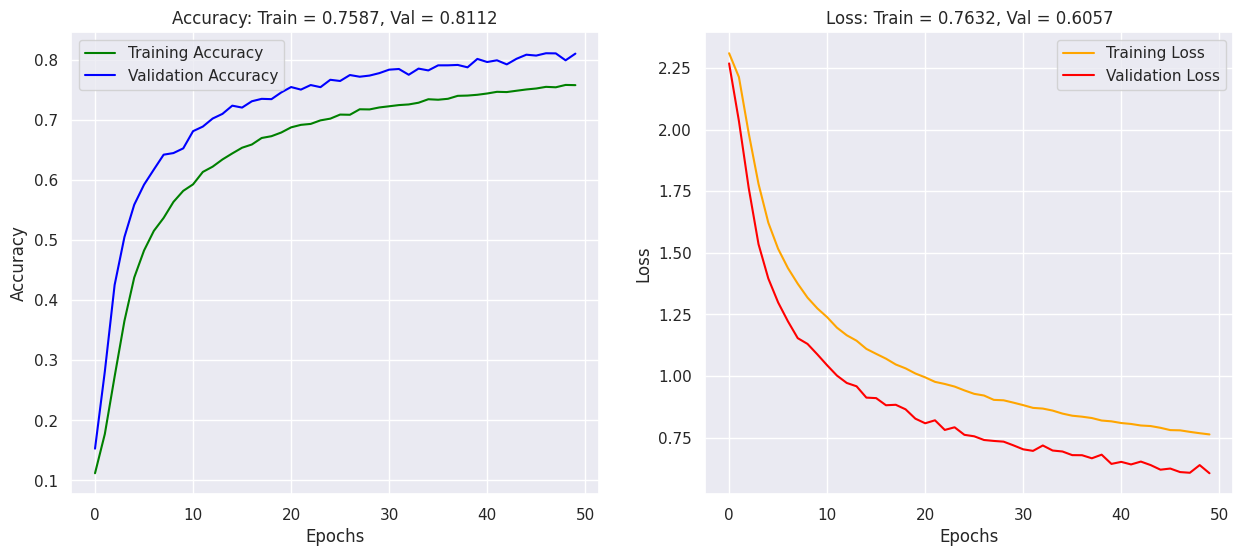

In [43]:
backend.clear_session()

# Define the model with dropout layers
svhn_model_4 = Sequential([
    Dense(256, activation='relu', input_shape=(1024,), kernel_initializer='he_uniform'),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
compile_model(svhn_model_4, 'adam', learning_rate=0.0001)

# Fit the model
history_svhn_4 = svhn_model_4.fit(
    X_svhn_train, y_svhn_train,
    validation_data=(X_svhn_val, y_svhn_val),
    epochs=50,
    batch_size=64  # Added batch size
)

# Evaluate the model
svhn_model_4.test_accuracy = svhn_model_4.evaluate(X_svhn_val, y_svhn_val, verbose=2)

# Plot the accuracy
plot_model_accuracy(history_svhn_4, svhn_model_4)

In [44]:
# test accuracy
test_results = svhn_model_4.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8006 - loss: 0.6508
[0.6641659736633301, 0.7957777976989746]


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


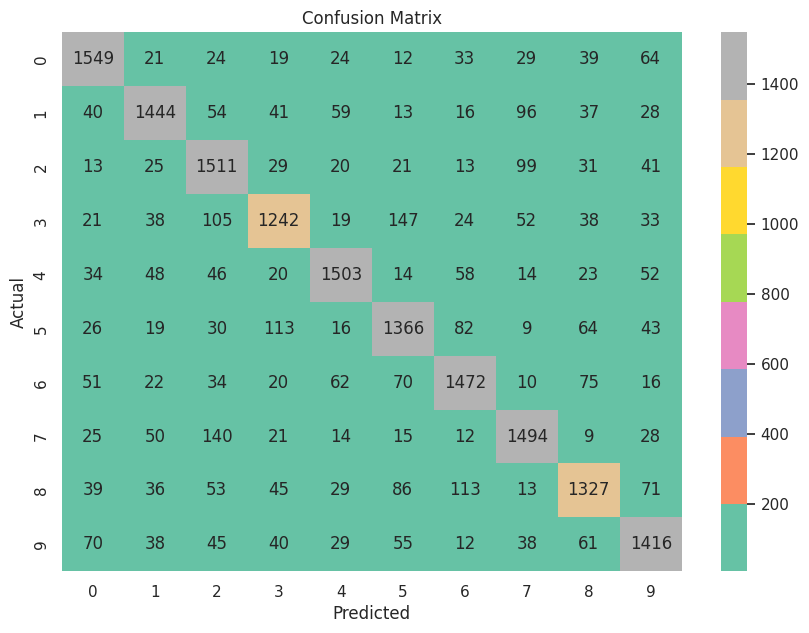

In [45]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_4,X_svhn_test,y_svhn_test )

In [46]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_4,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Misclassifications (Actual → Predicted : Count)
3 → 5 : 147
7 → 2 : 140
5 → 3 : 113
8 → 6 : 113
3 → 2 : 105
2 → 7 : 99
1 → 7 : 96
8 → 5 : 86
5 → 6 : 82
6 → 8 : 75
8 → 9 : 71
6 → 5 : 70
9 → 0 : 70
0 → 9 : 64
5 → 8 : 64
6 → 4 : 62
9 → 8 : 61
1 → 4 : 59
4 → 6 : 58
9 → 5 : 55
1 → 2 : 54
8 → 2 : 53
3 → 7 : 52
4 → 9 : 52
6 → 0 : 51
7 → 1 : 50
4 → 1 : 48
4 → 2 : 46
8 → 3 : 45
9 → 2 : 45
5 → 9 : 43
1 → 3 : 41
2 → 9 : 41
1 → 0 : 40
9 → 3 : 40
0 → 8 : 39
8 → 0 : 39
3 → 1 : 38
3 → 8 : 38
9 → 1 : 38
9 → 7 : 38
1 → 8 : 37
8 → 1 : 36
4 → 0 : 34
6 → 2 : 34
0 → 6 : 33
3 → 9 : 33
2 → 8 : 31
5 → 2 : 30
0 → 7 : 29
2 → 3 : 29
8 → 4 : 29
9 → 4 : 29
1 → 9 : 28
7 → 9 : 28
5 → 0 : 26
2 → 1 : 25
7 → 0 : 25
0 → 2 : 24
0 → 4 : 24
3 → 6 : 24
4 → 8 : 23
6 → 1 : 22
0 → 1 : 21
2 → 5 : 21
3 → 0 : 21
7 → 3 : 21
2 → 4 : 20
4 → 3 : 20
6 → 3 : 20
0 → 3 : 19
3 → 4 : 19
5 → 1 : 19
1 → 6 : 16
5 → 4 : 16
6 → 9 : 16
7 → 5 : 15
4 → 5 : 14
4 → 7 : 14
7 → 4 : 14
1 → 5 : 13
2 → 0 : 13
2 → 

[((3, 5), np.int32(147)),
 ((7, 2), np.int32(140)),
 ((5, 3), np.int32(113)),
 ((8, 6), np.int32(113)),
 ((3, 2), np.int32(105)),
 ((2, 7), np.int32(99)),
 ((1, 7), np.int32(96)),
 ((8, 5), np.int32(86)),
 ((5, 6), np.int32(82)),
 ((6, 8), np.int32(75)),
 ((8, 9), np.int32(71)),
 ((6, 5), np.int32(70)),
 ((9, 0), np.int32(70)),
 ((0, 9), np.int32(64)),
 ((5, 8), np.int32(64)),
 ((6, 4), np.int32(62)),
 ((9, 8), np.int32(61)),
 ((1, 4), np.int32(59)),
 ((4, 6), np.int32(58)),
 ((9, 5), np.int32(55)),
 ((1, 2), np.int32(54)),
 ((8, 2), np.int32(53)),
 ((3, 7), np.int32(52)),
 ((4, 9), np.int32(52)),
 ((6, 0), np.int32(51)),
 ((7, 1), np.int32(50)),
 ((4, 1), np.int32(48)),
 ((4, 2), np.int32(46)),
 ((8, 3), np.int32(45)),
 ((9, 2), np.int32(45)),
 ((5, 9), np.int32(43)),
 ((1, 3), np.int32(41)),
 ((2, 9), np.int32(41)),
 ((1, 0), np.int32(40)),
 ((9, 3), np.int32(40)),
 ((0, 8), np.int32(39)),
 ((8, 0), np.int32(39)),
 ((3, 1), np.int32(38)),
 ((3, 8), np.int32(38)),
 ((9, 1), np.int32(3

#### Observation:
-  With drop out performance seems to went down a bit .Noy much improvement on previous models.
- Though this model is not bad with Validation accuracy around 81% and test accuracy is at 80%
- Highest no of micalssification is 3 predicted as 5 147 times.

### Model 5 Batch Normalization

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.2149 - loss: 2.3292 - val_accuracy: 0.4418 - val_loss: 1.6732
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5288 - loss: 1.4595 - val_accuracy: 0.6014 - val_loss: 1.2617
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6275 - loss: 1.1983 - val_accuracy: 0.6275 - val_loss: 1.1675
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.6736 - loss: 1.0612 - val_accuracy: 0.6586 - val_loss: 1.0871
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.6959 - loss: 0.9828 - val_accuracy: 0.6892 - val_loss: 0.9960
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.7167 - loss: 0.9145 - val_accuracy: 0.6942 - val_loss: 0.9678
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7287 - loss: 0.8720 - val_accuracy: 0.7068 - val_loss: 0.9356
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.7457 - loss: 0.8153 - 

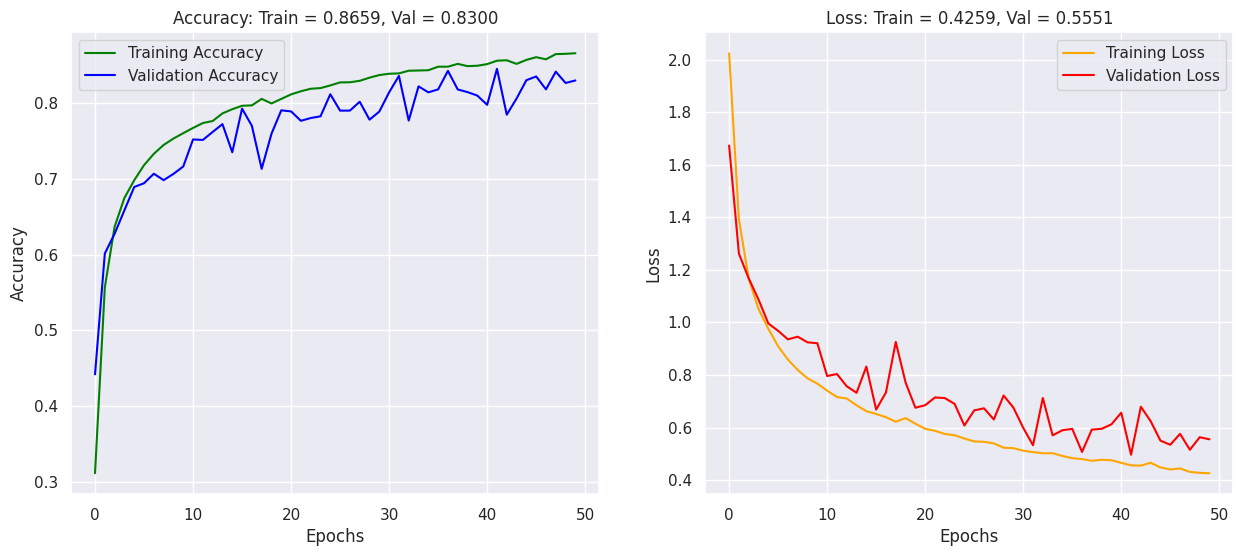

In [47]:
backend.clear_session()

# Define the model with batch normalization layers
svhn_model_5 = Sequential([
    Dense(256, activation='relu', input_shape=(1024,), kernel_initializer='he_uniform'),
    BatchNormalization(),  # Batch normalization for stable training
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
compile_model(svhn_model_5, 'adam', learning_rate=0.0001)

# Fit the model
history_svhn_5 = svhn_model_5.fit(
    X_svhn_train, y_svhn_train,
    validation_data=(X_svhn_val, y_svhn_val),
    epochs=50,
    batch_size=64  # Using batch size 64
)

# Evaluate the model
svhn_model_5.test_accuracy = svhn_model_5.evaluate(X_svhn_val, y_svhn_val, verbose=2)

# Plot the accuracy
plot_model_accuracy(history_svhn_5, svhn_model_5)


In [48]:
# test accuracy
test_results = svhn_model_5.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7938 - loss: 0.7047
[0.7064011693000793, 0.7919444441795349]


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


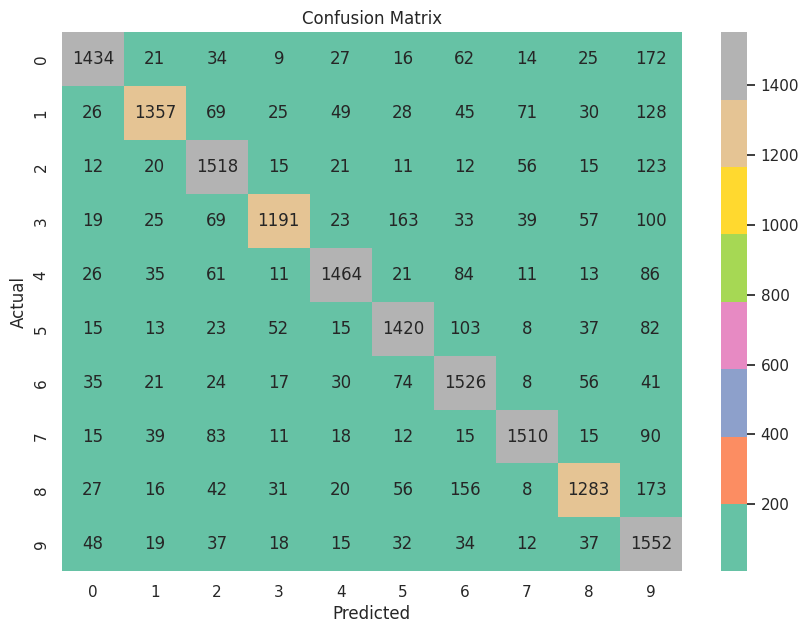

In [49]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_5,X_svhn_test,y_svhn_test )

In [50]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_5,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Misclassifications (Actual → Predicted : Count)
8 → 9 : 173
0 → 9 : 172
3 → 5 : 163
8 → 6 : 156
1 → 9 : 128
2 → 9 : 123
5 → 6 : 103
3 → 9 : 100
7 → 9 : 90
4 → 9 : 86
4 → 6 : 84
7 → 2 : 83
5 → 9 : 82
6 → 5 : 74
1 → 7 : 71
1 → 2 : 69
3 → 2 : 69
0 → 6 : 62
4 → 2 : 61
3 → 8 : 57
2 → 7 : 56
6 → 8 : 56
8 → 5 : 56
5 → 3 : 52
1 → 4 : 49
9 → 0 : 48
1 → 6 : 45
8 → 2 : 42
6 → 9 : 41
3 → 7 : 39
7 → 1 : 39
5 → 8 : 37
9 → 2 : 37
9 → 8 : 37
4 → 1 : 35
6 → 0 : 35
0 → 2 : 34
9 → 6 : 34
3 → 6 : 33
9 → 5 : 32
8 → 3 : 31
1 → 8 : 30
6 → 4 : 30
1 → 5 : 28
0 → 4 : 27
8 → 0 : 27
1 → 0 : 26
4 → 0 : 26
0 → 8 : 25
1 → 3 : 25
3 → 1 : 25
6 → 2 : 24
3 → 4 : 23
5 → 2 : 23
0 → 1 : 21
2 → 4 : 21
4 → 5 : 21
6 → 1 : 21
2 → 1 : 20
8 → 4 : 20
3 → 0 : 19
9 → 1 : 19
7 → 4 : 18
9 → 3 : 18
6 → 3 : 17
0 → 5 : 16
8 → 1 : 16
2 → 3 : 15
2 → 8 : 15
5 → 0 : 15
5 → 4 : 15
7 → 0 : 15
7 → 6 : 15
7 → 8 : 15
9 → 4 : 15
0 → 7 : 14
4 → 8 : 13
5 → 1 : 13
2 → 0 : 12
2 → 6 : 12
7 → 5 : 12
9 → 7 : 12
2

[((8, 9), np.int32(173)),
 ((0, 9), np.int32(172)),
 ((3, 5), np.int32(163)),
 ((8, 6), np.int32(156)),
 ((1, 9), np.int32(128)),
 ((2, 9), np.int32(123)),
 ((5, 6), np.int32(103)),
 ((3, 9), np.int32(100)),
 ((7, 9), np.int32(90)),
 ((4, 9), np.int32(86)),
 ((4, 6), np.int32(84)),
 ((7, 2), np.int32(83)),
 ((5, 9), np.int32(82)),
 ((6, 5), np.int32(74)),
 ((1, 7), np.int32(71)),
 ((1, 2), np.int32(69)),
 ((3, 2), np.int32(69)),
 ((0, 6), np.int32(62)),
 ((4, 2), np.int32(61)),
 ((3, 8), np.int32(57)),
 ((2, 7), np.int32(56)),
 ((6, 8), np.int32(56)),
 ((8, 5), np.int32(56)),
 ((5, 3), np.int32(52)),
 ((1, 4), np.int32(49)),
 ((9, 0), np.int32(48)),
 ((1, 6), np.int32(45)),
 ((8, 2), np.int32(42)),
 ((6, 9), np.int32(41)),
 ((3, 7), np.int32(39)),
 ((7, 1), np.int32(39)),
 ((5, 8), np.int32(37)),
 ((9, 2), np.int32(37)),
 ((9, 8), np.int32(37)),
 ((4, 1), np.int32(35)),
 ((6, 0), np.int32(35)),
 ((0, 2), np.int32(34)),
 ((9, 6), np.int32(34)),
 ((3, 6), np.int32(33)),
 ((9, 5), np.int3

#### Observation:
- Accuracy curve does not have smoothening and we can see there are some noises
- validation accurcat is at 83% and Test accuracy is at 70%
- The model is not better then drop out model.

### Model 6:(checkpoint And Early Stopping)

Epoch 1/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1021 - loss: 2.3340
Epoch 1: val_accuracy improved from -inf to 0.15408, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1021 - loss: 2.3340 - val_accuracy: 0.1541 - val_loss: 2.2915
Epoch 2/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1283 - loss: 2.2893
Epoch 2: val_accuracy improved from 0.15408 to 0.21567, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.1284 - loss: 2.2892 - val_accuracy: 0.2157 - val_loss: 2.1755
Epoch 3/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1967 - loss: 2.1672
Epoch 3: val_accuracy improved from 0.21567 to 0.37348, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1968 - loss: 2.1670 - val_accuracy: 0.3735 - val_loss: 1.8848
Epoch 4/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2900 - loss: 1.9449
Epoch 4: val_accuracy improved from 0.37348 to 0.47217, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2901 - loss: 1.9446 - val_accuracy: 0.4722 - val_loss: 1.6699
Epoch 5/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3664 - loss: 1.7764
Epoch 5: val_accuracy improved from 0.47217 to 0.51627, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3665 - loss: 1.7764 - val_accuracy: 0.5163 - val_loss: 1.5000
Epoch 6/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4227 - loss: 1.6464
Epoch 6: val_accuracy improved from 0.51627 to 0.56690, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.4228 - loss: 1.6462 - val_accuracy: 0.5669 - val_loss: 1.3699
Epoch 7/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4613 - loss: 1.5590
Epoch 7: val_accuracy improved from 0.56690 to 0.59377, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4613 - loss: 1.5590 - val_accuracy: 0.5938 - val_loss: 1.2899
Epoch 8/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4879 - loss: 1.4967
Epoch 8: val_accuracy did not improve from 0.59377
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4880 - loss: 1.4966 - val_accuracy: 0.5931 - val_loss: 1.2537
Epoch 9/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5154 - loss: 1.4286
Epoch 9: val_accuracy improved from 0.59377 to 0.62145, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5155 - loss: 1.4284 - val_accuracy: 0.6215 - val_loss: 1.1997
Epoch 10/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5353 - loss: 1.3876
Epoch 10: val_accuracy improved from 0.62145 to 0.64675, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5354 - loss: 1.3875 - val_accuracy: 0.6467 - val_loss: 1.1450
Epoch 11/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5552 - loss: 1.3384
Epoch 11: val_accuracy improved from 0.64675 to 0.65750, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5553 - loss: 1.3383 - val_accuracy: 0.6575 - val_loss: 1.1017
Epoch 12/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5738 - loss: 1.2892
Epoch 12: val_accuracy improved from 0.65750 to 0.66717, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.5738 - loss: 1.2892 - val_accuracy: 0.6672 - val_loss: 1.0703
Epoch 13/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5891 - loss: 1.2528
Epoch 13: val_accuracy improved from 0.66717 to 0.67538, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5891 - loss: 1.2528 - val_accuracy: 0.6754 - val_loss: 1.0491
Epoch 14/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5960 - loss: 1.2373
Epoch 14: val_accuracy improved from 0.67538 to 0.69652, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5960 - loss: 1.2372 - val_accuracy: 0.6965 - val_loss: 0.9904
Epoch 15/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6183 - loss: 1.1856
Epoch 15: val_accuracy improved from 0.69652 to 0.70410, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6183 - loss: 1.1857 - val_accuracy: 0.7041 - val_loss: 0.9677
Epoch 16/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6199 - loss: 1.1761
Epoch 16: val_accuracy improved from 0.70410 to 0.70873, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6199 - loss: 1.1761 - val_accuracy: 0.7087 - val_loss: 0.9559
Epoch 17/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6342 - loss: 1.1480
Epoch 17: val_accuracy improved from 0.70873 to 0.71532, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6342 - loss: 1.1480 - val_accuracy: 0.7153 - val_loss: 0.9391
Epoch 18/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6452 - loss: 1.1176
Epoch 18: val_accuracy improved from 0.71532 to 0.72038, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6452 - loss: 1.1176 - val_accuracy: 0.7204 - val_loss: 0.9165
Epoch 19/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6546 - loss: 1.0937
Epoch 19: val_accuracy improved from 0.72038 to 0.72828, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6546 - loss: 1.0937 - val_accuracy: 0.7283 - val_loss: 0.8882
Epoch 20/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6627 - loss: 1.0694
Epoch 20: val_accuracy improved from 0.72828 to 0.73542, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6627 - loss: 1.0694 - val_accuracy: 0.7354 - val_loss: 0.8693
Epoch 21/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6625 - loss: 1.0694
Epoch 21: val_accuracy improved from 0.73542 to 0.74142, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.6625 - loss: 1.0694 - val_accuracy: 0.7414 - val_loss: 0.8553
Epoch 22/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6731 - loss: 1.0489
Epoch 22: val_accuracy did not improve from 0.74142
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.6731 - loss: 1.0488 - val_accuracy: 0.7407 - val_loss: 0.8423
Epoch 23/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6777 - loss: 1.0249
Epoch 23: val_accuracy improved from 0.74142 to 0.74540, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6777 - loss: 1.0249 - val_accuracy: 0.7454 - val_loss: 0.8338
Epoch 24/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6716 - loss: 1.0299
Epoch 24: val_accuracy improved from 0.74540 to 0.74725, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.6717 - loss: 1.0298 - val_accuracy: 0.7473 - val_loss: 0.8167
Epoch 25/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6846 - loss: 1.0095
Epoch 25: val_accuracy improved from 0.74725 to 0.75885, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6846 - loss: 1.0094 - val_accuracy: 0.7588 - val_loss: 0.7883
Epoch 26/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6922 - loss: 0.9798
Epoch 26: val_accuracy did not improve from 0.75885
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6922 - loss: 0.9798 - val_accuracy: 0.7531 - val_loss: 0.8043
Epoch 27/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6963 - loss: 0.9700
Epoch 27: val_accuracy improved from 0.75885 to 0.76682, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6963 - loss: 0.9700 - val_accuracy: 0.7668 - val_loss: 0.7707
Epoch 28/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7039 - loss: 0.9529
Epoch 28: val_accuracy improved from 0.76682 to 0.76807, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.7039 - loss: 0.9529 - val_accuracy: 0.7681 - val_loss: 0.7562
Epoch 29/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7020 - loss: 0.9583
Epoch 29: val_accuracy did not improve from 0.76807
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7020 - loss: 0.9583 - val_accuracy: 0.7640 - val_loss: 0.7667
Epoch 30/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7021 - loss: 0.9519
Epoch 30: val_accuracy improved from 0.76807 to 0.77273, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7021 - loss: 0.9518 - val_accuracy: 0.7727 - val_loss: 0.7366
Epoch 31/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7112 - loss: 0.9313
Epoch 31: val_accuracy improved from 0.77273 to 0.77662, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7112 - loss: 0.9314 - val_accuracy: 0.7766 - val_loss: 0.7318
Epoch 32/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7103 - loss: 0.9279
Epoch 32: val_accuracy did not improve from 0.77662
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7103 - loss: 0.9279 - val_accuracy: 0.7744 - val_loss: 0.7368
Epoch 33/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7152 - loss: 0.9147
Epoch 33: val_accuracy improved from 0.77662 to 0.77812, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7152 - loss: 0.9147 - val_accuracy: 0.7781 - val_loss: 0.7186
Epoch 34/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7156 - loss: 0.9156
Epoch 34: val_accuracy improved from 0.77812 to 0.78098, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7156 - loss: 0.9155 - val_accuracy: 0.7810 - val_loss: 0.7087
Epoch 35/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7142 - loss: 0.9033
Epoch 35: val_accuracy improved from 0.78098 to 0.78502, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7143 - loss: 0.9033 - val_accuracy: 0.7850 - val_loss: 0.6991
Epoch 36/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7243 - loss: 0.8856
Epoch 36: val_accuracy improved from 0.78502 to 0.78552, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7243 - loss: 0.8857 - val_accuracy: 0.7855 - val_loss: 0.6902
Epoch 37/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7230 - loss: 0.8880
Epoch 37: val_accuracy improved from 0.78552 to 0.79072, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7230 - loss: 0.8879 - val_accuracy: 0.7907 - val_loss: 0.6781
Epoch 38/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7318 - loss: 0.8666
Epoch 38: val_accuracy did not improve from 0.79072
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7318 - loss: 0.8666 - val_accuracy: 0.7706 - val_loss: 0.7260
Epoch 39/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7279 - loss: 0.8634
Epoch 39: val_accuracy improved from 0.79072 to 0.79475, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7279 - loss: 0.8634 - val_accuracy: 0.7947 - val_loss: 0.6745
Epoch 40/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7318 - loss: 0.8607
Epoch 40: val_accuracy did not improve from 0.79475
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7318 - loss: 0.8607 - val_accuracy: 0.7881 - val_loss: 0.6849
Epoch 41/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7282 - loss: 0.8654
Epoch 41: val_accuracy did not improve from 0.79475
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7282 - loss: 0.8654 - val_accuracy: 0.7908 - val_loss: 0.6775
Epoch 42/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7355 - loss: 0.8465
Epoch 42: val_accuracy improved from 0.79475 to 0.80117, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7355 - loss: 0.8465 - val_accuracy: 0.8012 - val_loss: 0.6490
Epoch 43/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7357 - loss: 0.8532
Epoch 43: val_accuracy did not improve from 0.80117
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7357 - loss: 0.8532 - val_accuracy: 0.7975 - val_loss: 0.6519
Epoch 44/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7445 - loss: 0.8293
Epoch 44: val_accuracy did not improve from 0.80117
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7445 - loss: 0.8294 - val_accuracy: 0.7892 - val_loss: 0.6777
Epoch 45/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7426 - loss: 0.8304
Epoch 45: val_accuracy did not improve from 0.80117
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7426 - loss: 0.8304 - val_accuracy: 0.7991 - val_loss: 0.6540
Epoch 46/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7406 - loss: 0.8289
Epoch 46: val_

657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7464 - loss: 0.8204 - val_accuracy: 0.8049 - val_loss: 0.6279
Epoch 49/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7469 - loss: 0.8119
Epoch 49: val_accuracy did not improve from 0.80487
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7470 - loss: 0.8119 - val_accuracy: 0.7982 - val_loss: 0.6513
Epoch 50/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7508 - loss: 0.7998
Epoch 50: val_accuracy improved from 0.80487 to 0.80873, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7508 - loss: 0.7998 - val_accuracy: 0.8087 - val_loss: 0.6215
Epoch 51/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7487 - loss: 0.8075
Epoch 51: val_accuracy improved from 0.80873 to 0.80995, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7487 - loss: 0.8074 - val_accuracy: 0.8099 - val_loss: 0.6185
Epoch 52/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7555 - loss: 0.7959
Epoch 52: val_accuracy improved from 0.80995 to 0.81123, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7554 - loss: 0.7959 - val_accuracy: 0.8112 - val_loss: 0.6114
Epoch 53/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7528 - loss: 0.7922
Epoch 53: val_accuracy did not improve from 0.81123
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7528 - loss: 0.7922 - val_accuracy: 0.8043 - val_loss: 0.6296
Epoch 54/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7538 - loss: 0.7983
Epoch 54: val_accuracy improved from 0.81123 to 0.81150, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7538 - loss: 0.7983 - val_accuracy: 0.8115 - val_loss: 0.6085
Epoch 55/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7547 - loss: 0.7842
Epoch 55: val_accuracy improved from 0.81150 to 0.81345, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7547 - loss: 0.7842 - val_accuracy: 0.8134 - val_loss: 0.6073
Epoch 56/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7604 - loss: 0.7811
Epoch 56: val_accuracy did not improve from 0.81345
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7604 - loss: 0.7811 - val_accuracy: 0.8122 - val_loss: 0.6124
Epoch 57/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7592 - loss: 0.7738
Epoch 57: val_accuracy improved from 0.81345 to 0.82088, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7592 - loss: 0.7738 - val_accuracy: 0.8209 - val_loss: 0.5846
Epoch 58/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7653 - loss: 0.7575
Epoch 58: val_accuracy did not improve from 0.82088
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7653 - loss: 0.7575 - val_accuracy: 0.8151 - val_loss: 0.5993
Epoch 59/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7619 - loss: 0.7760
Epoch 59: val_accuracy did not improve from 0.82088
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7619 - loss: 0.7759 - val_accuracy: 0.8110 - val_loss: 0.6089
Epoch 60/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7592 - loss: 0.7686
Epoch 60: val_accuracy did not improve from 0.82088
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7592 - loss: 0.7685 - val_accuracy: 0.8051 - val_loss: 0.6254
Epoch 61/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7649 - loss: 0.7586
Epoch 61: va

657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7655 - loss: 0.7551 - val_accuracy: 0.8227 - val_loss: 0.5750
Epoch 65/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7706 - loss: 0.7457
Epoch 65: val_accuracy improved from 0.82265 to 0.82348, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7706 - loss: 0.7457 - val_accuracy: 0.8235 - val_loss: 0.5721
Epoch 66/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7697 - loss: 0.7439
Epoch 66: val_accuracy did not improve from 0.82348
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7697 - loss: 0.7439 - val_accuracy: 0.8222 - val_loss: 0.5787
Epoch 67/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7677 - loss: 0.7437
Epoch 67: val_accuracy did not improve from 0.82348
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7677 - loss: 0.7437 - val_accuracy: 0.8227 - val_loss: 0.5737
Epoch 68/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7689 - loss: 0.7445
Epoch 68: val_accuracy improved from 0.82348 to 0.82765, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7689 - loss: 0.7445 - val_accuracy: 0.8277 - val_loss: 0.5579
Epoch 69/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7727 - loss: 0.7364
Epoch 69: val_accuracy did not improve from 0.82765
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7726 - loss: 0.7364 - val_accuracy: 0.8215 - val_loss: 0.5757
Epoch 70/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7729 - loss: 0.7303
Epoch 70: val_accuracy did not improve from 0.82765
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7729 - loss: 0.7303 - val_accuracy: 0.8182 - val_loss: 0.5880
Epoch 71/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7755 - loss: 0.7271
Epoch 71: val_accuracy did not improve from 0.82765
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7755 - loss: 0.7271 - val_accuracy: 0.8245 - val_loss: 0.5656
Epoch 72/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7704 - loss: 0.7398
Epoch 72: val_acc

657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7705 - loss: 0.7398 - val_accuracy: 0.8337 - val_loss: 0.5424
Epoch 73/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7760 - loss: 0.7216
Epoch 73: val_accuracy did not improve from 0.83370
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7760 - loss: 0.7216 - val_accuracy: 0.8318 - val_loss: 0.5466
Epoch 74/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7762 - loss: 0.7100
Epoch 74: val_accuracy did not improve from 0.83370
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7762 - loss: 0.7100 - val_accuracy: 0.8255 - val_loss: 0.5625
Epoch 75/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7726 - loss: 0.7241
Epoch 75: val_accuracy did not improve from 0.83370
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7726 - loss: 0.7240 - val_accuracy: 0.8280 - val_loss: 0.5584
Epoch 76/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7766 - loss: 0.7203
Epoch 76: val_a

657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7766 - loss: 0.7203 - val_accuracy: 0.8355 - val_loss: 0.5382
Epoch 77/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7816 - loss: 0.7072
Epoch 77: val_accuracy did not improve from 0.83553
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7816 - loss: 0.7072 - val_accuracy: 0.8301 - val_loss: 0.5513
Epoch 78/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7791 - loss: 0.7196
Epoch 78: val_accuracy did not improve from 0.83553
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7791 - loss: 0.7195 - val_accuracy: 0.8344 - val_loss: 0.5414
Epoch 79/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7793 - loss: 0.7145
Epoch 79: val_accuracy did not improve from 0.83553
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7793 - loss: 0.7145 - val_accuracy: 0.8285 - val_loss: 0.5563
Epoch 80/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7792 - loss: 0.7060
Epoch 80: val_a

657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7792 - loss: 0.7059 - val_accuracy: 0.8361 - val_loss: 0.5359
Epoch 81/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7818 - loss: 0.7002
Epoch 81: val_accuracy did not improve from 0.83612
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7819 - loss: 0.7002 - val_accuracy: 0.8214 - val_loss: 0.5822
Epoch 82/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7829 - loss: 0.7006
Epoch 82: val_accuracy did not improve from 0.83612
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7829 - loss: 0.7007 - val_accuracy: 0.8187 - val_loss: 0.5767
Epoch 83/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7885 - loss: 0.6927
Epoch 83: val_accuracy did not improve from 0.83612
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7884 - loss: 0.6928 - val_accuracy: 0.8347 - val_loss: 0.5429
Epoch 84/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7879 - loss: 0.6897
Epoch 84: val_acc

657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7865 - loss: 0.6907 - val_accuracy: 0.8375 - val_loss: 0.5303
Epoch 86/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7879 - loss: 0.6912
Epoch 86: val_accuracy did not improve from 0.83753
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.7879 - loss: 0.6912 - val_accuracy: 0.8363 - val_loss: 0.5321
Epoch 87/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7872 - loss: 0.6919
Epoch 87: val_accuracy did not improve from 0.83753
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7872 - loss: 0.6918 - val_accuracy: 0.8375 - val_loss: 0.5289
Epoch 88/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7883 - loss: 0.6841
Epoch 88: val_accuracy did not improve from 0.83753
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7882 - loss: 0.6841 - val_accuracy: 0.8330 - val_loss: 0.5401
Epoch 89/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7882 - loss: 0.6847
Epoch 89: val_a

657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.7882 - loss: 0.6848 - val_accuracy: 0.8401 - val_loss: 0.5200
Epoch 90/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7911 - loss: 0.6815
Epoch 90: val_accuracy improved from 0.84008 to 0.84487, saving model to best_model.h5


657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7911 - loss: 0.6815 - val_accuracy: 0.8449 - val_loss: 0.5084
Epoch 91/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7871 - loss: 0.6832
Epoch 91: val_accuracy did not improve from 0.84487
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7871 - loss: 0.6832 - val_accuracy: 0.8274 - val_loss: 0.5544
Epoch 92/120
652/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7891 - loss: 0.6842
Epoch 92: val_accuracy did not improve from 0.84487
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7891 - loss: 0.6841 - val_accuracy: 0.8365 - val_loss: 0.5305
Epoch 93/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7913 - loss: 0.6764
Epoch 93: val_accuracy did not improve from 0.84487
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7913 - loss: 0.6764 - val_accuracy: 0.8330 - val_loss: 0.5445
Epoch 94/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7874 - loss: 0.6850
Epoch 94: val_ac

657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7934 - loss: 0.6636 - val_accuracy: 0.8457 - val_loss: 0.5021
Epoch 101/120
653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7970 - loss: 0.6594
Epoch 101: val_accuracy did not improve from 0.84575
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7971 - loss: 0.6594 - val_accuracy: 0.8406 - val_loss: 0.5237
Epoch 102/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8017 - loss: 0.6423
Epoch 102: val_accuracy did not improve from 0.84575
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8016 - loss: 0.6423 - val_accuracy: 0.8376 - val_loss: 0.5246
Epoch 103/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7947 - loss: 0.6618
Epoch 103: val_accuracy did not improve from 0.84575
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7946 - loss: 0.6619 - val_accuracy: 0.8452 - val_loss: 0.5065
Epoch 104/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7940 - loss: 0.6656
Epoch 104

657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7993 - loss: 0.6484 - val_accuracy: 0.8495 - val_loss: 0.4897
Epoch 109/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8044 - loss: 0.6304
Epoch 109: val_accuracy did not improve from 0.84948
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8044 - loss: 0.6305 - val_accuracy: 0.8482 - val_loss: 0.4969
Epoch 110/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8032 - loss: 0.6333
Epoch 110: val_accuracy did not improve from 0.84948
657/657 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8032 - loss: 0.6335 - val_accuracy: 0.8486 - val_loss: 0.4939
Epoch 111/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7971 - loss: 0.6533
Epoch 111: val_accuracy did not improve from 0.84948
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7971 - loss: 0.6533 - val_accuracy: 0.8493 - val_loss: 0.4944
Epoch 112/120
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7981 - loss: 0.6438
Epoch 112

657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7981 - loss: 0.6437 - val_accuracy: 0.8529 - val_loss: 0.4856
Epoch 113/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8055 - loss: 0.6319
Epoch 113: val_accuracy did not improve from 0.85290
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8055 - loss: 0.6319 - val_accuracy: 0.8510 - val_loss: 0.4857
Epoch 114/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8026 - loss: 0.6404
Epoch 114: val_accuracy did not improve from 0.85290
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8026 - loss: 0.6404 - val_accuracy: 0.8488 - val_loss: 0.4936
Epoch 115/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8024 - loss: 0.6350
Epoch 115: val_accuracy did not improve from 0.85290
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8024 - loss: 0.6350 - val_accuracy: 0.8519 - val_loss: 0.4863
Epoch 116/120
655/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8077 - loss: 0.6274
Epoch 116:

657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8077 - loss: 0.6275 - val_accuracy: 0.8560 - val_loss: 0.4725
Epoch 117/120
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8061 - loss: 0.6207
Epoch 117: val_accuracy did not improve from 0.85598
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8061 - loss: 0.6208 - val_accuracy: 0.8526 - val_loss: 0.4842
Epoch 118/120
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8041 - loss: 0.6308
Epoch 118: val_accuracy did not improve from 0.85598
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8041 - loss: 0.6308 - val_accuracy: 0.8508 - val_loss: 0.4876
Epoch 119/120
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8022 - loss: 0.6324
Epoch 119: val_accuracy did not improve from 0.85598
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8022 - loss: 0.6324 - val_accuracy: 0.8502 - val_loss: 0.4888
Epoch 120/120
651/657 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8028 - loss: 0.6314
Epoch 12

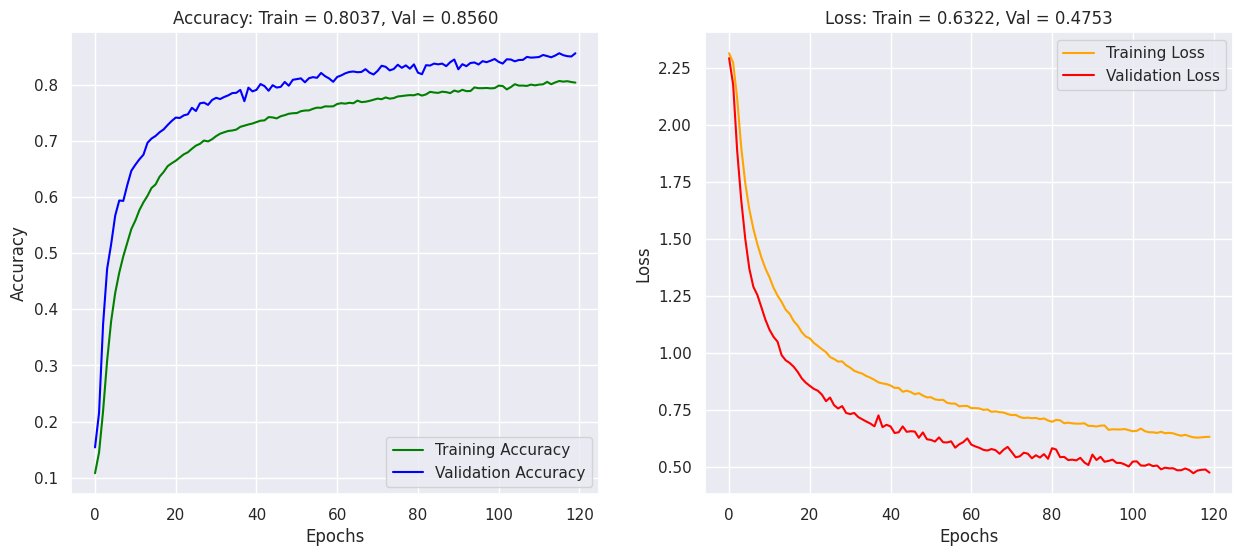

In [52]:
backend.clear_session()

# Define the model
svhn_model_6 = Sequential([
    Dense(256, activation='relu', kernel_initializer='he_uniform', input_shape=(1024,)),
    Dropout(0.2),

    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),

    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
compile_model(svhn_model_6, 'adam', learning_rate=0.0001)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Fit the model with callbacks
history_svhn_6 = svhn_model_6.fit(
    X_svhn_train, y_svhn_train,
    validation_data=(X_svhn_val, y_svhn_val),
    epochs=120,
    batch_size=64,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the model
svhn_model_6.test_accuracy = svhn_model_6.evaluate(X_svhn_val, y_svhn_val, verbose=2)

# Plot the accuracy
plot_model_accuracy(history_svhn_6, svhn_model_6)

In [53]:
# test accuracy
test_results = svhn_model_6.evaluate(X_svhn_test, y_svhn_test, verbose=1)
print(test_results)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8274 - loss: 0.5545
[0.5651538372039795, 0.8264444470405579]


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


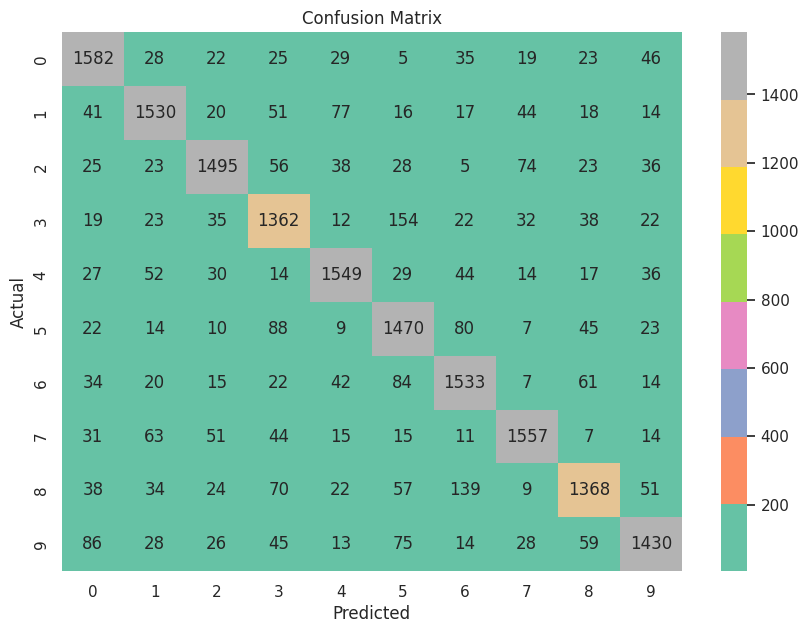

In [54]:
# Plot confusion matrix
plot_confusion_matrix(svhn_model_6,X_svhn_test,y_svhn_test )

In [55]:
# Print how many are not preducted correctly
get_misclassifications(svhn_model_6,X_svhn_test,y_svhn_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Misclassifications (Actual → Predicted : Count)
3 → 5 : 154
8 → 6 : 139
5 → 3 : 88
9 → 0 : 86
6 → 5 : 84
5 → 6 : 80
1 → 4 : 77
9 → 5 : 75
2 → 7 : 74
8 → 3 : 70
7 → 1 : 63
6 → 8 : 61
9 → 8 : 59
8 → 5 : 57
2 → 3 : 56
4 → 1 : 52
1 → 3 : 51
7 → 2 : 51
8 → 9 : 51
0 → 9 : 46
5 → 8 : 45
9 → 3 : 45
1 → 7 : 44
4 → 6 : 44
7 → 3 : 44
6 → 4 : 42
1 → 0 : 41
2 → 4 : 38
3 → 8 : 38
8 → 0 : 38
2 → 9 : 36
4 → 9 : 36
0 → 6 : 35
3 → 2 : 35
6 → 0 : 34
8 → 1 : 34
3 → 7 : 32
7 → 0 : 31
4 → 2 : 30
0 → 4 : 29
4 → 5 : 29
0 → 1 : 28
2 → 5 : 28
9 → 1 : 28
9 → 7 : 28
4 → 0 : 27
9 → 2 : 26
0 → 3 : 25
2 → 0 : 25
8 → 2 : 24
0 → 8 : 23
2 → 1 : 23
2 → 8 : 23
3 → 1 : 23
5 → 9 : 23
0 → 2 : 22
3 → 6 : 22
3 → 9 : 22
5 → 0 : 22
6 → 3 : 22
8 → 4 : 22
1 → 2 : 20
6 → 1 : 20
0 → 7 : 19
3 → 0 : 19
1 → 8 : 18
1 → 6 : 17
4 → 8 : 17
1 → 5 : 16
6 → 2 : 15
7 → 4 : 15
7 → 5 : 15
1 → 9 : 14
4 → 3 : 14
4 → 7 : 14
5 → 1 : 14
6 → 9 : 14
7 → 9 : 14
9 → 6 : 14
9 → 4 : 13
3 → 4 : 12
7 → 6 : 11
5 → 2 :

[((3, 5), np.int32(154)),
 ((8, 6), np.int32(139)),
 ((5, 3), np.int32(88)),
 ((9, 0), np.int32(86)),
 ((6, 5), np.int32(84)),
 ((5, 6), np.int32(80)),
 ((1, 4), np.int32(77)),
 ((9, 5), np.int32(75)),
 ((2, 7), np.int32(74)),
 ((8, 3), np.int32(70)),
 ((7, 1), np.int32(63)),
 ((6, 8), np.int32(61)),
 ((9, 8), np.int32(59)),
 ((8, 5), np.int32(57)),
 ((2, 3), np.int32(56)),
 ((4, 1), np.int32(52)),
 ((1, 3), np.int32(51)),
 ((7, 2), np.int32(51)),
 ((8, 9), np.int32(51)),
 ((0, 9), np.int32(46)),
 ((5, 8), np.int32(45)),
 ((9, 3), np.int32(45)),
 ((1, 7), np.int32(44)),
 ((4, 6), np.int32(44)),
 ((7, 3), np.int32(44)),
 ((6, 4), np.int32(42)),
 ((1, 0), np.int32(41)),
 ((2, 4), np.int32(38)),
 ((3, 8), np.int32(38)),
 ((8, 0), np.int32(38)),
 ((2, 9), np.int32(36)),
 ((4, 9), np.int32(36)),
 ((0, 6), np.int32(35)),
 ((3, 2), np.int32(35)),
 ((6, 0), np.int32(34)),
 ((8, 1), np.int32(34)),
 ((3, 7), np.int32(32)),
 ((7, 0), np.int32(31)),
 ((4, 2), np.int32(30)),
 ((0, 4), np.int32(29))

#### Observation:
- Both accuracy and loss plot are smoothened and converged well
- Overall this model performaces is same as Model 3.2  and validation acuracy of 86% and Test accuracy of 83%

### Model 7 (Random Search Cv)

In [70]:
keras_estimator_shvn = KerasClassifier(
    build_fn=create_model_v5,
    lr=0.01,
    batch_size=32,
    units_1=16,
    units_2=6,
    activation="relu",
    dropout_rate=0.2,
    optimizer="adam",
    num_layers=2,
    verbose=1
)# define the grid search parameters
param_random_shvn = {
    'batch_size':[16,32, 64, 128],
    "lr":[0.01,0.1,0.001],
    "units_1": [8, 16, 32, 64],
    "units_2": [4, 6, 12, 24],
    "activation": ["relu", "tanh", "swish", "leaky_relu"],
    "dropout_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
    "optimizer": ["adam", "sgd", "rmsprop", "nadam"],
    "num_layers": [1, 2, 3, 4]
    }

kfold_splits = 3
random_search_shvn= RandomizedSearchCV(estimator=keras_estimator_shvn,
                    verbose=1,
                    n_iter=10,
                    cv=kfold_splits,
                    param_distributions=param_random_shvn,n_jobs=-1)

In [71]:
# merge both train and validation for random serach cv
x_svhn_merged = np.concatenate((X_svhn_train, X_svhn_val), axis=0)
y_svhn_merged = np.concatenate((y_svhn_train, y_svhn_val), axis=0)


In [72]:
print(f"Shape after merge {len(x_svhn_merged)}")
print(f"Shape after merge {len(y_svhn_merged)}")


Shape after merge 102000
Shape after merge 102000


In [75]:
random_result_shvn = random_search_shvn.fit(x_svhn_merged, y_svhn_merged,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result_shvn.best_score_, random_result_shvn.best_params_))
means = random_result_shvn.cv_results_['mean_test_score']
stds = random_result_shvn.cv_results_['std_test_score']
params = random_result_shvn.cv_results_['params']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1146 - loss: 2.3091 - val_accuracy: 0.3329 - val_loss: 2.0035
Best: 0.126039 using {'units_2': 12, 'units_1': 32, 'optimizer': 'rmsprop', 'num_layers': 1, 'lr': 0.001, 'dropout_rate': 0.3, 'batch_size': 128, 'activation': 'leaky_relu'}


#### Observation:
Donot see much improvement with random search cv.

### Final Model Comparison

### Model Comparison Table

| Model | Optimizer | Hidden Layers | Additional Features | Test Accuracy |
|-------|----------|--------------|---------------------|--------------|
| **Model 1** | SGD | 1 | None | **65%** |
| **Model 2** | SGD | 3 | None | **70%** |
| **Model 3** | SGD + Momentum | 3 | Momentum | **78%** |
| **Model 3.1** | Adam | 3 | No Init Lr=.01 | **59%** |
| **Model 3.2** | Adam | 3 | LR = 0.0001, He Uniform Init | **83%** |
| **Model 4** | Adam | 3 | Dropout | **80%** |
| **Model 5** | Adam | 3 | Batch Normalization | **70%** |
| **Model 6** | Adam | 3 | Early_stopping and Dropout lr=.0001 | **83%** |


- We started creating model using RELU activation function and SGD optimizer with 1 layer which gave us an accuracy of 65% .This is not that good.
-  We tried Increasing layers from 1 to 3 it increased the percantage to 70%
- We had observed that with adam the performance of model with wait initilization and LR=.01 is too bad around 58%
- Training a model with SGD momentum of .66 gives is accuracy of 78%
- Training a model with weight_initialization = 'he_normal' and lr=.0001 - It gave us an accuracy of 83% and loss of 0.62
- Training a modle with having layer of drop out 0.2- It gave us an accuracy of 80% and with eraly stopping and epoch of 120 we can increased to 83%
- Training a modle with having layer of BatchNormalization - It gave us an accuracy of 70%


---
**So it's better to tune the modekl with hyperparameters and have a close look at acuracy and loss plot conbergence and smoothening to have better model which is generalised well and will have low bias and low variance**


